In [2]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import math
import os #<- package used to work with system file paths
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- another package used to plot graphs
from itertools import cycle #<- package used to iterate down rows (used in step 5 to add tap column)
import ipywidgets as widgets #<- widget tool to generate button and tab for graphs
from IPython.display import display #<- displays widgets
from ipyfilechooser import FileChooser
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
import pingouin as pg
from pingouin import ttest
from scipy.stats import ttest_ind
print("done step 1")

done step 1


# For filedialog set filepaths

In [3]:
starting_directory = '/Users/Joseph'
chooser = FileChooser(starting_directory)
display(chooser)


FileChooser(path='/Users/Joseph', filename='', title='', show_hidden=False, select_desc='Select', change_desc=…

In [4]:
print(chooser.selected_path)
folder_path=chooser.selected_path

/Users/Joseph/Desktop/GRC_Data


In [77]:
# Obsolete
# ### Select Folder App - After you run, you can select your folder for filepath
# button = widgets.Button(description = 'Select Folder') #<- Creates a button variable
# display(button) #<- displays this button on output
# def select_folder(b): #<- This is an action. Requires a variable, so I put in an arbitrary one 'b'
#     global folder_path #<- sets a variable as a global variable, not just within this action
#     Tk().withdraw() #<- Tkinter likes to create annoying empty windows. This removes them
#     folder_path = filedialog.askdirectory() #<- Opens up a file explorer window, and determines folder path
#     Tk().update()#<- below
#     Tk().destroy()#<- this and the line above it removes the file explorer window after a selection is made
#     print(folder_path) #<- this helps confirm that this action was performed
#     print('done step 2')
# button.on_click(select_folder) #<- describes what happens when you click on this button

In [5]:
# For filedialog-set filepaths
os.chdir(folder_path)
PD_tap=pd.read_csv('tap_output.csv')
PD_tap = PD_tap.iloc[: , 1:]
PD_baseline=pd.read_csv('tap_baseline_output.csv')
PD_baseline = PD_baseline.iloc[: , 1:]
PD_baseline = PD_baseline.drop(columns=["plate", "Tap", "Puff", "x","y"])
print(PD_tap)
print(PD_baseline)

           time  dura   dist      prob     speed  plate  taps         dataset  \
0       599.959  3.21  0.581  0.803922  0.180997      1   1.0  F32D8.13_gk584   
1       609.960  2.54  0.509  0.648148  0.200394      1   2.0  F32D8.13_gk584   
2       619.914  1.84  0.409  0.750000  0.222283      1   3.0  F32D8.13_gk584   
3       629.897  1.73  0.364  0.474576  0.210405      1   4.0  F32D8.13_gk584   
4       639.989  1.21  0.247  0.536232  0.204132      1   5.0  F32D8.13_gk584   
...         ...   ...    ...       ...       ...    ...   ...             ...   
20494   859.979  0.79  0.163  0.450000  0.206329     11  27.0   vps-35_ok1880   
20495   869.983  1.04  0.203  0.350877  0.195192     11  28.0   vps-35_ok1880   
20496   879.979  0.82  0.163  0.456140  0.198780     11  29.0   vps-35_ok1880   
20497   889.911  0.72  0.133  0.415094  0.184722     11  30.0   vps-35_ok1880   
20498  1189.993  3.23  0.687  0.583333  0.212693     11  31.0   vps-35_ok1880   

           Gene  Allele  
0

# PD Data ONLY

In [5]:
PD_tap=pd.read_csv('/Users/Joseph/Desktop/GRC_Data/tap_output.csv')
PD_tap = PD_tap.iloc[: , 1:]
PD_baseline=pd.read_csv('/Users/Joseph/Desktop/GRC_Data/tap_baseline_output.csv')
PD_baseline = PD_baseline.iloc[: , 1:]
PD_baseline = PD_baseline.drop(columns=["plate", "Tap", "Puff", "x","y"])
print(PD_tap)
print(PD_baseline)

           time  dura   dist      prob     speed  plate  taps         dataset  \
0       599.959  3.21  0.581  0.803922  0.180997      1   1.0  F32D8.13_gk584   
1       609.960  2.54  0.509  0.648148  0.200394      1   2.0  F32D8.13_gk584   
2       619.914  1.84  0.409  0.750000  0.222283      1   3.0  F32D8.13_gk584   
3       629.897  1.73  0.364  0.474576  0.210405      1   4.0  F32D8.13_gk584   
4       639.989  1.21  0.247  0.536232  0.204132      1   5.0  F32D8.13_gk584   
...         ...   ...    ...       ...       ...    ...   ...             ...   
20494   859.979  0.79  0.163  0.450000  0.206329     11  27.0   vps-35_ok1880   
20495   869.983  1.04  0.203  0.350877  0.195192     11  28.0   vps-35_ok1880   
20496   879.979  0.82  0.163  0.456140  0.198780     11  29.0   vps-35_ok1880   
20497   889.911  0.72  0.133  0.415094  0.184722     11  30.0   vps-35_ok1880   
20498  1189.993  3.23  0.687  0.583333  0.212693     11  31.0   vps-35_ok1880   

           Gene  Allele  
0

In [6]:
PD_baseline_last100=PD_baseline[((PD_baseline.Time<=590)&(PD_baseline.Time >=490))]
PD_baseline_last100=PD_baseline_last100.reset_index()
print(PD_baseline_last100)

            index     Time    n  Number  Instantaneous Speed  Interval Speed  \
0            5648  490.006  154      73               0.1118          0.0892   
1            5649  490.077  154      73               0.1195          0.1002   
2            5650  490.159  154      73               0.1083          0.0928   
3            5651  490.241  154      73               0.1087          0.0937   
4            5652  490.318  156      73               0.1110          0.0975   
...           ...      ...  ...     ...                  ...             ...   
1105838  13280237  589.755   87      43               0.0577          0.0822   
1105839  13280238  589.835   87      43               0.0616          0.0801   
1105840  13280239  589.873   87      43               0.0886          0.1188   
1105841  13280240  589.907   87      43               0.1085          0.1514   
1105842  13280241  589.956   87      43               0.0999          0.1462   

          Bias   Width  Length      Are

In [ ]:
# no need to run this
# tt=ttest_ind(PD_baseline_last100["Bias"], PD_baseline_last100[PD_baseline_last100.dataset=="N2"]["Bias"],equal_var=False)
# print(tt)

In [7]:
list=PD_baseline_last100["dataset"].unique()
print(list)

['set-2_ok1484' 'let-19_gk149538' 'dpy-22_tm12356' 'gba-4_tm3349'
 'lrk-1_tm1898' 'kvs-4_tm10514' 'T20F7.3_tm2936' 'Y18D10A.22_ok3535'
 'dpy-22_e652' 'hipr-1_tm2207' 'dop-3_ok295' 'lrk-1_tm7568' 'cpr-1_ok1344'
 'mbr-1_qa5901' 'kvs-4_tm14987' 'hipr-1_ok1081' 'sac-2_ok2743'
 'pink-1_ok3538' 'N2' 'unc-59_e1005' 'unc-43_tm2854' 'sipa-1_tm11702'
 'src-1_ok2685' 'gba-4_tm3314' 'gba-1_tm4173' 'gck-3_tm1296'
 'snb-5_tm6182' 'exp-2_sa26ad1426' 'unc-43_n498n1178' 'dop-1_vs101'
 'pdr-1_gk448' 'unc-43_js125' 'gba-2_tm4623' 'kvs-1_tm2034' 'gba-2_tm4808'
 'pamn_tm4430' 'djr-1.2_tm1346' 'dat-1_ok157' 'set-2_tm1630' 'cat-1_ok411'
 'snb-5_ok1434' 'unc-43_n498' 'hipr-1_tm10120' 'unc-59_e261'
 'glo-1_tm3240' 'mbr-1_tm2053' 'pgrn-1_tm985' 'unc-10_ad591' 'kvs-3_nf140'
 'unc-57_e406' 'pamn_ok2681' 'unc-57_e1190' 'unc-57_ok310' 'glo-1_tm15275'
 'gba-3_gk3287' 'cat-2_tm2261' 'dpy-22_sy622' 'set-2_n4589' 'sipa-1_ok879'
 'cat-2_e1112' 'pink-1_tm1779' 'clh-5_tm6008' 'pdr-1_tm395' 'glo-1_zu391'
 'F32D8.13_gk584' 

In [8]:
def TTest_New(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat=ttest_ind(DF_ref[DF_ref.dataset == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
        row=[a, Tstat]
        output.loc[len(output)]=row
    print(output)

In [9]:
PD_baseline_instantspeed_T=pd.DataFrame(columns = ["dataset","Instantaneous Speed"])
PD_baseline_intspeed_T=pd.DataFrame(columns = ["dataset","Interval Speed"])
PD_baseline_bias_T=pd.DataFrame(columns = ["dataset","Bias"])
PD_baseline_width_T=pd.DataFrame(columns = ["dataset","Width"])
PD_baseline_length_T=pd.DataFrame(columns = ["dataset","Length"])
PD_baseline_area_T=pd.DataFrame(columns = ["dataset","Area"])
PD_baseline_angularspeed_T=pd.DataFrame(columns = ["dataset","Angular Speed"])
PD_baseline_aspectratio_T=pd.DataFrame(columns = ["dataset","Aspect Ratio"])
PD_baseline_kink_T=pd.DataFrame(columns = ["dataset","Kink"])
PD_baseline_curve_T=pd.DataFrame(columns = ["dataset","Curve"])
PD_baseline_crab_T=pd.DataFrame(columns = ["dataset","Crab"])

In [10]:
TTest_New(PD_baseline_last100["dataset"].unique(), "Instantaneous Speed", PD_baseline_last100, PD_baseline_instantspeed_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Interval Speed", PD_baseline_last100, PD_baseline_intspeed_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Bias", PD_baseline_last100, PD_baseline_bias_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Width", PD_baseline_last100, PD_baseline_width_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Length", PD_baseline_last100, PD_baseline_length_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Area", PD_baseline_last100, PD_baseline_area_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Angular Speed", PD_baseline_last100, PD_baseline_angularspeed_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Aspect Ratio", PD_baseline_last100, PD_baseline_aspectratio_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Kink", PD_baseline_last100, PD_baseline_kink_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Curve", PD_baseline_last100, PD_baseline_curve_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Crab", PD_baseline_last100, PD_baseline_crab_T)

            dataset  Instantaneous Speed
0      set-2_ok1484           157.129338
1   let-19_gk149538            34.942378
2    dpy-22_tm12356             1.454143
3      gba-4_tm3349           -59.327945
4      lrk-1_tm1898          -103.463020
..              ...                  ...
86     set-2_ok1493             7.880379
87    F53B2.5_ok226           371.594632
88     unc-43_sa200          -166.000604
89      cat-2_n4547           235.370086
90     dop-3_tm1356           113.664873

[91 rows x 2 columns]
            dataset  Interval Speed
0      set-2_ok1484      179.906424
1   let-19_gk149538       37.834346
2    dpy-22_tm12356      -19.426684
3      gba-4_tm3349      -36.512643
4      lrk-1_tm1898     -101.981893
..              ...             ...
86     set-2_ok1493       55.644351
87    F53B2.5_ok226      219.839824
88     unc-43_sa200     -118.318021
89      cat-2_n4547      266.066153
90     dop-3_tm1356      163.251237

[91 rows x 2 columns]
            dataset        Bia

In [12]:
PD_baseline_Tstats=PD_baseline_instantspeed_T
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_intspeed_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_bias_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_width_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_length_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_area_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_angularspeed_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_kink_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_curve_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_crab_T.iloc[:,1])
print(PD_baseline_Tstats)

            dataset  Instantaneous Speed  Interval Speed        Bias  \
0      set-2_ok1484           157.129338      179.906424  129.681701   
1   let-19_gk149538            34.942378       37.834346   22.883891   
2    dpy-22_tm12356             1.454143      -19.426684   23.462891   
3      gba-4_tm3349           -59.327945      -36.512643    6.142145   
4      lrk-1_tm1898          -103.463020     -101.981893  -32.061850   
..              ...                  ...             ...         ...   
86     set-2_ok1493             7.880379       55.644351   21.703649   
87    F53B2.5_ok226           371.594632      219.839824  363.643093   
88     unc-43_sa200          -166.000604     -118.318021   10.914637   
89      cat-2_n4547           235.370086      266.066153  190.292093   
90     dop-3_tm1356           113.664873      163.251237   92.727010   

         Width      Length        Area  Angular Speed        Kink       Curve  \
0   -56.514722 -344.152215 -170.787523     157.040329 

In [13]:
PD_baseline_Tstats=PD_baseline_Tstats.set_index("dataset")
print(PD_baseline_Tstats)

                 Instantaneous Speed  Interval Speed        Bias       Width  \
dataset                                                                        
set-2_ok1484              157.129338      179.906424  129.681701  -56.514722   
let-19_gk149538            34.942378       37.834346   22.883891   19.585918   
dpy-22_tm12356              1.454143      -19.426684   23.462891 -295.536914   
gba-4_tm3349              -59.327945      -36.512643    6.142145  -21.565968   
lrk-1_tm1898             -103.463020     -101.981893  -32.061850  -27.964016   
...                              ...             ...         ...         ...   
set-2_ok1493                7.880379       55.644351   21.703649  -69.349776   
F53B2.5_ok226             371.594632      219.839824  363.643093  -43.977142   
unc-43_sa200             -166.000604     -118.318021   10.914637   23.353955   
cat-2_n4547               235.370086      266.066153  190.292093   -9.883564   
dop-3_tm1356              113.664873    

In [14]:
PD_baseline_Tstats_sort=PD_baseline_Tstats.sort_index()
print(PD_baseline_Tstats_sort)

                   Instantaneous Speed  Interval Speed        Bias  \
dataset                                                              
F32D8.13_gk584              -62.251360      -43.083819  -25.700073   
F53B2.5_ok226               371.594632      219.839824  363.643093   
N2                            0.000000        0.000000    0.000000   
T20F7.3_tm2936             -144.328502     -136.466243  -71.181344   
Y18D10A.22_ok3535            37.299111       38.916505  105.593996   
...                                ...             ...         ...   
unc-57_e406                -135.908944     -144.070770   57.835361   
unc-57_ok310               -150.706013     -203.274655  -77.523151   
unc-59_e1005                -73.640394      -61.677447   -8.810536   
unc-59_e261                 -51.084991      -30.352157    9.528584   
vps-35_ok1880               -55.992003     -117.991749   86.149162   

                        Width       Length         Area  Angular Speed  \
dataset        

In [ ]:
sns.set_context('notebook')
plt.figure(figsize=(14,14))
ax = sns.heatmap(data = PD_baseline_Tstats_sort, 
                 annot=False, 
                 linewidth=0.5, 
                 square=True, 
                 cmap="vlag", 
                 center=0, 
                 vmax=400,
                 vmin=-400, 
                 xticklabels=1,
                 yticklabels=1,
                 cbar_kws={"shrink": .3})
# plt.savefig(f'{StrainName}_Speed_{ISI}ISI.png_ByPlate', format='png', dpi=450)
plt.show()

In [11]:
print(PD_tap)
PD_first_tap = PD_tap[(PD_tap.taps==1)].reset_index().drop(columns="index")
PD_last_three_taps = PD_tap[((PD_tap.taps>=28)&(PD_tap.taps<=30))].reset_index().drop(columns="index")
PD_recov_taps = PD_tap[(PD_tap.taps==31)].reset_index().drop(columns="index")
print(PD_first_tap)
print(PD_last_three_taps)
print(PD_recov_taps)

           time  dura   dist      prob     speed  plate  taps         dataset  \
0       599.959  3.21  0.581  0.803922  0.180997      1   1.0  F32D8.13_gk584   
1       609.960  2.54  0.509  0.648148  0.200394      1   2.0  F32D8.13_gk584   
2       619.914  1.84  0.409  0.750000  0.222283      1   3.0  F32D8.13_gk584   
3       629.897  1.73  0.364  0.474576  0.210405      1   4.0  F32D8.13_gk584   
4       639.989  1.21  0.247  0.536232  0.204132      1   5.0  F32D8.13_gk584   
...         ...   ...    ...       ...       ...    ...   ...             ...   
20494   859.979  0.79  0.163  0.450000  0.206329     11  27.0   vps-35_ok1880   
20495   869.983  1.04  0.203  0.350877  0.195192     11  28.0   vps-35_ok1880   
20496   879.979  0.82  0.163  0.456140  0.198780     11  29.0   vps-35_ok1880   
20497   889.911  0.72  0.133  0.415094  0.184722     11  30.0   vps-35_ok1880   
20498  1189.993  3.23  0.687  0.583333  0.212693     11  31.0   vps-35_ok1880   

           Gene  Allele  
0

In [ ]:
print(PD_last_three_taps)

In [12]:
PD_final_taps=PD_last_three_taps.groupby(["Gene", "Allele", "dataset", "plate"]).mean().reset_index()
print(PD_final_taps)
# print(PD_first_tap)
# print(PD_recov_taps)


         Gene  Allele         dataset  plate        time      dura      dist  \
0    F32D8.13   gk584  F32D8.13_gk584      1  879.981000  1.170000  0.238333   
1    F32D8.13   gk584  F32D8.13_gk584      2  879.975000  0.843333  0.154333   
2    F32D8.13   gk584  F32D8.13_gk584      3  879.945000  0.930000  0.182000   
3    F32D8.13   gk584  F32D8.13_gk584      4  879.947667  1.540000  0.344000   
4     F53B2.5   ok226   F53B2.5_ok226      1  879.943333  1.656667  0.359000   
..        ...     ...             ...    ...         ...       ...       ...   
654    vps-35  ok1880   vps-35_ok1880      7  879.976000  0.650000  0.127333   
655    vps-35  ok1880   vps-35_ok1880      8  879.985667  0.823333  0.143667   
656    vps-35  ok1880   vps-35_ok1880      9  879.962667  1.610000  0.230333   
657    vps-35  ok1880   vps-35_ok1880     10  879.985000  0.933333  0.145000   
658    vps-35  ok1880   vps-35_ok1880     11  879.957667  0.860000  0.166333   

         prob     speed  taps  
0    0.

In [13]:
PD_final_taps=PD_final_taps.rename(columns={"dura": "final_dura", "prob": "final_prob", "speed": "final_speed"}, errors="raise")
PD_first_tap=PD_first_tap.rename(columns={"dura": "init_dura", "prob": "init_prob", "speed": "init_speed"}, errors="raise")
print(PD_final_taps)
print(PD_first_tap)

         Gene  Allele         dataset  plate        time  final_dura  \
0    F32D8.13   gk584  F32D8.13_gk584      1  879.981000    1.170000   
1    F32D8.13   gk584  F32D8.13_gk584      2  879.975000    0.843333   
2    F32D8.13   gk584  F32D8.13_gk584      3  879.945000    0.930000   
3    F32D8.13   gk584  F32D8.13_gk584      4  879.947667    1.540000   
4     F53B2.5   ok226   F53B2.5_ok226      1  879.943333    1.656667   
..        ...     ...             ...    ...         ...         ...   
654    vps-35  ok1880   vps-35_ok1880      7  879.976000    0.650000   
655    vps-35  ok1880   vps-35_ok1880      8  879.985667    0.823333   
656    vps-35  ok1880   vps-35_ok1880      9  879.962667    1.610000   
657    vps-35  ok1880   vps-35_ok1880     10  879.985000    0.933333   
658    vps-35  ok1880   vps-35_ok1880     11  879.957667    0.860000   

         dist  final_prob  final_speed  taps  
0    0.238333    0.165046     0.204152  29.0  
1    0.154333    0.221948     0.184208  2

In [14]:
PD_habit_levels = pd.merge(PD_first_tap, PD_final_taps, on =['dataset','plate','Gene','Allele'], how ='left')
PD_habit_levels = PD_habit_levels.dropna()
print(PD_habit_levels)

      time_x  init_dura  dist_x  init_prob  init_speed  plate  taps_x  \
0    599.959       3.21   0.581   0.803922    0.180997      1     1.0   
1    599.939       2.48   0.502   0.792453    0.202419      2     1.0   
2    599.944       2.89   0.681   0.869565    0.235640      3     1.0   
3    599.938       2.72   0.593   0.906977    0.218015      4     1.0   
4    599.983       2.64   0.739   0.945946    0.279924      1     1.0   
..       ...        ...     ...        ...         ...    ...     ...   
653  599.966       3.75   0.673   0.605263    0.179467      7     1.0   
654  599.982       3.04   0.654   0.645161    0.215132      8     1.0   
655  599.999       3.99   0.596   0.708333    0.149373      9     1.0   
656  599.924       3.62   0.546   0.704545    0.150829     10     1.0   
657  599.970       2.97   0.588   0.724138    0.197980     11     1.0   

            dataset      Gene  Allele      time_y  final_dura    dist_y  \
0    F32D8.13_gk584  F32D8.13   gk584  879.98100

In [15]:
PD_habit_levels['habit_dura']=PD_habit_levels.init_dura-PD_habit_levels.final_dura
PD_habit_levels['habit_prob']=PD_habit_levels.init_prob-PD_habit_levels.final_prob
PD_habit_levels['habit_speed']=PD_habit_levels.init_speed-PD_habit_levels.final_speed
PD_habit_levels=PD_habit_levels.drop(columns=['time_x','time_y','taps_x','taps_y','dist_x','dist_y'])
# print(PD_habit_levels)
# print(PD_final_taps)
# print(PD_first_tap)
# print(PD_recov_taps)

In [17]:
PD_recov_taps=PD_recov_taps.rename(columns={"dura": "recov_dura", "prob": "recov_prob", "speed":"recov_speed"})
PD_habituation = pd.merge(PD_habit_levels, PD_recov_taps, on =['dataset','plate','Gene','Allele'], how ='left')
PD_habituation = PD_habituation.dropna()
print(PD_habituation)

     init_dura  init_prob  init_speed  plate         dataset      Gene  \
0         3.21   0.803922    0.180997      1  F32D8.13_gk584  F32D8.13   
1         2.48   0.792453    0.202419      2  F32D8.13_gk584  F32D8.13   
2         2.89   0.869565    0.235640      3  F32D8.13_gk584  F32D8.13   
3         2.72   0.906977    0.218015      4  F32D8.13_gk584  F32D8.13   
4         2.64   0.945946    0.279924      1   F53B2.5_ok226   F53B2.5   
..         ...        ...         ...    ...             ...       ...   
642       3.75   0.605263    0.179467      7   vps-35_ok1880    vps-35   
643       3.04   0.645161    0.215132      8   vps-35_ok1880    vps-35   
644       3.99   0.708333    0.149373      9   vps-35_ok1880    vps-35   
645       3.62   0.704545    0.150829     10   vps-35_ok1880    vps-35   
646       2.97   0.724138    0.197980     11   vps-35_ok1880    vps-35   

     Allele  final_dura  final_prob  final_speed  habit_dura  habit_prob  \
0     gk584    1.170000    0.165046

In [18]:
PD_habituation['recovery_dura']=PD_habituation.init_dura-PD_habituation.recov_dura
PD_habituation['recovery_prob']=PD_habituation.init_prob-PD_habituation.recov_prob
PD_habituation['recovery_speed']=PD_habituation.init_speed-PD_habituation.recov_speed
print(PD_habituation)

     init_dura  init_prob  init_speed  plate         dataset      Gene  \
0         3.21   0.803922    0.180997      1  F32D8.13_gk584  F32D8.13   
1         2.48   0.792453    0.202419      2  F32D8.13_gk584  F32D8.13   
2         2.89   0.869565    0.235640      3  F32D8.13_gk584  F32D8.13   
3         2.72   0.906977    0.218015      4  F32D8.13_gk584  F32D8.13   
4         2.64   0.945946    0.279924      1   F53B2.5_ok226   F53B2.5   
..         ...        ...         ...    ...             ...       ...   
642       3.75   0.605263    0.179467      7   vps-35_ok1880    vps-35   
643       3.04   0.645161    0.215132      8   vps-35_ok1880    vps-35   
644       3.99   0.708333    0.149373      9   vps-35_ok1880    vps-35   
645       3.62   0.704545    0.150829     10   vps-35_ok1880    vps-35   
646       2.97   0.724138    0.197980     11   vps-35_ok1880    vps-35   

     Allele  final_dura  final_prob  final_speed  ...  habit_speed      time  \
0     gk584    1.170000    0.16

In [54]:
PD_habituation.to_csv('/Users/Joseph/Desktop/GRC_Data/taphab_processed_output.csv')

In [55]:
PD_habituation=pd.read_csv('taphab_processed_output.csv')
PD_habituation = PD_habituation.iloc[: , 1:]

In [56]:
# print(PD_recov_taps)
# print(PD_first_tap)
# print(PD_final_taps)
# print(PD_habit_levels)
print(PD_habituation)

     init_dura  init_prob  init_speed  plate         dataset      Gene  \
0         3.21   0.803922    0.180997      1  F32D8.13_gk584  F32D8.13   
1         2.48   0.792453    0.202419      2  F32D8.13_gk584  F32D8.13   
2         2.89   0.869565    0.235640      3  F32D8.13_gk584  F32D8.13   
3         2.72   0.906977    0.218015      4  F32D8.13_gk584  F32D8.13   
4         2.64   0.945946    0.279924      1   F53B2.5_ok226   F53B2.5   
..         ...        ...         ...    ...             ...       ...   
642       3.75   0.605263    0.179467      7   vps-35_ok1880    vps-35   
643       3.04   0.645161    0.215132      8   vps-35_ok1880    vps-35   
644       3.99   0.708333    0.149373      9   vps-35_ok1880    vps-35   
645       3.62   0.704545    0.150829     10   vps-35_ok1880    vps-35   
646       2.97   0.724138    0.197980     11   vps-35_ok1880    vps-35   

     Allele  final_dura  final_prob  final_speed  habit_dura  habit_prob  \
0     gk584    1.170000    0.165046

In [ ]:
# PD_habit_levels.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/TesteData.csv', sep=",")

In [22]:
print(PD_habituation[PD_habituation.dataset=='src-1_ok2685'])

     init_dura  init_prob  init_speed  plate       dataset   Gene  Allele  \
568       0.33        1.0    0.133333      3  src-1_ok2685  src-1  ok2685   

     final_dura  final_prob  final_speed  ...  habit_speed      time  \
568    0.153333    0.071429     0.383929  ...    -0.250595  1189.974   

     recov_dura   dist  recov_prob  recov_speed  taps  recovery_dura  \
568        1.06  0.086         0.2     0.081132  31.0          -0.73   

     recovery_prob  recovery_speed  
568            0.8        0.052201  

[1 rows x 22 columns]


In [19]:
PD_recovery_dura=pd.DataFrame(columns = ["dataset","Recovery Duration"])
PD_recovery_prob=pd.DataFrame(columns = ["dataset","Recovery Probability"])
PD_recovery_speed=pd.DataFrame(columns = ["dataset","Recovery Speed"])
PD_init_dura=pd.DataFrame(columns = ["dataset","Initial Duration"])
PD_init_prob=pd.DataFrame(columns = ["dataset","Initial Probability"])
PD_init_speed=pd.DataFrame(columns = ["dataset","Initial Speed"])
PD_final_dura=pd.DataFrame(columns = ["dataset","Final Duration"])
PD_final_prob=pd.DataFrame(columns = ["dataset","Final Probability"])
PD_final_speed=pd.DataFrame(columns = ["dataset","Final Speed"])
PD_hab_dura=pd.DataFrame(columns = ["dataset","Habituation of Duration"])
PD_hab_prob=pd.DataFrame(columns = ["dataset","Habituation of Probability"])
PD_hab_speed=pd.DataFrame(columns = ["dataset","Habituation of Speed"])
print('done')

done


In [20]:
# PD_recov_taps=PD_recov_taps.dropna()
# PD_first_tap=PD_first_tap.dropna()
# PD_final_taps=PD_final_taps.dropna()
# PD_habit_levels=PD_habit_levels.dropna()
PD_habituation=PD_habituation.dropna()

In [21]:
print(PD_habituation["dataset"].unique())

['F32D8.13_gk584' 'F53B2.5_ok226' 'N2' 'T20F7.3_tm2936'
 'Y18D10A.22_ok3535' 'bas-1_ad446' 'bas-1_tm351' 'cat-1_e1111'
 'cat-1_ok411' 'cat-2_e1112' 'cat-2_n4547' 'cat-2_tm2261' 'clh-5_tm6008'
 'cpr-1_ok1344' 'dat-1_ok157' 'djr-1.2_tm1346' 'dnj-25_ok422'
 'dop-1_vs101' 'dop-3_ok295' 'dop-3_tm1356' 'dpy-22_e652' 'dpy-22_sy622'
 'dpy-22_tm12356' 'dve-1_tm259' 'dve-1_tm7599' 'exp-2_sa26ad1426'
 'gba-1_tm3816' 'gba-1_tm4173' 'gba-2_tm4623' 'gba-2_tm4808'
 'gba-3_gk3287' 'gba-3_tm3302' 'gba-4_tm3314' 'gba-4_tm3349'
 'gck-3_tm1223' 'gck-3_tm1296' 'glo-1_tm15275' 'glo-1_tm3240'
 'glo-1_zu391' 'hipr-1_ok1081' 'hipr-1_tm10120' 'hipr-1_tm2207'
 'ima-2_tm1303' 'kvs-1_tm2034' 'kvs-3_nf140' 'kvs-4_tm10514'
 'kvs-4_tm14987' 'kvs-5_tm6152' 'let-19_gk149538' 'lrk-1_tm1898'
 'lrk-1_tm7568' 'mbr-1_qa5901' 'mbr-1_tm1235' 'mbr-1_tm2053'
 'mig-15_mu342' 'pamn_ok2681' 'pamn_tm4430' 'pdr-1_gk448' 'pdr-1_tm395'
 'pdr-1_tm598' 'pgrn-1_tm985' 'pink-1_ok3538' 'pink-1_tm1779'
 'sac-2_ok2743' 'scav-1_tm10524' 'set-

In [26]:
# print(PD_recov_taps)
# print(PD_first_tap)
# print(PD_final_taps)
# print(PD_habit_levels)
TTest_New(PD_habituation["dataset"].unique(), "recovery_dura", PD_habituation, PD_recovery_dura)
TTest_New(PD_habituation["dataset"].unique(), "recovery_prob", PD_habituation, PD_recovery_prob)
TTest_New(PD_habituation["dataset"].unique(), "recovery_speed", PD_habituation, PD_recovery_speed)
TTest_New(PD_habituation["dataset"].unique(), "init_dura", PD_habituation, PD_init_dura)
TTest_New(PD_habituation["dataset"].unique(), "init_prob", PD_habituation, PD_init_prob)
TTest_New(PD_habituation["dataset"].unique(), "init_speed", PD_habituation, PD_init_speed)
TTest_New(PD_habituation["dataset"].unique(), "final_dura", PD_habituation, PD_final_dura)
TTest_New(PD_habituation["dataset"].unique(), "final_prob", PD_habituation, PD_final_prob)
TTest_New(PD_habituation["dataset"].unique(), "final_speed", PD_habituation, PD_final_speed)
TTest_New(PD_habituation["dataset"].unique(), "habit_dura", PD_habituation, PD_hab_dura)
TTest_New(PD_habituation["dataset"].unique(), "habit_prob", PD_habituation, PD_hab_prob)
TTest_New(PD_habituation["dataset"].unique(), "habit_speed", PD_habituation, PD_hab_speed)
print("done")

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_97558/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.dataset == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_97558/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic ca

              dataset  Recovery Duration
0      F32D8.13_gk584           1.977906
1       F53B2.5_ok226          -1.349351
2                  N2           0.000000
3      T20F7.3_tm2936          -1.492516
4   Y18D10A.22_ok3535           4.178495
..                ...                ...
86        unc-57_e406           0.081095
87       unc-57_ok310          -0.315067
88       unc-59_e1005          -0.783985
89        unc-59_e261          -2.398972
90      vps-35_ok1880          -2.041239

[91 rows x 2 columns]
              dataset  Recovery Probability
0      F32D8.13_gk584              0.556588
1       F53B2.5_ok226              0.710093
2                  N2              0.000000
3      T20F7.3_tm2936             -0.410089
4   Y18D10A.22_ok3535             -2.159560
..                ...                   ...
86        unc-57_e406              1.359884
87       unc-57_ok310              0.332069
88       unc-59_e1005              4.996339
89        unc-59_e261             -1.495528
9

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_97558/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.dataset == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_97558/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic ca

              dataset  Initial Speed
0      F32D8.13_gk584      -1.590261
1       F53B2.5_ok226       6.565485
2                  N2       0.000000
3      T20F7.3_tm2936      -3.247153
4   Y18D10A.22_ok3535      -1.068367
..                ...            ...
86        unc-57_e406      -7.759050
87       unc-57_ok310     -14.613919
88       unc-59_e1005      -4.750302
89        unc-59_e261      -5.298410
90      vps-35_ok1880      -5.452931

[91 rows x 2 columns]
              dataset  Final Duration
0      F32D8.13_gk584       -0.371538
1       F53B2.5_ok226        2.613687
2                  N2        0.000000
3      T20F7.3_tm2936       -5.436404
4   Y18D10A.22_ok3535        0.352220
..                ...             ...
86        unc-57_e406       -0.396765
87       unc-57_ok310       -1.013617
88       unc-59_e1005       -1.891205
89        unc-59_e261        0.126932
90      vps-35_ok1880       -1.892333

[91 rows x 2 columns]
              dataset  Final Probability
0      F32D8.

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_97558/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.dataset == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_97558/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic ca

In [27]:
PD_habituation_Tstats=PD_recovery_dura
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_recovery_prob.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_recovery_speed.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_init_dura.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_init_prob.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_init_speed.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_final_dura.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_final_prob.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_final_speed.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_hab_dura.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_hab_prob.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_hab_speed.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.dropna()                                        
print(PD_habituation_Tstats)

              dataset  Recovery Duration  Recovery Probability  \
0      F32D8.13_gk584           1.977906              0.556588   
1       F53B2.5_ok226          -1.349351              0.710093   
2                  N2           0.000000              0.000000   
3      T20F7.3_tm2936          -1.492516             -0.410089   
4   Y18D10A.22_ok3535           4.178495             -2.159560   
..                ...                ...                   ...   
86        unc-57_e406           0.081095              1.359884   
87       unc-57_ok310          -0.315067              0.332069   
88       unc-59_e1005          -0.783985              4.996339   
89        unc-59_e261          -2.398972             -1.495528   
90      vps-35_ok1880          -2.041239              0.254847   

    Recovery Speed  Initial Duration  Initial Probability  Initial Speed  \
0        -0.575626          1.015679             0.487735      -1.590261   
1         2.336412          2.369236             6.1716

In [28]:
PD_habituation_Tstats=PD_habituation_Tstats.set_index("dataset")
print(PD_habituation_Tstats)

                   Recovery Duration  Recovery Probability  Recovery Speed  \
dataset                                                                      
F32D8.13_gk584              1.977906              0.556588       -0.575626   
F53B2.5_ok226              -1.349351              0.710093        2.336412   
N2                          0.000000              0.000000        0.000000   
T20F7.3_tm2936             -1.492516             -0.410089        1.318642   
Y18D10A.22_ok3535           4.178495             -2.159560       -1.083380   
...                              ...                   ...             ...   
unc-57_e406                 0.081095              1.359884        1.833191   
unc-57_ok310               -0.315067              0.332069       -1.044740   
unc-59_e1005               -0.783985              4.996339        0.872149   
unc-59_e261                -2.398972             -1.495528        1.264041   
vps-35_ok1880              -2.041239              0.254847      

In [29]:
PD_habituation_Tstats_sorted=PD_habituation_Tstats.sort_index()
print(PD_habituation_Tstats_sorted)

                   Recovery Duration  Recovery Probability  Recovery Speed  \
dataset                                                                      
F32D8.13_gk584              1.977906              0.556588       -0.575626   
F53B2.5_ok226              -1.349351              0.710093        2.336412   
N2                          0.000000              0.000000        0.000000   
T20F7.3_tm2936             -1.492516             -0.410089        1.318642   
Y18D10A.22_ok3535           4.178495             -2.159560       -1.083380   
...                              ...                   ...             ...   
unc-57_e406                 0.081095              1.359884        1.833191   
unc-57_ok310               -0.315067              0.332069       -1.044740   
unc-59_e1005               -0.783985              4.996339        0.872149   
unc-59_e261                -2.398972             -1.495528        1.264041   
vps-35_ok1880              -2.041239              0.254847      

In [ ]:
sns.set_context('notebook')
plt.figure(figsize=(14,14))
ax = sns.heatmap(data = PD_habituation_Tstats, 
                 annot=False, 
                 linewidth=0.5, 
                 square=True, 
                 cmap="vlag", 
                 center=0, 
#                  vmax=400,
#                  vmin=-400, 
                 xticklabels=1,
                 yticklabels=1,
                 cbar_kws={"shrink": .3})
# plt.savefig(f'{StrainName}_Speed_{ISI}ISI.png_ByPlate', format='png', dpi=450)
plt.show()

In [ ]:
# dont run
# PD_baseline_Tstats_scaled=PD_baseline_Tstats/30
# print(PD_baseline_Tstats_scaled)

In [30]:
PD_combined_Tstats = pd.merge(PD_baseline_Tstats, PD_habituation_Tstats, on =['dataset'], how ='left')
PD_combined_Tstats=PD_combined_Tstats.sort_index()
# PD_combined_Tstats=PD_combined_Tstats.drop(index="N2")
PD_combined_Tstats=PD_combined_Tstats.dropna()
PD_combined_Tstats_normalize=(PD_combined_Tstats-PD_combined_Tstats.mean())/PD_combined_Tstats.std()
print(PD_combined_Tstats_normalize)
print(PD_combined_Tstats_normalize.index)


                   Instantaneous Speed  Interval Speed      Bias     Width  \
dataset                                                                      
F32D8.13_gk584               -0.145286       -0.099524 -0.189477  1.171840   
F53B2.5_ok226                 2.912230        1.896721  3.056254  0.382056   
N2                            0.293429        0.227589  0.024769  0.733362   
T20F7.3_tm2936               -0.723722       -0.808529 -0.568629  0.114851   
Y18D10A.22_ok3535             0.556293        0.523063  0.905046 -0.319362   
...                                ...             ...       ...       ...   
unc-57_e406                  -0.664385       -0.866266  0.506910 -0.361817   
unc-57_ok310                 -0.768667       -1.315771 -0.621497 -3.090062   
unc-59_e1005                 -0.225550       -0.240696 -0.048679 -0.368657   
unc-59_e261                  -0.066591       -0.002859  0.104204 -0.394347   
vps-35_ok1880                -0.101173       -0.668262  0.742946

In [31]:
# print(PD_combined_Tstats_normalize[PD_combined_Tstats_normalize.index=="N2"])
# print(PD_combined_Tstats_normalize[PD_combined_Tstats_normalize.index=="N2"].squeeze())
PD_combined_Tstats_normalize_2=PD_combined_Tstats_normalize-PD_combined_Tstats_normalize[PD_combined_Tstats_normalize.index=="N2"].squeeze()
print(PD_combined_Tstats_normalize_2[PD_combined_Tstats_normalize.index=="N2"])
# print(PD_combined_Tstats_normalize[PD_combined_Tstats_normalize.index=="T20F7.3_tm2936"]-PD_combined_Tstats_normalize[PD_combined_Tstats_normalize.index=="N2"].squeeze())

         Instantaneous Speed  Interval Speed  Bias  Width  Length  Area  \
dataset                                                                   
N2                       0.0             0.0   0.0    0.0     0.0   0.0   

         Angular Speed  Kink  Curve  Crab  ...  Recovery Speed  \
dataset                                    ...                   
N2                 0.0   0.0    0.0   0.0  ...             0.0   

         Initial Duration  Initial Probability  Initial Speed  Final Duration  \
dataset                                                                         
N2                    0.0                  0.0            0.0             0.0   

         Final Probability  Final Speed  Habituation of Duration  \
dataset                                                            
N2                     0.0          0.0                      0.0   

         Habituation of Probability  Habituation of Speed  
dataset                                                    
N2    

In [ ]:
import matplotlib as mpl

In [ ]:
mpl.colors.rgb_to_hsv('255,215,0')
51
240

In [32]:
first_col=PD_combined_Tstats.pop("Area")
PD_combined_Tstats.insert(0,"Area",first_col)

first_col=PD_combined_Tstats.pop("Length")
PD_combined_Tstats.insert(0,"Length",first_col)

first_col=PD_combined_Tstats.pop("Width")
PD_combined_Tstats.insert(0,"Width",first_col)

first_col=PD_combined_Tstats_normalize_2.pop("Angular Speed")
PD_combined_Tstats_normalize_2.insert(5,"Angular Speed",first_col)

print(PD_combined_Tstats)

                        Width       Length         Area  Instantaneous Speed  \
dataset                                                                        
F32D8.13_gk584      54.889432   -44.599740    48.323350           -62.251360   
F53B2.5_ok226      -43.977142  -158.206793  -182.856809           371.594632   
N2                   0.000000     0.000000     0.000000             0.000000   
T20F7.3_tm2936     -77.426211   -74.807793   -97.786120          -144.328502   
Y18D10A.22_ok3535 -131.781731  -195.409330  -323.536662            37.299111   
...                       ...          ...          ...                  ...   
unc-57_e406       -137.096372  -694.511926  -533.042792          -135.908944   
unc-57_ok310      -478.622655 -2085.326122 -2082.541463          -150.706013   
unc-59_e1005      -137.952647  -365.975917  -362.268095           -73.640394   
unc-59_e261       -141.168494  -343.248625  -385.434046           -51.084991   
vps-35_ok1880     -344.738403  -958.7092

In [33]:
PD_combined_Tstats=PD_combined_Tstats.rename(columns={"Habituation of Duration":"Habituation of Response Duration",
                                                     "Habituation of Probability": "Habituation of Respones Probability",
                                                     "Habituation of Speed":"Habituation of Response Speed",
                                                     "Initial Duration": "Initial Response Duration",
                                                     "Initial Probability": "Initial Response Probability",
                                                     "Initial Speed": "Initial Response Speed",
                                                     "Final Duration": "Final Response Duration",
                                                     "Final Probability": "Final Response Probability",
                                                     "Final Speed": "Final Response Speed",
                                                     "Recovery Duration": "Spontaneous Recovery of Response Duration",
                                                     "Recovery Probability": "Spontaneous Recovery of Response Probability",
                                                     "Recovery Speed": "Spontaneous Recovery of Response Speed"})
PD_combined_Tstats.to_csv('CombinedTSTATData.csv')

In [34]:
PD_combined_Tstats_normalize_2=PD_combined_Tstats_normalize_2.rename(columns={"Habituation of Duration":"Habituation of Response Duration",
                                                                             "Habituation of Probability": "Habituation of Respones Probability",
                                                                             "Habituation of Speed":"Habituation of Response Speed",
                                                                             "Initial Duration": "Initial Response Duration",
                                                                             "Initial Probability": "Initial Response Probability",
                                                                             "Initial Speed": "Initial Response Speed",
                                                                             "Final Duration": "Final Response Duration",
                                                                             "Final Probability": "Final Response Probability",
                                                                             "Final Speed": "Final Response Speed",
                                                                             "Recovery Duration": "Spontaneous Recovery of Response Duration",
                                                                             "Recovery Probability": "Spontaneous Recovery of Response Probability",
                                                                             "Recovery Speed": "Spontaneous Recovery of Response Speed"})

In [30]:
print(PD_combined_Tstats_normalize_2)

                   Instantaneous Speed  Interval Speed      Bias     Width  \
dataset                                                                      
F32D8.13_gk584               -0.438714       -0.327113 -0.214247  0.438478   
F53B2.5_ok226                 2.618801        1.669132  3.031484 -0.351307   
N2                            0.000000        0.000000  0.000000  0.000000   
T20F7.3_tm2936               -1.017151       -1.036119 -0.593398 -0.618511   
Y18D10A.22_ok3535             0.262864        0.295473  0.880277 -1.052724   
...                                ...             ...       ...       ...   
unc-57_e406                  -0.957814       -1.093856  0.482140 -1.095179   
unc-57_ok310                 -1.062096       -1.543361 -0.646266 -3.823424   
unc-59_e1005                 -0.518978       -0.468285 -0.073448 -1.102019   
unc-59_e261                  -0.360020       -0.230448  0.079434 -1.127709   
vps-35_ok1880                -0.394602       -0.895851  0.718176

In [35]:
first_col=PD_combined_Tstats_normalize_2.pop("Area")
PD_combined_Tstats_normalize_2.insert(0,"Area",first_col)

first_col=PD_combined_Tstats_normalize_2.pop("Length")
PD_combined_Tstats_normalize_2.insert(0,"Length",first_col)

first_col=PD_combined_Tstats_normalize_2.pop("Width")
PD_combined_Tstats_normalize_2.insert(0,"Width",first_col)

first_col=PD_combined_Tstats_normalize_2.pop("Angular Speed")
PD_combined_Tstats_normalize_2.insert(5,"Angular Speed",first_col)

last_col=PD_combined_Tstats_normalize_2.pop("Spontaneous Recovery of Response Duration")
PD_combined_Tstats_normalize_2.insert(21,"Spontaneous Recovery of Response Duration",last_col)

last_col=PD_combined_Tstats_normalize_2.pop("Spontaneous Recovery of Response Probability")
PD_combined_Tstats_normalize_2.insert(21,"Spontaneous Recovery of Response Probability",last_col)

last_col=PD_combined_Tstats_normalize_2.pop("Spontaneous Recovery of Response Speed")
PD_combined_Tstats_normalize_2.insert(21,"Spontaneous Recovery of Response Speed",last_col)



print(PD_combined_Tstats_normalize_2)
PD_combined_Tstats_normalize_2.to_csv('Normalized_TSTATData.csv')

                      Width    Length      Area  Instantaneous Speed  \
dataset                                                                
F32D8.13_gk584     0.438478 -0.130634  0.148384            -0.438714   
F53B2.5_ok226     -0.351307 -0.463392 -0.561489             2.618801   
N2                 0.000000  0.000000  0.000000             0.000000   
T20F7.3_tm2936    -0.618511 -0.219114 -0.300267            -1.017151   
Y18D10A.22_ok3535 -1.052724 -0.572360 -0.993467             0.262864   
...                     ...       ...       ...                  ...   
unc-57_e406       -1.095179 -2.034246 -1.636787            -0.957814   
unc-57_ok310      -3.823424 -6.107982 -6.394752            -1.062096   
unc-59_e1005      -1.102019 -1.071954 -1.112398            -0.518978   
unc-59_e261       -1.127709 -1.005385 -1.183532            -0.360020   
vps-35_ok1880     -2.753905 -2.808088 -3.412569            -0.394602   

                   Interval Speed  Angular Speed      Bias     

In [ ]:
# PD_combined_Tstats_normalize_2 = last_col=PD_combined_Tstats_normalize_2.rename(columns={"Habituation of Duration":"Habituation of Response Duration",
#                                                                                                  "Habituation of Probability": "Habituation of Respones Probability",
#                                                                                                  "Habituation of Speed":"Habituation of Response Speed",
#                                                                                                  "Initial Duration": "Initial Response Duration",
#                                                                                                  "Initial Probability": "Initial Response Probability",
#                                                                                                  "Initial Speed": "Initial Response Speed",
#                                                                                                  "Final Duration": "Final Response Duration",
#                                                                                                  "Final Probability": "Final Response Probability",
#                                                                                                  "Final Speed": "Final Response Speed"})
# PD_combined_Tstats_normalize_2 = last_col=PD_combined_Tstats_normalize_2.rename(columns={"Habituation of Duration":"Habituation of Response Duration",
#                                                                                                  "Habituation of Probability": "Habituation of Respones Probability",
#                                                                                                  "Habituation of Speed":"Habituation of Response Speed",
#                                                                                                  "Initial Duration": "Initial Response Duration",
#                                                                                                  "Initial Probability": "Initial Response Probability",
#                                                                                                  "Initial Speed": "Initial Response Speed",
#                                                                                                  "Final Duration": "Final Response Duration",
#                                                                                                  "Final Probability": "Final Response Probability",
#                                                                                                  "Final Speed": "Final Response Speed"})

In [ ]:
sns.set_context('notebook')
plt.figure(figsize=(16,20))
ax = sns.heatmap(data = PD_combined_Tstats_normalize_2.drop(index="N2"), 
                 annot=False, 
                 linewidth=0.5, 
                 square=True, 
                 cmap="vlag", 
#                  cmap=sns.diverging_palette(55, 250, s=100, l=40,as_cmap=True), 
                 center=0, 
                 vmax=3,
                 vmin=-3, 
                 xticklabels=1,
                 yticklabels=1,
                 cbar_kws={"shrink": .2})
# plt.savefig('/Users/Joseph/Desktop/GRC_Data/Tstat_Strain_normalized.png', format='png', dpi=450, bbox_inches = "tight")
plt.savefig('Tstat_Strain_normalized.png', format='png', dpi=450, bbox_inches = "tight")
plt.show()

In [36]:
PD_combined_Tstats_melted=PD_combined_Tstats.reset_index()
PD_combined_Tstats_melted=pd.melt(PD_combined_Tstats_melted, id_vars=['dataset'],
                                   var_name='Metric',
                                   value_name='T_score')
PD_combined_Tstats_melted_sorted=PD_combined_Tstats_melted.sort_values(by=['T_score'])
# print(PD_gene_Tstats_melted_gene)
print(PD_combined_Tstats_melted_sorted)
# PD_gene_Tstats_melted_metric=pd.melt(PD_gene_Tstats_melted_gene, id_vars=['dataset'],
#                              value_name='metric')


PD_combined_normalized_Tstats_melted=PD_combined_Tstats_normalize_2.reset_index()
PD_combined_normalized_Tstats_melted=pd.melt(PD_combined_normalized_Tstats_melted, id_vars=['dataset'],
                                   var_name='Metric',
                                   value_name='T_score')
PD_combined_normalized_Tstats_melted_sorted=PD_combined_normalized_Tstats_melted.sort_values(by=['Metric'])

            dataset               Metric      T_score
174    unc-57_ok310               Length -2085.326122
263    unc-57_ok310                 Area -2082.541463
242     set-2_n4589                 Area -1307.937140
152  scav-1_tm10524               Length -1266.127412
266   vps-35_ok1880                 Area -1111.351539
..              ...                  ...          ...
268   F53B2.5_ok226  Instantaneous Speed   371.594632
699    unc-43_js125                 Kink   375.661541
273     bas-1_tm351  Instantaneous Speed   377.730328
451     bas-1_tm351                 Bias   422.589723
681     pdr-1_tm598                 Kink   431.190588

[1958 rows x 3 columns]


In [ ]:
for x in PD_combined_Tstats_melted_sorted.Metric.unique():
    plt.figure(figsize=(12,4.8))
    ax = sns.barplot(data = PD_combined_Tstats_melted_sorted[PD_combined_Tstats_melted_sorted.Metric==f"{x}"], 
                x="dataset",
                y="T_score",
                palette=["dimgray"]).set_title(f"{x}")
    plt.xticks(rotation=90)
    plt.tick_params(axis='x', which='major', labelsize=10)
#     plt.ylim(-3,3)
    plt.savefig(f'/Users/Joseph/Desktop/GRC_Data/Metric_Scores/{x}_Metrics.png', format='png', dpi=450, bbox_inches = "tight")
    plt.show()
print("done")

In [ ]:
print(PD_combined_normalized_Tstats_melted_sorted)

In [ ]:
metric_palette=["k","k","k",
                "darkgray","darkgray","darkgray","darkgray","darkgray","darkgray","darkgray",
                "lightsteelblue","lightsteelblue","lightsteelblue",
                "powderblue","powderblue","powderblue",
                "cadetblue","cadetblue","cadetblue",
                "thistle","thistle","thistle"]

sns.set_context('notebook')
for x in PD_combined_normalized_Tstats_melted_sorted.dataset.unique():
    plt.figure()
    ax = sns.barplot(data = PD_combined_normalized_Tstats_melted[PD_combined_normalized_Tstats_melted.dataset==f"{x}"], 
                x="Metric",
                y="T_score",
                palette=metric_palette).set_title(f"{x}")
    plt.ylim(-3,3)
    plt.xticks(rotation=90)
    plt.ylabel('Normalized T-score')
    plt.savefig(f'/Users/Joseph/Desktop/GRC_Data/Allele_Metrics/{x}_Metrics.png', format='png', dpi=450, bbox_inches = "tight")
    plt.show()
print("done")

In [59]:
# PD_recov_taps=PD_recov_taps.rename(columns={"dura": "recov_dura", "prob": "recov_prob", "speed":"recov_speed"})
# PD_habituation = pd.merge(PD_habit_levels, PD_recov_taps, on =['dataset','plate','Gene','Allele'], how ='left')
# print(PD_habituation)

     init_dura  init_prob  init_speed  plate         dataset      Gene  \
0         3.21   0.803922    0.180997      1  F32D8.13_gk584  F32D8.13   
1         2.48   0.792453    0.202419      2  F32D8.13_gk584  F32D8.13   
2         2.89   0.869565    0.235640      3  F32D8.13_gk584  F32D8.13   
3         2.72   0.906977    0.218015      4  F32D8.13_gk584  F32D8.13   
4         2.64   0.945946    0.279924      1   F53B2.5_ok226   F53B2.5   
..         ...        ...         ...    ...             ...       ...   
642       3.75   0.605263    0.179467      7   vps-35_ok1880    vps-35   
643       3.04   0.645161    0.215132      8   vps-35_ok1880    vps-35   
644       3.99   0.708333    0.149373      9   vps-35_ok1880    vps-35   
645       3.62   0.704545    0.150829     10   vps-35_ok1880    vps-35   
646       2.97   0.724138    0.197980     11   vps-35_ok1880    vps-35   

     Allele  final_dura  final_prob  final_speed  habit_dura  habit_prob  \
0     gk584    1.170000    0.165046

In [60]:
# PD_habituation = pd.merge(PD_habit_levels, PD_recov_taps, on =['dataset','plate','Gene','Allele'], how ='left')
# print(PD_habituation)

     init_dura  init_prob  init_speed  plate         dataset      Gene  \
0         3.21   0.803922    0.180997      1  F32D8.13_gk584  F32D8.13   
1         2.48   0.792453    0.202419      2  F32D8.13_gk584  F32D8.13   
2         2.89   0.869565    0.235640      3  F32D8.13_gk584  F32D8.13   
3         2.72   0.906977    0.218015      4  F32D8.13_gk584  F32D8.13   
4         2.64   0.945946    0.279924      1   F53B2.5_ok226   F53B2.5   
..         ...        ...         ...    ...             ...       ...   
642       3.75   0.605263    0.179467      7   vps-35_ok1880    vps-35   
643       3.04   0.645161    0.215132      8   vps-35_ok1880    vps-35   
644       3.99   0.708333    0.149373      9   vps-35_ok1880    vps-35   
645       3.62   0.704545    0.150829     10   vps-35_ok1880    vps-35   
646       2.97   0.724138    0.197980     11   vps-35_ok1880    vps-35   

     Allele  final_dura  final_prob  final_speed  habit_dura  habit_prob  \
0     gk584    1.170000    0.165046

In [71]:
# PD_habituation=pd.read_csv('taphab_processed_output.csv')
# PD_habituation = PD_habituation.iloc[: , 1:]
# print(PD_habituation[PD_habituation.Gene == 'lrk-1'])

     init_dura  init_prob  init_speed  plate       dataset   Gene  Allele  \
423       3.50   0.925926    0.162857      1  lrk-1_tm1898  lrk-1  tm1898   
424       2.98   0.811321    0.197315      2  lrk-1_tm1898  lrk-1  tm1898   
425       2.70   0.892857    0.197778      3  lrk-1_tm1898  lrk-1  tm1898   
426       2.72   0.866667    0.188603      4  lrk-1_tm1898  lrk-1  tm1898   
427       2.94   0.344828    0.217007      5  lrk-1_tm1898  lrk-1  tm1898   
428       2.84   0.636364    0.238028      1  lrk-1_tm7568  lrk-1  tm7568   
429       2.56   0.875000    0.233203      2  lrk-1_tm7568  lrk-1  tm7568   
430       3.03   0.645161    0.220132      3  lrk-1_tm7568  lrk-1  tm7568   
431       2.26   0.875000    0.255310      4  lrk-1_tm7568  lrk-1  tm7568   
432       2.69   0.800000    0.272119      5  lrk-1_tm7568  lrk-1  tm7568   
433       3.37   0.777778    0.226113      6  lrk-1_tm7568  lrk-1  tm7568   
434       2.59   0.722222    0.235135      7  lrk-1_tm7568  lrk-1  tm7568   

# T stat analysis by gene (Combining Alleles)

In [55]:
PD_gene_baseline_width_T=pd.DataFrame(columns = ["dataset","Width"])
PD_gene_baseline_length_T=pd.DataFrame(columns = ["dataset","Length"])
PD_gene_baseline_area_T=pd.DataFrame(columns = ["dataset","Area"])
PD_gene_baseline_aspectratio_T=pd.DataFrame(columns = ["dataset","Aspect Ratio"])
PD_gene_baseline_instantspeed_T=pd.DataFrame(columns = ["dataset","Instantaneous Speed"])
PD_gene_baseline_intspeed_T=pd.DataFrame(columns = ["dataset","Interval Speed"])
PD_gene_baseline_angularspeed_T=pd.DataFrame(columns = ["dataset","Angular Speed"])
PD_gene_baseline_bias_T=pd.DataFrame(columns = ["dataset","Bias"])
PD_gene_baseline_kink_T=pd.DataFrame(columns = ["dataset","Kink"])
PD_gene_baseline_curve_T=pd.DataFrame(columns = ["dataset","Curve"])
PD_gene_baseline_crab_T=pd.DataFrame(columns = ["dataset","Crab"])


PD_gene_init_dura=pd.DataFrame(columns = ["dataset","Initial Response Duration"])
PD_gene_init_prob=pd.DataFrame(columns = ["dataset","Initial Response Probability"])
PD_gene_init_speed=pd.DataFrame(columns = ["dataset","Initial Response Speed"])
PD_gene_final_dura=pd.DataFrame(columns = ["dataset","Final Response Duration"])
PD_gene_final_prob=pd.DataFrame(columns = ["dataset","Final Response Probability"])
PD_gene_final_speed=pd.DataFrame(columns = ["dataset","Final Response Speed"])
PD_gene_hab_dura=pd.DataFrame(columns = ["dataset","Habituation of Response Duration"])
PD_gene_hab_prob=pd.DataFrame(columns = ["dataset","Habituation of Response Probability"])
PD_gene_hab_speed=pd.DataFrame(columns = ["dataset","Habituation of Response Speed"])
PD_gene_recovery_dura=pd.DataFrame(columns = ["dataset","Spontaneous Recovery of Response Duration"])
PD_gene_recovery_prob=pd.DataFrame(columns = ["dataset","Spontaneous Recovery of Response Probability"])
PD_gene_recovery_speed=pd.DataFrame(columns = ["dataset","Spontaneous Recovery of Response Speed"])


In [23]:
# PD_baseline_last100.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/Baseline100Data.csv')
PD_baseline_last100=PD_baseline_last100.dropna()
print(PD_baseline_last100)

            index     Time    n  Number  Instantaneous Speed  Interval Speed  \
0            5648  490.006  154      73               0.1118          0.0892   
1            5649  490.077  154      73               0.1195          0.1002   
2            5650  490.159  154      73               0.1083          0.0928   
3            5651  490.241  154      73               0.1087          0.0937   
4            5652  490.318  156      73               0.1110          0.0975   
...           ...      ...  ...     ...                  ...             ...   
1105838  13280237  589.755   87      43               0.0577          0.0822   
1105839  13280238  589.835   87      43               0.0616          0.0801   
1105840  13280239  589.873   87      43               0.0886          0.1188   
1105841  13280240  589.907   87      43               0.1085          0.1514   
1105842  13280241  589.956   87      43               0.0999          0.1462   

          Bias   Width  Length      Are

In [24]:
print(PD_baseline_last100.Gene.unique())
print(len(PD_baseline_last100.Gene.unique()))
type(PD_baseline_last100.Gene.unique()[1])

['set-2' 'let-19' 'dpy-22' 'gba-4' 'lrk-1' 'kvs-4' 'T20F7.3' 'Y18D10A.22'
 'hipr-1' 'dop-3' 'cpr-1' 'mbr-1' 'sac-2' 'pink-1' 'N2' 'unc-59' 'unc-43'
 'sipa-1' 'src-1' 'gba-1' 'gck-3' 'snb-5' 'exp-2' 'dop-1' 'pdr-1' 'gba-2'
 'kvs-1' 'pamn' 'djr-1.2' 'dat-1' 'cat-1' 'glo-1' 'pgrn-1' 'unc-10'
 'kvs-3' 'unc-57' 'gba-3' 'cat-2' 'clh-5' 'F32D8.13' 'bas-1' 'ima-2'
 'dnj-25' 'dve-1' 'mig-15' 'snb-7' 'scav-1' 'vps-35' 'kvs-5' 'F53B2.5']
50


str

In [43]:
ttest=ttest_ind(PD_baseline_last100[PD_baseline_last100.Gene=='F53B2.5']['Instantaneous Speed'],
         PD_baseline_last100[PD_baseline_last100.Gene=='N2']['Instantaneous Speed'],
         equal_var=False)
ttest[0]

371.5946319614738

In [25]:
def TTest_Gene(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat=ttest_ind(DF_ref[DF_ref.Gene == a][Type], DF_ref[DF_ref.Gene == "N2"][Type],equal_var=False)[0]
        row=[a, Tstat]
        output.loc[len(output)]=row
    print(output)

In [ ]:
# TTest_Gene(PD_baseline_last100.Gene.unique(), 'Instantaneous Speed', PD_baseline_last100, PD_gene_baseline_instantspeed_T)

In [26]:
# PD_gene_baseline_instantspeed_T.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/baselineinstantspeedgene.csv')
# PD_baseline_last100.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/Baseline100Data.csv')
print(PD_habituation.Gene.unique())
print(len(PD_habituation.Gene.unique()))
print(PD_baseline_last100.Gene.unique())
print(len(PD_baseline_last100.Gene.unique()))

['F32D8.13' 'F53B2.5' 'N2' 'T20F7.3' 'Y18D10A.22' 'bas-1' 'cat-1' 'cat-2'
 'clh-5' 'cpr-1' 'dat-1' 'djr-1.2' 'dnj-25' 'dop-1' 'dop-3' 'dpy-22'
 'dve-1' 'exp-2' 'gba-1' 'gba-2' 'gba-3' 'gba-4' 'gck-3' 'glo-1' 'hipr-1'
 'ima-2' 'kvs-1' 'kvs-3' 'kvs-4' 'kvs-5' 'let-19' 'lrk-1' 'mbr-1' 'mig-15'
 'pamn' 'pdr-1' 'pgrn-1' 'pink-1' 'sac-2' 'scav-1' 'set-2' 'sipa-1'
 'snb-5' 'snb-7' 'src-1' 'unc-10' 'unc-43' 'unc-57' 'unc-59' 'vps-35']
50
['set-2' 'let-19' 'dpy-22' 'gba-4' 'lrk-1' 'kvs-4' 'T20F7.3' 'Y18D10A.22'
 'hipr-1' 'dop-3' 'cpr-1' 'mbr-1' 'sac-2' 'pink-1' 'N2' 'unc-59' 'unc-43'
 'sipa-1' 'src-1' 'gba-1' 'gck-3' 'snb-5' 'exp-2' 'dop-1' 'pdr-1' 'gba-2'
 'kvs-1' 'pamn' 'djr-1.2' 'dat-1' 'cat-1' 'glo-1' 'pgrn-1' 'unc-10'
 'kvs-3' 'unc-57' 'gba-3' 'cat-2' 'clh-5' 'F32D8.13' 'bas-1' 'ima-2'
 'dnj-25' 'dve-1' 'mig-15' 'snb-7' 'scav-1' 'vps-35' 'kvs-5' 'F53B2.5']
50


In [27]:
PD_habituation=PD_habituation.dropna()
print(PD_habituation[PD_habituation.Gene=="src-1"])
print(PD_habituation[PD_habituation.Gene=="N2"])

     init_dura  init_prob  init_speed  plate       dataset   Gene  Allele  \
568       0.33        1.0    0.133333      3  src-1_ok2685  src-1  ok2685   

     final_dura  final_prob  final_speed  ...  habit_speed      time  \
568    0.153333    0.071429     0.383929  ...    -0.250595  1189.974   

     recov_dura   dist  recov_prob  recov_speed  taps  recovery_dura  \
568        1.06  0.086         0.2     0.081132  31.0          -0.73   

     recovery_prob  recovery_speed  
568            0.8        0.052201  

[1 rows x 22 columns]
     init_dura  init_prob  init_speed  plate dataset Gene Allele  final_dura  \
9         2.59   0.944444    0.216988      1      N2   N2     N2    1.823333   
10        0.08   0.095238    1.437500      2      N2   N2     N2    0.253333   
11        3.10   0.200000    0.249032      3      N2   N2     N2    1.400000   
12        2.60   0.805556    0.245000      4      N2   N2     N2    1.093333   
13        2.91   1.000000    0.256014      5      N2   N2 

In [56]:
TTest_Gene(PD_baseline_last100.Gene.unique(), 'Instantaneous Speed', PD_baseline_last100, PD_gene_baseline_instantspeed_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Interval Speed", PD_baseline_last100, PD_gene_baseline_intspeed_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Bias", PD_baseline_last100, PD_gene_baseline_bias_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Width", PD_baseline_last100, PD_gene_baseline_width_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Length", PD_baseline_last100, PD_gene_baseline_length_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Area", PD_baseline_last100, PD_gene_baseline_area_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Angular Speed", PD_baseline_last100, PD_gene_baseline_angularspeed_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Aspect Ratio", PD_baseline_last100, PD_gene_baseline_aspectratio_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Kink", PD_baseline_last100, PD_gene_baseline_kink_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Curve", PD_baseline_last100, PD_gene_baseline_curve_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Crab", PD_baseline_last100, PD_gene_baseline_crab_T)

TTest_Gene(PD_habituation["Gene"].unique(), "recovery_dura", PD_habituation, PD_gene_recovery_dura)
TTest_Gene(PD_habituation["Gene"].unique(), "recovery_prob", PD_habituation, PD_gene_recovery_prob)
TTest_Gene(PD_habituation["Gene"].unique(), "recovery_speed", PD_habituation, PD_gene_recovery_speed)
TTest_Gene(PD_habituation["Gene"].unique(), "init_dura", PD_habituation, PD_gene_init_dura)
TTest_Gene(PD_habituation["Gene"].unique(), "init_prob", PD_habituation, PD_gene_init_prob)
TTest_Gene(PD_habituation["Gene"].unique(), "init_speed", PD_habituation, PD_gene_init_speed)
TTest_Gene(PD_habituation["Gene"].unique(), "final_dura", PD_habituation, PD_gene_final_dura)
TTest_Gene(PD_habituation["Gene"].unique(), "final_prob", PD_habituation, PD_gene_final_prob)
TTest_Gene(PD_habituation["Gene"].unique(), "final_speed", PD_habituation, PD_gene_final_speed)
TTest_Gene(PD_habituation["Gene"].unique(), "habit_dura", PD_habituation, PD_gene_hab_dura)
TTest_Gene(PD_habituation["Gene"].unique(), "habit_prob", PD_habituation, PD_gene_hab_prob)
TTest_Gene(PD_habituation["Gene"].unique(), "habit_speed", PD_habituation, PD_gene_hab_speed)

       dataset  Instantaneous Speed
0        set-2           -23.999151
1       let-19            34.942378
2       dpy-22          -171.280577
3        gba-4           -70.520290
4        lrk-1           -16.928045
5        kvs-4          -193.409021
6      T20F7.3          -144.328502
7   Y18D10A.22            37.299111
8       hipr-1           -82.954021
9        dop-3           171.731110
10       cpr-1            31.890056
11       mbr-1           -26.934757
12       sac-2           183.870276
13      pink-1          -132.613553
14          N2             0.000000
15      unc-59           -83.172908
16      unc-43           -71.168614
17      sipa-1            24.022345
18       src-1           -99.060799
19       gba-1          -299.761131
20       gck-3           -40.419882
21       snb-5            32.382849
22       exp-2           187.382830
23       dop-1           114.935069
24       pdr-1          -191.121071
25       gba-2          -164.840174
26       kvs-1          -192

       dataset  Angular Speed
0        set-2      64.866888
1       let-19      -5.536788
2       dpy-22      23.064046
3        gba-4     -59.530850
4        lrk-1      49.654050
5        kvs-4     -45.650360
6      T20F7.3    -103.922344
7   Y18D10A.22      17.722076
8       hipr-1     -16.332219
9        dop-3     124.931479
10       cpr-1      41.363421
11       mbr-1     -23.164664
12       sac-2     132.034754
13      pink-1    -101.394938
14          N2       0.000000
15      unc-59      89.692711
16      unc-43     104.750052
17      sipa-1      58.369351
18       src-1      34.607403
19       gba-1     -63.102451
20       gck-3      30.470433
21       snb-5      35.409374
22       exp-2     125.261881
23       dop-1      69.828925
24       pdr-1       1.822459
25       gba-2     -72.611451
26       kvs-1    -108.915948
27        pamn      63.818397
28     djr-1.2    -106.463029
29       dat-1      75.471005
30       cat-1     175.232284
31       glo-1     -53.220399
32      pg

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_97928/135514856.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.Gene == a][Type], DF_ref[DF_ref.Gene == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_97928/135514856.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellat

       dataset  Final Response Probability
0     F32D8.13                   -6.583422
1      F53B2.5                    0.511774
2           N2                    0.000000
3      T20F7.3                    1.510671
4   Y18D10A.22                    2.347818
5        bas-1                   -5.397821
6        cat-1                  -15.118292
7        cat-2                   -7.352792
8        clh-5                   12.155341
9        cpr-1                   -1.367971
10       dat-1                    4.916037
11     djr-1.2                    3.858041
12      dnj-25                    0.016645
13       dop-1                   -2.808169
14       dop-3                   -0.035483
15      dpy-22                   -1.596545
16       dve-1                    3.519259
17       exp-2                    9.776263
18       gba-1                    0.189568
19       gba-2                    3.968305
20       gba-3                    1.191025
21       gba-4                    2.483937
22       gc

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_97928/135514856.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.Gene == a][Type], DF_ref[DF_ref.Gene == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_97928/135514856.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellat

In [31]:
print(PD_gene_recovery_speed)

       dataset  Spontaneous Recovery of Response Speed
0     F32D8.13                               -1.854901
1      F53B2.5                               12.059106
2           N2                                0.000000
3      T20F7.3                               -7.922559
4   Y18D10A.22                               -0.407365
..         ...                                     ...
95      unc-10                                0.386687
96      unc-43                                1.488598
97      unc-57                               -0.761040
98      unc-59                                1.390159
99      vps-35                                0.170034

[100 rows x 2 columns]


In [57]:
PD_gene_baseline_Tstats=PD_gene_baseline_instantspeed_T
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_intspeed_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_bias_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_width_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_length_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_area_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_angularspeed_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_kink_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_curve_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_crab_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.set_index("dataset").dropna()
print(PD_gene_baseline_Tstats)
PD_gene_baseline_Tstats.to_csv("PD_gene_baseline_Tstats.csv")
PD_gene_habituation_Tstats=PD_gene_recovery_dura
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_recovery_prob.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_recovery_speed.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_init_dura.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_init_prob.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_init_speed.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_final_dura.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_final_prob.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_final_speed.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_hab_dura.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_hab_prob.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_hab_speed.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.set_index("dataset").dropna()                                       
print(PD_gene_habituation_Tstats)
PD_gene_habituation_Tstats.to_csv("PD_gene_habituation_Tstats.csv")

            Instantaneous Speed  Interval Speed        Bias       Width  \
dataset                                                                   
set-2                -23.999151      -48.159225  -23.749012 -188.144143   
let-19                34.942378       37.834346   22.883891   19.585918   
dpy-22              -171.280577     -202.320285  -93.167007 -224.330904   
gba-4                -70.520290      -53.134731   25.276815   46.046968   
lrk-1                -16.928045      -37.465742    5.491823 -158.468663   
kvs-4               -193.409021      -96.594346 -133.200723  -38.814163   
T20F7.3             -144.328502     -136.466243  -71.181344  -77.426211   
Y18D10A.22            37.299111       38.916505  105.593996 -131.781731   
hipr-1               -82.954021      -33.264142 -107.853194 -324.004664   
dop-3                171.731110      188.945965  116.686714  -42.358264   
cpr-1                 31.890056        3.715585  -47.426100  -67.372756   
mbr-1                -26.

In [33]:
# PD_gene_baseline_Tstats_scaled=PD_gene_baseline_Tstats/40
# print(PD_gene_baseline_Tstats_scaled)
# print(PD_gene_Tstats_combined)
# PD_gene_Tstats_combined.to_csv('PD_gene_Tstats_combined_testing.csv')

In [58]:
# PD_gene_Tstats_combined = pd.merge(PD_gene_baseline_Tstats, PD_gene_habituation_Tstats, on =['dataset'], how ='left')
PD_gene_Tstats_combined=PD_gene_baseline_Tstats.join(PD_gene_habituation_Tstats)
PD_gene_Tstats_combined=PD_gene_Tstats_combined.dropna()
print(PD_gene_Tstats_combined.info())
PD_gene_Tstats_combined.to_csv('PD_gene_Tstats_combined_testing.csv')
PD_gene_Tstats_combined_normalize=(PD_gene_Tstats_combined-PD_gene_Tstats_combined.mean())/PD_gene_Tstats_combined.std()
print(PD_gene_Tstats_combined_normalize)
print(PD_gene_Tstats_combined_normalize[PD_gene_Tstats_combined_normalize.index=='N2'])
PD_gene_Tstats_combined_normalize=PD_gene_Tstats_combined_normalize-PD_gene_Tstats_combined_normalize[PD_gene_Tstats_combined_normalize.index=="N2"].squeeze()
print(PD_gene_Tstats_combined_normalize)
PD_gene_Tstats_combined_normalize=PD_gene_Tstats_combined_normalize.dropna().sort_index()

PD_gene_Tstats_combined_normalize_noN2=PD_gene_Tstats_combined_normalize.drop(index="N2")
# PD_gene_Tstats_combined=PD_gene_Tstats_combined.set_index("dataset")
# PD_gene_Tstats_combined=PD_gene_Tstats_combined.sort_index()
# PD_gene_Tstats_combined=PD_gene_Tstats_combined.drop(index="N2")

# print(PD_gene_Tstats_combined_normalize)
PD_gene_Tstats_combined_normalize.rename(index={'pamn': 'pamn-1'})
print(PD_gene_Tstats_combined_normalize)
# PD_gene_Tstats_combined_normalize.to_csv('PD_gene_Tstats_combined_normalize.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, set-2 to F53B2.5
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Instantaneous Speed                           49 non-null     float64
 1   Interval Speed                                49 non-null     float64
 2   Bias                                          49 non-null     float64
 3   Width                                         49 non-null     float64
 4   Length                                        49 non-null     float64
 5   Area                                          49 non-null     float64
 6   Angular Speed                                 49 non-null     float64
 7   Kink                                          49 non-null     float64
 8   Curve                                         49 non-null     float64
 9   Crab                                          49 non-null     f

In [60]:
PD_gene_Tstats_combined_normalize=PD_gene_Tstats_combined_normalize.rename(index={'pamn': 'pamn-1'})
print(PD_gene_Tstats_combined_normalize)

            Instantaneous Speed  Interval Speed      Bias     Width    Length  \
dataset                                                                         
F32D8.13              -0.417338       -0.318467 -0.203663  0.479681 -0.176517   
F53B2.5                2.491200        1.625014  2.881734 -0.384318 -0.626151   
N2                     0.000000        0.000000  0.000000  0.000000  0.000000   
T20F7.3               -0.967590       -1.008733 -0.564085 -0.676631 -0.296074   
Y18D10A.22             0.250056        0.287663  0.836792 -1.151646 -0.773391   
bas-1                  2.019792        2.969566  2.608922 -0.786981 -0.624068   
cat-1                  0.977860        1.298932  1.115546 -0.003500 -1.033546   
cat-2                  1.961407        2.052499  1.674534  0.979289  0.364586   
clh-5                 -0.817465       -0.443804 -0.837096 -2.937578 -2.627213   
cpr-1                  0.213793        0.027465 -0.375834 -0.588773 -1.217246   
dat-1                  0.928

In [59]:
Gene_Orthology=pd.read_csv('/Users/Joseph/Desktop/GRC_Data/Gene_Orthology.csv')
Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"dataset"})
print(Gene_Orthology)

    Unnamed: 0       Orthology dataset Human Gene
0            0     KCNS3•kvs-5   kvs-5      KCNS3
1            1     LAMB2•lam-1   lam-1      LAMB2
2            2       GBA•gba-4   gba-4        GBA
3            4    MCCC1•mccc-1  mccc-1      MCCC1
4            5   CAMK2D•unc-43  unc-43     CAMK2D
..         ...             ...     ...        ...
91          92           WT•N2      N2         WT
92          93     LRRK2•lrk-1   lrk-1      LRRK2
93          94    DRD1\5•dop-1   dop-1     DRD1\5
94          95  SEPTIN4•unc-59  unc-59    SEPTIN4
95          96      PAM•pamn-1  pamn-1        PAM

[96 rows x 4 columns]


In [61]:
print(Gene_Orthology[Gene_Orthology.dataset=="lrk-1"])

    Unnamed: 0    Orthology dataset Human Gene
92          93  LRRK2•lrk-1   lrk-1      LRRK2


In [62]:
PD_gene_Tstats_combined_normalize_joined=pd.merge(PD_gene_Tstats_combined_normalize_noN2,
                                                 Gene_Orthology,
                                                 on='dataset',
                                                 how='inner')

print(PD_gene_Tstats_combined_normalize_joined)


PD_gene_Tstats_combined=pd.merge(PD_gene_Tstats_combined_normalize_noN2,
                                                 Gene_Orthology,
                                                 on='dataset',
                                                 how='inner')

       dataset  Instantaneous Speed  Interval Speed      Bias     Width  \
0     F32D8.13            -0.417338       -0.318467 -0.203663  0.479681   
1      F53B2.5             2.491200        1.625014  2.881734 -0.384318   
2      T20F7.3            -0.967590       -1.008733 -0.564085 -0.676631   
3   Y18D10A.22             0.250056        0.287663  0.836792 -1.151646   
4        bas-1             2.019792        2.969566  2.608922 -0.786981   
5        cat-1             0.977860        1.298932  1.115546 -0.003500   
6        cat-2             1.961407        2.052499  1.674534  0.979289   
7        clh-5            -0.817465       -0.443804 -0.837096 -2.937578   
8        cpr-1             0.213793        0.027465 -0.375834 -0.588773   
9        dat-1             0.928277        0.487759  0.734971  0.585714   
10     djr-1.2            -0.623846       -0.529278 -0.520604 -1.022294   
11      dnj-25            -0.616178       -0.050118 -0.573142 -0.126998   
12       dop-1           

In [63]:
PD_gene_Tstats_combined=PD_gene_Tstats_combined.rename(columns={"Orthology":"Gene"})
PD_gene_Tstats_combined=PD_gene_Tstats_combined.set_index("Gene").sort_index().drop(columns=['dataset','Unnamed: 0','Human Gene'])
print(PD_gene_Tstats_combined)
# PD_gene_Tstats_combined.to_csv("PD_gene_TSTATS_wOrthology.csv")

                  Instantaneous Speed  Interval Speed      Bias     Width  \
Gene                                                                        
CAMK2D•unc-43               -0.477120       -0.578504 -0.106100 -1.089641   
CLCN3•clh-5                 -0.817465       -0.443804 -0.837096 -2.937578   
CTSB•cpr-1                   0.213793        0.027465 -0.375834 -0.588773   
DAT•dat-1                    0.928277        0.487759  0.734971  0.585714   
DDC•bas-1                    2.019792        2.969566  2.608922 -0.786981   
DRD1\5•dop-1                 0.770534        0.021914  1.274498 -0.266233   
DRD2\3\4•dop-3               1.151299        1.396653  0.924698 -0.370171   
GAK•dnj-25                  -0.616178       -0.050118 -0.573142 -0.126998   
GBA•gba-1                   -2.009622       -1.316788 -1.451442 -1.334669   
GBA•gba-2                   -1.105101       -1.017946 -1.116303 -1.452605   
GBA•gba-3                   -0.147202       -0.133197 -0.100098 -0.494812   

In [64]:
PD_gene_Tstats_combined_normalize_joined=PD_gene_Tstats_combined_normalize_joined.rename(columns={"Orthology":"Gene"})
PD_gene_Tstats_combined_normalize_heatmap=PD_gene_Tstats_combined_normalize_joined.set_index("Gene").sort_index()
PD_gene_Tstats_combined_normalize_heatmap=PD_gene_Tstats_combined_normalize_heatmap.drop(columns=['dataset','Unnamed: 0','Human Gene'])

print(PD_gene_Tstats_combined_normalize_heatmap)

                  Instantaneous Speed  Interval Speed      Bias     Width  \
Gene                                                                        
CAMK2D•unc-43               -0.477120       -0.578504 -0.106100 -1.089641   
CLCN3•clh-5                 -0.817465       -0.443804 -0.837096 -2.937578   
CTSB•cpr-1                   0.213793        0.027465 -0.375834 -0.588773   
DAT•dat-1                    0.928277        0.487759  0.734971  0.585714   
DDC•bas-1                    2.019792        2.969566  2.608922 -0.786981   
DRD1\5•dop-1                 0.770534        0.021914  1.274498 -0.266233   
DRD2\3\4•dop-3               1.151299        1.396653  0.924698 -0.370171   
GAK•dnj-25                  -0.616178       -0.050118 -0.573142 -0.126998   
GBA•gba-1                   -2.009622       -1.316788 -1.451442 -1.334669   
GBA•gba-2                   -1.105101       -1.017946 -1.116303 -1.452605   
GBA•gba-3                   -0.147202       -0.133197 -0.100098 -0.494812   

In [65]:
first_col=PD_gene_Tstats_combined_normalize_heatmap.pop("Area")
PD_gene_Tstats_combined_normalize_heatmap.insert(0,"Area",first_col)

first_col=PD_gene_Tstats_combined_normalize_heatmap.pop("Length")
PD_gene_Tstats_combined_normalize_heatmap.insert(0,"Length",first_col)

first_col=PD_gene_Tstats_combined_normalize_heatmap.pop("Width")
PD_gene_Tstats_combined_normalize_heatmap.insert(0,"Width",first_col)

first_col=PD_gene_Tstats_combined_normalize_heatmap.pop("Angular Speed")
PD_gene_Tstats_combined_normalize_heatmap.insert(5,"Angular Speed",first_col)

last_col=PD_gene_Tstats_combined_normalize_heatmap.pop("Spontaneous Recovery of Response Duration")
PD_gene_Tstats_combined_normalize_heatmap.insert(21,"Spontaneous Recovery of Response Duration",last_col)

last_col=PD_gene_Tstats_combined_normalize_heatmap.pop("Spontaneous Recovery of Response Probability")
PD_gene_Tstats_combined_normalize_heatmap.insert(21,"Spontaneous Recovery of Response Probability",last_col)

last_col=PD_gene_Tstats_combined_normalize_heatmap.pop("Spontaneous Recovery of Response Speed")
PD_gene_Tstats_combined_normalize_heatmap.insert(21,"Spontaneous Recovery of Response Speed",last_col)



print(PD_gene_Tstats_combined_normalize_heatmap)

                     Width    Length      Area  Instantaneous Speed  \
Gene                                                                  
CAMK2D•unc-43    -1.089641 -0.833051 -0.947082            -0.477120   
CLCN3•clh-5      -2.937578 -2.627213 -3.132777            -0.817465   
CTSB•cpr-1       -0.588773 -1.217246 -0.797401             0.213793   
DAT•dat-1         0.585714 -0.039053 -0.030293             0.928277   
DDC•bas-1        -0.786981 -0.624068 -0.719216             2.019792   
DRD1\5•dop-1     -0.266233  0.385224 -0.052647             0.770534   
DRD2\3\4•dop-3   -0.370171 -0.122735 -0.232810             1.151299   
GAK•dnj-25       -0.126998 -0.968104 -0.550176            -0.616178   
GBA•gba-1        -1.334669 -1.192618 -1.530010            -2.009622   
GBA•gba-2        -1.452605 -1.420085 -1.517238            -1.105101   
GBA•gba-3        -0.494812 -0.935884 -0.944134            -0.147202   
GBA•gba-4         0.402406  0.064887  0.156316            -0.472774   
GRN•pg

In [ ]:
sns.set_context('notebook')
plt.figure(figsize=(16,14))
ax = sns.heatmap(data = PD_gene_Tstats_combined_normalize_heatmap, 
                 annot=False, 
                 linewidth=0.5, 
                 square=True, 
                 cmap='vlag',
#                  cmap=sns.diverging_palette(55, 250, s=100, l=40,as_cmap=True), 
                 center=0, 
                 vmax=3,
                 vmin=-3, 
                 xticklabels=1,
                 yticklabels=1,
                 cbar_kws={"shrink": .2})
ax.set_ylabel('')    
plt.savefig('/Users/Joseph/Desktop/GRC_Data/Tstat_GENE_normalized_square.png', format='png', dpi=450, bbox_inches = "tight")
plt.show()

# sns.set_context('notebook')
# plt.figure(figsize=(16,14))
# ax = sns.heatmap(data = PD_combined_Tstats_normalize_2.drop(index="N2"), 
#                  annot=False, 
#                  linewidth=0.5, 
#                  square=True, 
#                  cmap=sns.diverging_palette(55, 250, s=100, l=40,as_cmap=True), 
#                  center=0, 
#                  vmax=3,
#                  vmin=-3, 
#                  xticklabels=1,
#                  yticklabels=1,
#                  cbar_kws={"shrink": .2})
# plt.savefig('/Users/Joseph/Desktop/GRC_Data/Tstat_Strain_normalized.png', format='png', dpi=450, bbox_inches = "tight")
# plt.show()

In [ ]:
sns.set_context('notebook')
g = sns.clustermap(PD_gene_Tstats_combined_normalize_heatmap,
                   cmap='vlag',
#                    cmap=sns.diverging_palette(55, 250, s=100, l=40,as_cmap=True),
                   figsize=(8,14),
                   method="ward",
                   metric="euclidean", 
                   col_cluster=False,
                   linecolor="black",
                   linewidth=0.01,
                   dendrogram_ratio=(0.2,0),
                   vmax=3,
                   center=0,
                   vmin=-3,
                   cbar_pos=(0.95, 0.16, 0.02, 0.18),
                   tree_kws=dict(linewidths=1.5))
ax = g.ax_heatmap
ax.set_ylabel('')  
g.savefig("/Users/Joseph/Desktop/GRC_Data/Cluster_edge.png", format='png', dpi=450, bbox_inches='tight')

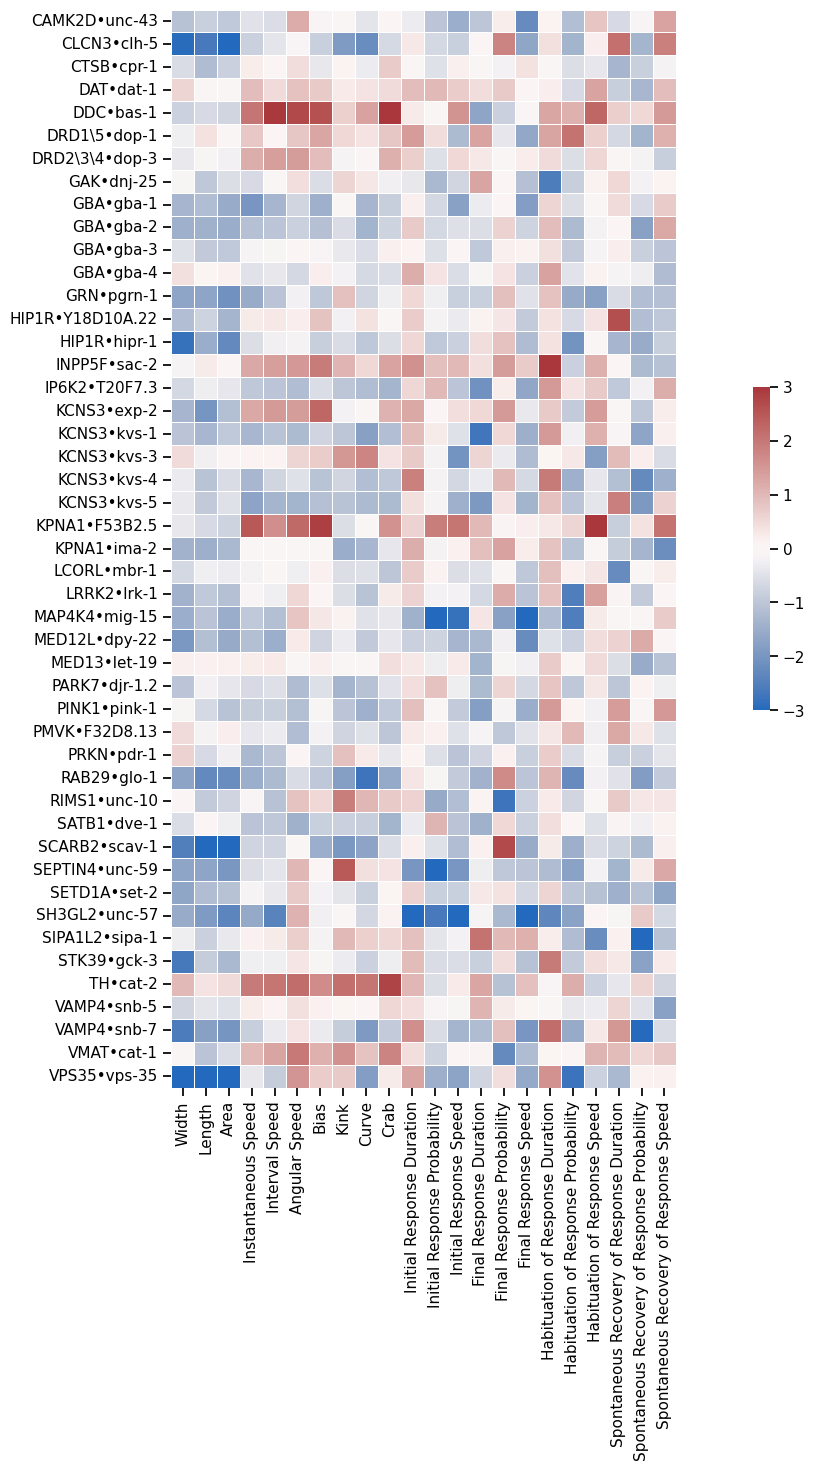

In [66]:
sns.set_context('notebook')
plt.figure(figsize=(20,14))
ax = sns.heatmap(data = PD_gene_Tstats_combined_normalize_heatmap, 
                 annot=False, 
                 linewidth=0.5, 
                 square=True, 
                 cmap="vlag", 
                 center=0, 
                 vmax=3,
                 vmin=-3, 
                 xticklabels=1,
                 yticklabels=1,
                 cbar_kws={"shrink": .3})
ax.set_ylabel('')    
plt.savefig('/Users/Joseph/Desktop/GRC_Data/Tstat_GENE_normalized_square_new.png', format='png', dpi=450, bbox_inches = "tight")
plt.show()

In [50]:
print(PD_gene_Tstats_combined_normalize)

            Instantaneous Speed  Interval Speed      Bias     Width    Length  \
dataset                                                                         
F32D8.13              -0.420892       -0.319928 -0.205766  0.483712 -0.178324   
F53B2.5                2.512413        1.632465  2.911485 -0.387548 -0.632561   
N2                     0.000000        0.000000  0.000000  0.000000  0.000000   
T20F7.3               -0.975829       -1.013358 -0.569909 -0.682317 -0.299106   
Y18D10A.22             0.252185        0.288982  0.845432 -1.161324 -0.781309   
bas-1                  2.036991        2.983182  2.635857 -0.793595 -0.630457   
cat-1                  0.986187        1.304888  1.127064 -0.003529 -1.044127   
cat-2                  1.978109        2.061910  1.691822  0.987518  0.368318   
clh-5                 -0.824426       -0.445839 -0.845738 -2.962264 -2.654110   
cpr-1                  0.215614        0.027591 -0.379714 -0.593721 -1.229709   
dat-1                  0.936

In [51]:
first_col=PD_gene_Tstats_combined_normalize.pop("Area")
PD_gene_Tstats_combined_normalize.insert(0,"Area",first_col)

first_col=PD_gene_Tstats_combined_normalize.pop("Length")
PD_gene_Tstats_combined_normalize.insert(0,"Length",first_col)

first_col=PD_gene_Tstats_combined_normalize.pop("Width")
PD_gene_Tstats_combined_normalize.insert(0,"Width",first_col)

first_col=PD_gene_Tstats_combined_normalize.pop("Angular Speed")
PD_gene_Tstats_combined_normalize.insert(5,"Angular Speed",first_col)

last_col=PD_gene_Tstats_combined_normalize.pop("Spontaneous Recovery of Response Duration")
PD_gene_Tstats_combined_normalize.insert(21,"Spontaneous Recovery of Response Duration",last_col)

last_col=PD_gene_Tstats_combined_normalize.pop("Spontaneous Recovery of Response Probability")
PD_gene_Tstats_combined_normalize.insert(21,"Spontaneous Recovery of Response Probability",last_col)

last_col=PD_gene_Tstats_combined_normalize.pop("Spontaneous Recovery of Response Speed")
PD_gene_Tstats_combined_normalize.insert(21,"Spontaneous Recovery of Response Speed",last_col)

print(PD_gene_Tstats_combined_normalize)

               Width    Length      Area  Instantaneous Speed  Interval Speed  \
dataset                                                                         
F32D8.13    0.483712 -0.178324  0.204114            -0.420892       -0.319928   
F53B2.5    -0.387548 -0.632561 -0.772372             2.512413        1.632465   
N2          0.000000  0.000000  0.000000             0.000000        0.000000   
T20F7.3    -0.682317 -0.299106 -0.413040            -0.975829       -1.013358   
Y18D10A.22 -1.161324 -0.781309 -1.366591             0.252185        0.288982   
bas-1      -0.793595 -0.630457 -0.725589             2.036991        2.983182   
cat-1      -0.003529 -1.044127 -0.584029             0.986187        1.304888   
cat-2       0.987518  0.368318  0.492989             1.978109        2.061910   
clh-5      -2.962264 -2.654110 -3.160536            -0.824426       -0.445839   
cpr-1      -0.593721 -1.229709 -0.804467             0.215614        0.027591   
dat-1       0.590636 -0.0394

In [52]:
PD_gene_Tstats_melted=PD_gene_Tstats_combined_normalize.reset_index()
print(PD_gene_Tstats_melted)
PD_gene_Tstats_melted_gene=pd.melt(PD_gene_Tstats_melted, id_vars=['dataset'],
                                   var_name='Metric',
                                   value_name='Normalized T_score')
PD_gene_Tstats_melted_gene_sorted=PD_gene_Tstats_melted_gene.sort_values(by=['Normalized T_score'])
print(PD_gene_Tstats_melted_gene)
print(PD_gene_Tstats_melted_gene_sorted)
# PD_gene_Tstats_melted_metric=pd.melt(PD_gene_Tstats_melted_gene, id_vars=['dataset'],
#                              value_name='metric')


       dataset     Width    Length      Area  Instantaneous Speed  \
0     F32D8.13  0.483712 -0.178324  0.204114            -0.420892   
1      F53B2.5 -0.387548 -0.632561 -0.772372             2.512413   
2           N2  0.000000  0.000000  0.000000             0.000000   
3      T20F7.3 -0.682317 -0.299106 -0.413040            -0.975829   
4   Y18D10A.22 -1.161324 -0.781309 -1.366591             0.252185   
5        bas-1 -0.793595 -0.630457 -0.725589             2.036991   
6        cat-1 -0.003529 -1.044127 -0.584029             0.986187   
7        cat-2  0.987518  0.368318  0.492989             1.978109   
8        clh-5 -2.962264 -2.654110 -3.160536            -0.824426   
9        cpr-1 -0.593721 -1.229709 -0.804467             0.215614   
10       dat-1  0.590636 -0.039453 -0.030561             0.936182   
11     djr-1.2 -1.030885 -0.224115 -0.414547            -0.629158   
12      dnj-25 -0.128065 -0.978016 -0.555051            -0.621425   
13       dop-1 -0.268470  0.389168

In [53]:
metric_palette=["k","k","k",
                "darkgray","darkgray","darkgray","darkgray","darkgray","darkgray","darkgray",
                "lightsteelblue","lightsteelblue","lightsteelblue",
                "powderblue","powderblue","powderblue",
                "cadetblue","cadetblue","cadetblue",
                "thistle","thistle","thistle"]

In [65]:
PD_gene_Tstats_combined_normalize_orthology_melted=PD_gene_Tstats_combined_normalize_heatmap.reset_index().rename(columns={"Spontaneous Recovery of Response Duration":"Spont. Recov. of Resp. Duration",
                                                                                                                     "Spontaneous Recovery of Response Probability":"Spont. Recov. of Resp. Probability",
                                                                                                                     "Spontaneous Recovery of Response Speed":"Spont. Recov. of Resp. Speed"})
PD_gene_Tstats_combined_normalize_orthology_melted=pd.melt(PD_gene_Tstats_combined_normalize_orthology_melted, id_vars=['Gene'],
                                   var_name='Metric',
                                   value_name='Normalized T_score')
PD_gene_Tstats_orthology_melted_gene_sorted=PD_gene_Tstats_combined_normalize_orthology_melted.sort_values(by=['Normalized T_score'])
# print(PD_gene_Tstats_melted_gene)
print(PD_gene_Tstats_orthology_melted_gene_sorted)
# PD_gene_Tstats_melted_metric=pd.melt(PD_gene_Tstats_melted_gene, id_vars=['dataset'],
#                              value_name='metric')



               Gene                              Metric  Normalized T_score
77    SCARB2•scav-1                              Length           -5.062383
131    VPS35•vps-35                                Area           -4.694254
683   MAP4K4•mig-15                Final Response Speed           -4.530770
475   SH3GL2•unc-57           Initial Response Duration           -4.420905
916  SIPA1L2•sipa-1  Spont. Recov. of Resp. Probability           -3.860402
..              ...                                 ...                 ...
284   KPNA1•F53B2.5                                Bias            2.911485
179       DDC•bas-1                      Interval Speed            2.983182
717    INPP5F•sac-2    Habituation of Response Duration            3.076071
399       DDC•bas-1                                Crab            3.110727
812   KPNA1•F53B2.5       Habituation of Response Speed            3.847699

[968 rows x 3 columns]


In [55]:
print(PD_gene_Tstats_melted_gene.dataset.unique())
PD_gene_Tstats_combined_normalize_orthology=PD_gene_Tstats_combined_normalize_heatmap.reset_index()
print(PD_gene_Tstats_combined_normalize_orthology.Gene.unique())

['F32D8.13' 'F53B2.5' 'N2' 'T20F7.3' 'Y18D10A.22' 'bas-1' 'cat-1' 'cat-2'
 'clh-5' 'cpr-1' 'dat-1' 'djr-1.2' 'dnj-25' 'dop-1' 'dop-3' 'dpy-22'
 'dve-1' 'exp-2' 'gba-1' 'gba-2' 'gba-3' 'gba-4' 'gck-3' 'glo-1' 'hipr-1'
 'ima-2' 'kvs-1' 'kvs-3' 'kvs-4' 'kvs-5' 'let-19' 'lrk-1' 'mbr-1' 'mig-15'
 'pamn' 'pdr-1' 'pgrn-1' 'pink-1' 'sac-2' 'scav-1' 'set-2' 'sipa-1'
 'snb-5' 'snb-7' 'unc-10' 'unc-43' 'unc-57' 'unc-59' 'vps-35']
['CAMK2D•unc-43' 'CLCN3•clh-5' 'CTSB•cpr-1' 'DDC•bas-1' 'DRD2\\3\\4•dop-3'
 'GAK•dnj-25' 'GBA•gba-1' 'GBA•gba-2' 'GBA•gba-3' 'GBA•gba-4' 'GRN•pgrn-1'
 'HIP1R•Y18D10A.22' 'HIP1R•hipr-1' 'INPP5F•sac-2' 'IP6K2•T20F7.3'
 'KCNS3•exp-2' 'KCNS3•kvs-1' 'KCNS3•kvs-3' 'KCNS3•kvs-4' 'KCNS3•kvs-5'
 'KPNA1•F53B2.5' 'KPNA1•ima-2' 'LCORL•mbr-1' 'MAP4K4•mig-15'
 'MED12L•dpy-22' 'MED13•let-19' 'PARK7•djr-1.2' 'PINK1•pink-1'
 'PMVK•F32D8.13' 'PRKN•pdr-1' 'RAB29•glo-1' 'RIMS1•unc-10' 'SATB1•dve-1'
 'SCARB2•scav-1' 'SETD1A•set-2' 'SH3GL2•unc-57' 'SIPA1L2•sipa-1'
 'SLC18A1\\2•cat-1' 'SLC6A2\

In [64]:
PD_gene_Tstats_combined_normalize_orthology_melted=PD_gene_Tstats_combined_normalize_orthology_melted.rename(columns={"Spontaneous Recovery of Response Duration":"Spont. Recov. of Resp. Duration",
                                                                                                                     "Spontaneous Recovery of Response Probability":"Spont. Recov. of Resp. Probability",
                                                                                                                     "Spontaneous Recovery of Response Speed":"Spont. Recov. of Resp. Speed"})
print(PD_gene_Tstats_combined_normalize_orthology_melted)

               Gene                                  Metric  \
0     CAMK2D•unc-43                                   Width   
1       CLCN3•clh-5                                   Width   
2        CTSB•cpr-1                                   Width   
3         DDC•bas-1                                   Width   
4    DRD2\3\4•dop-3                                   Width   
..              ...                                     ...   
963     STK39•gck-3  Spontaneous Recovery of Response Speed   
964        TH•cat-2  Spontaneous Recovery of Response Speed   
965     VAMP4•snb-5  Spontaneous Recovery of Response Speed   
966     VAMP4•snb-7  Spontaneous Recovery of Response Speed   
967    VPS35•vps-35  Spontaneous Recovery of Response Speed   

     Normalized T_score  
0             -1.098798  
1             -2.962264  
2             -0.593721  
3             -0.793595  
4             -0.373281  
..                  ...  
963            0.281109  
964           -0.718282  
965      

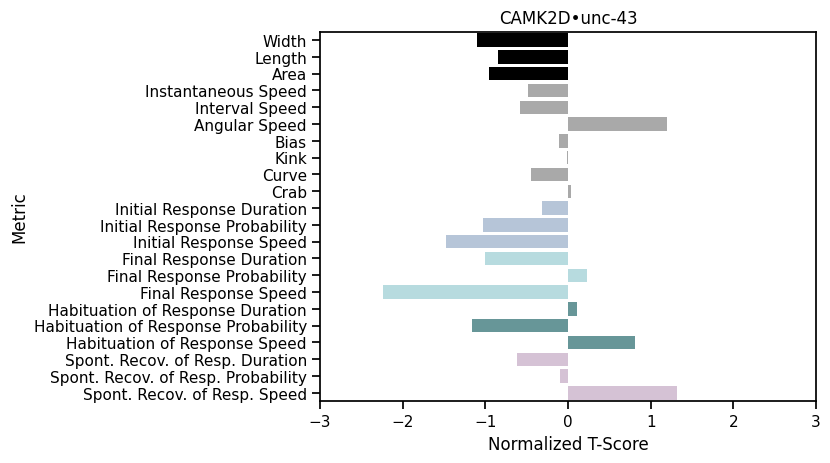

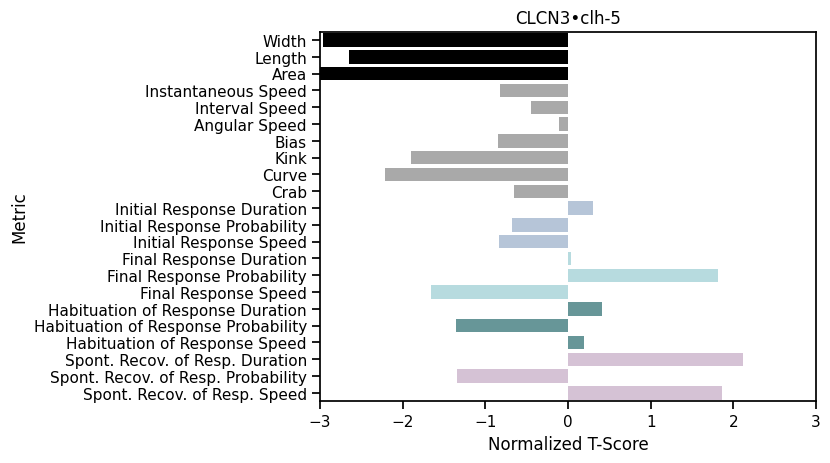

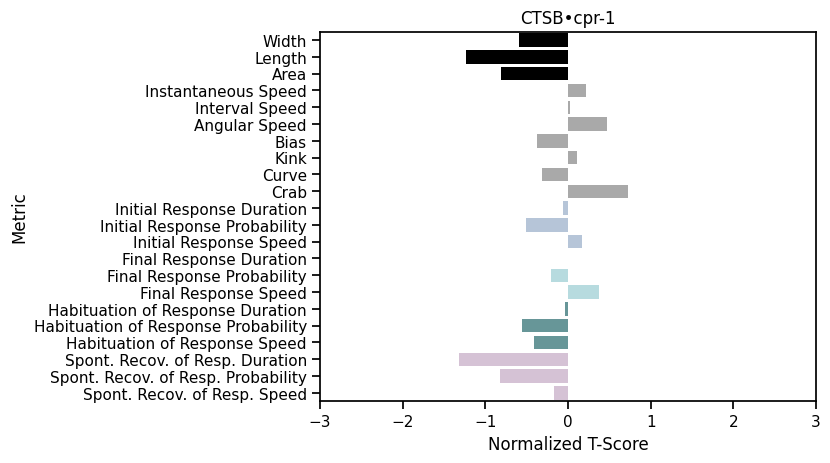

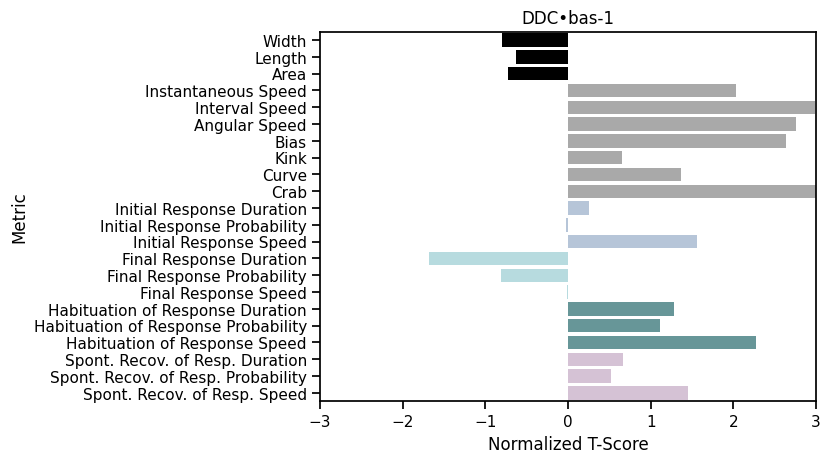

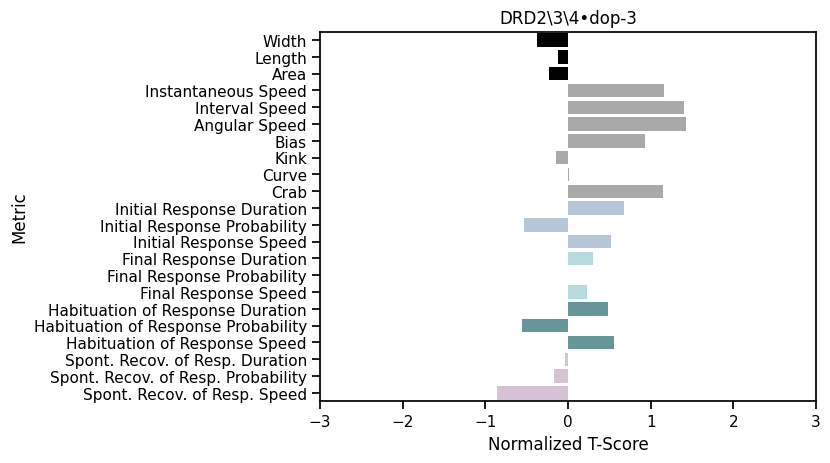

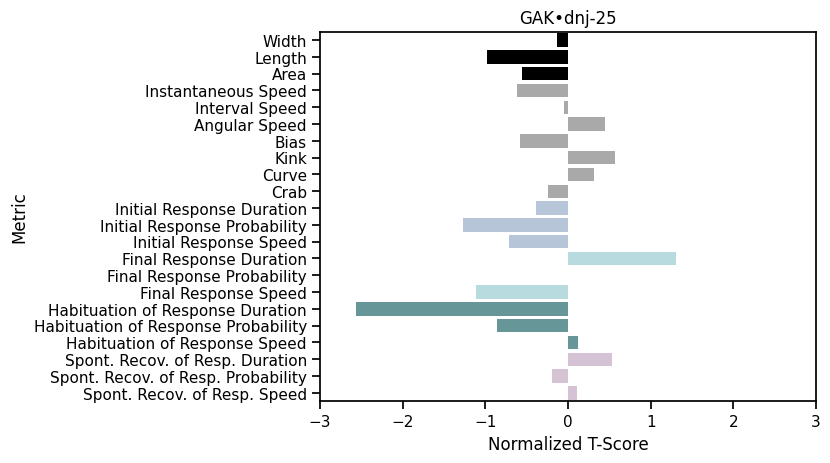

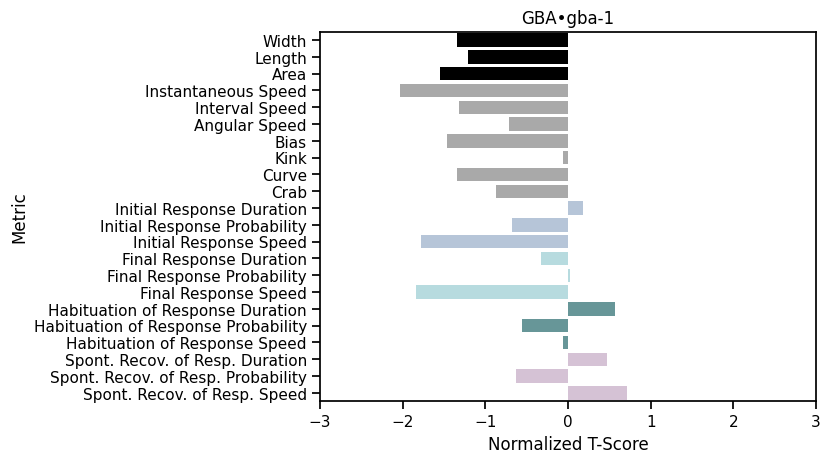

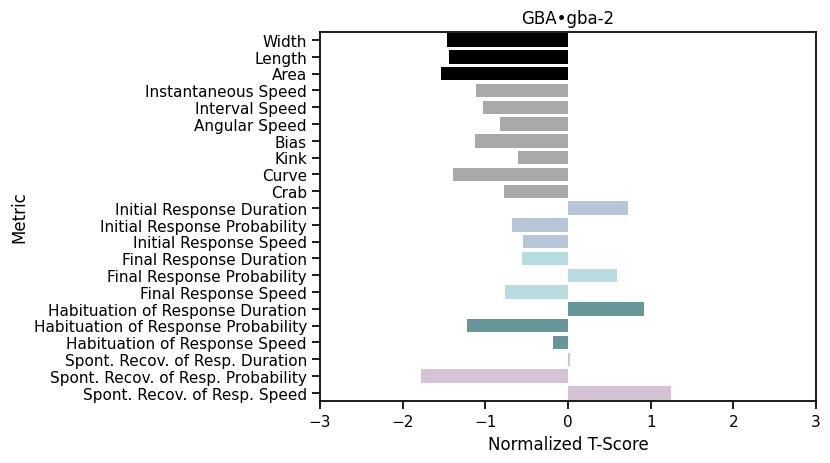

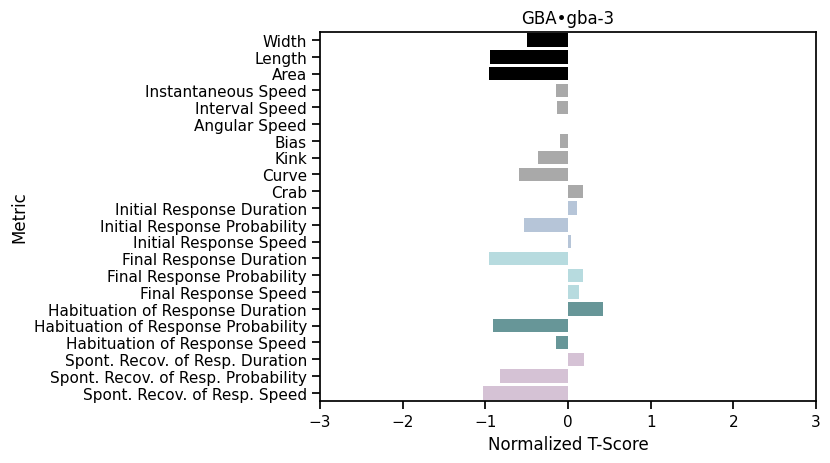

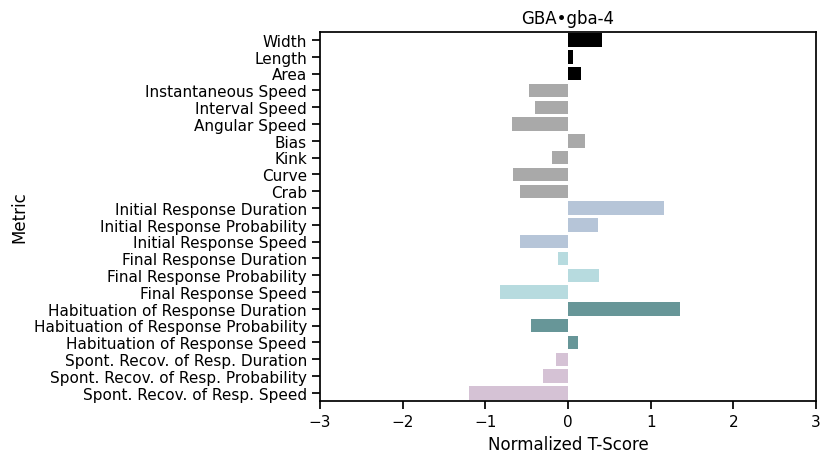

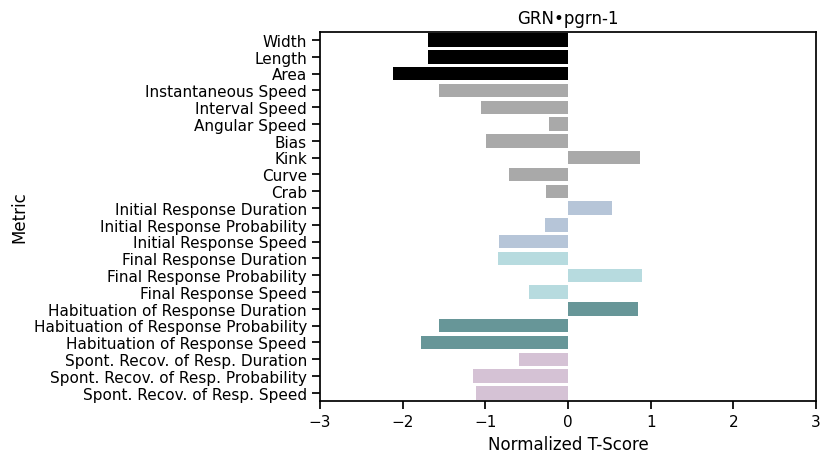

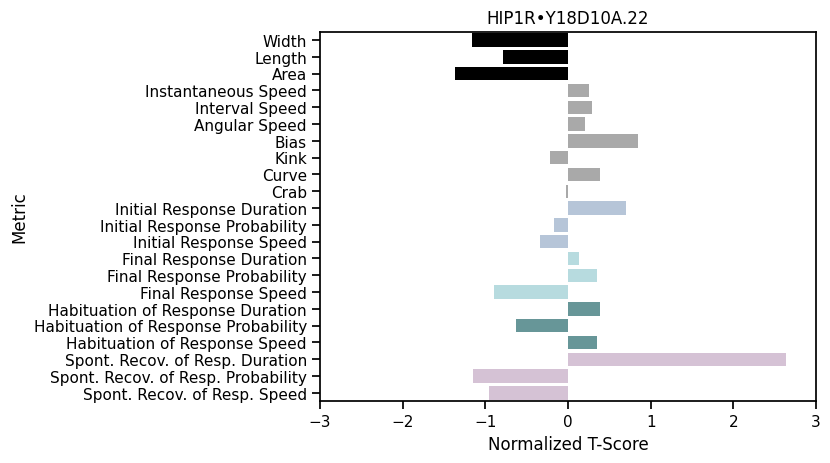

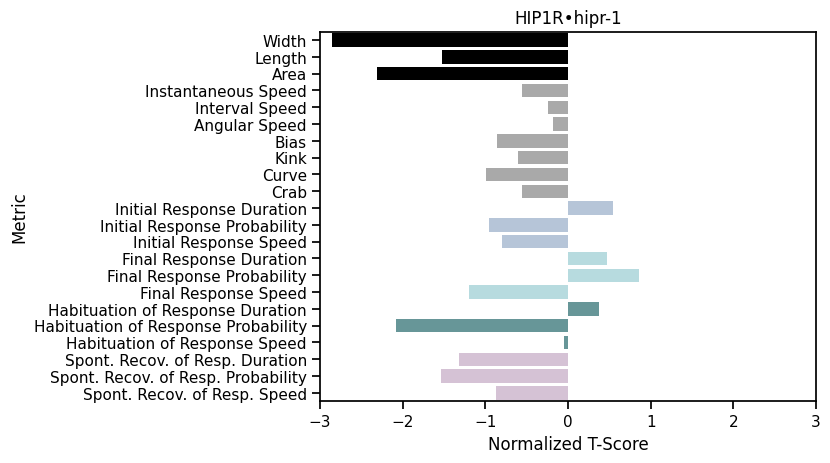

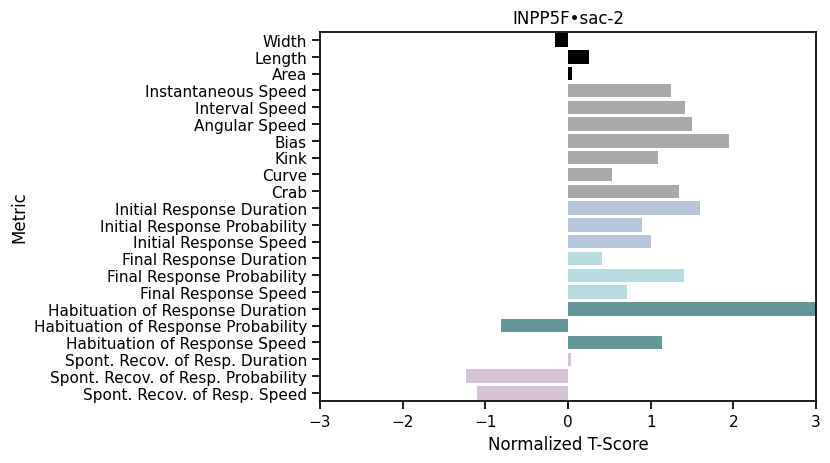

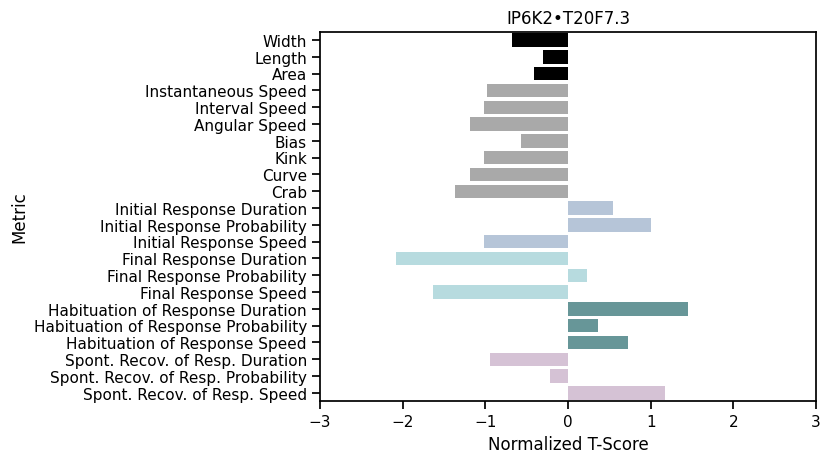

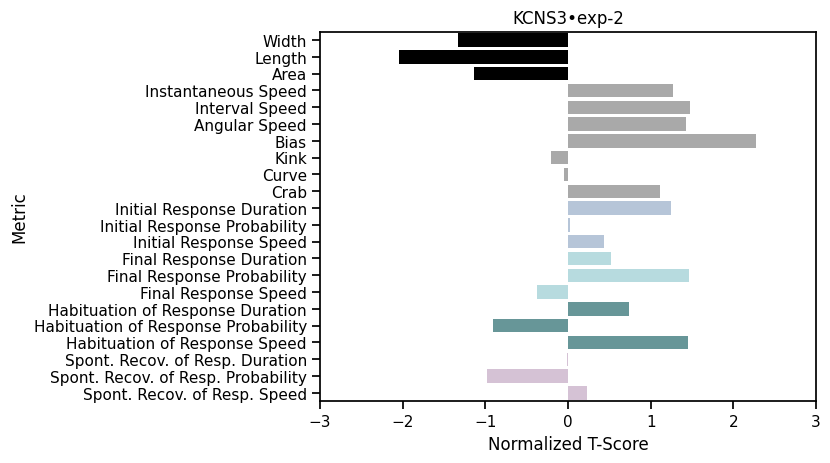

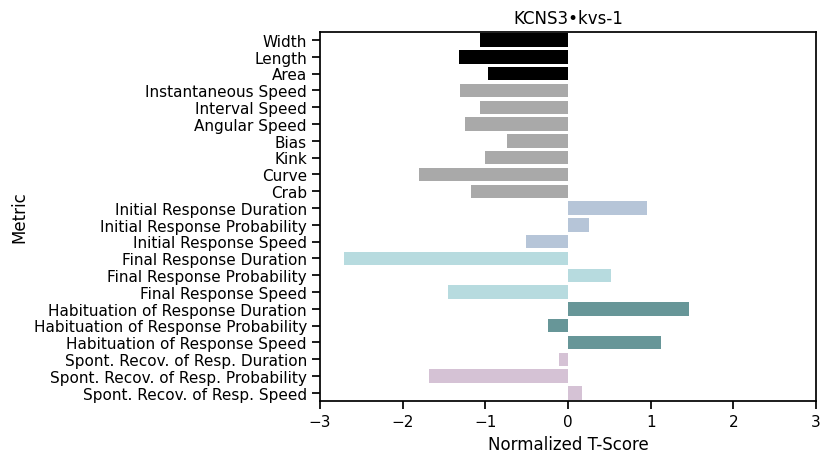

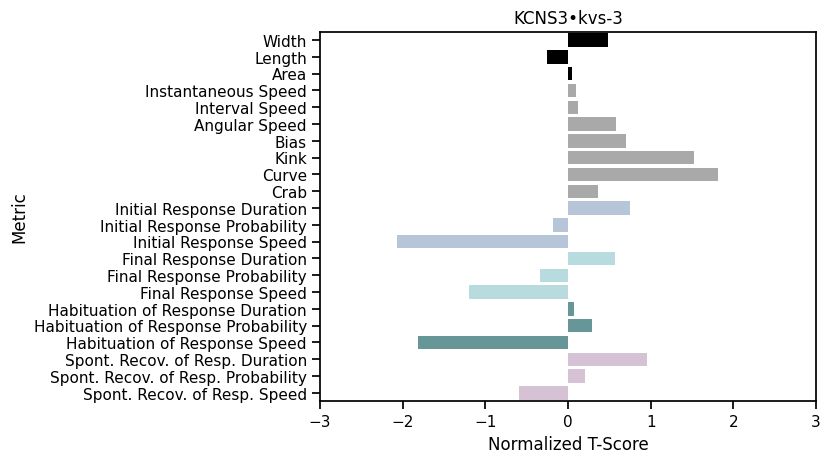

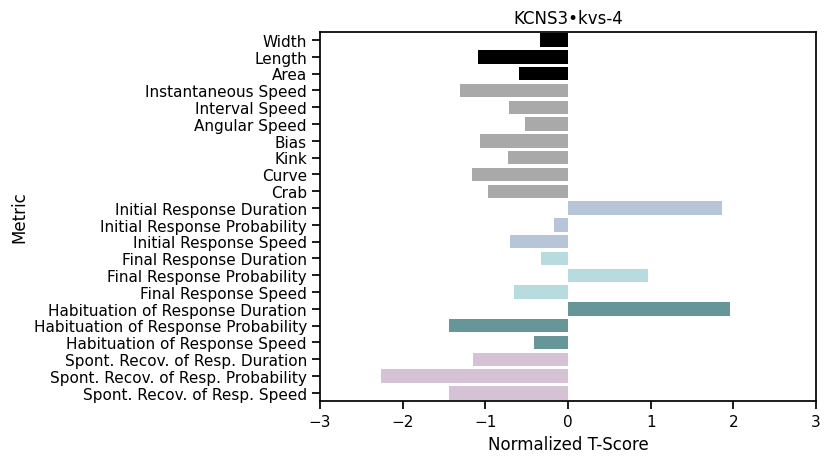

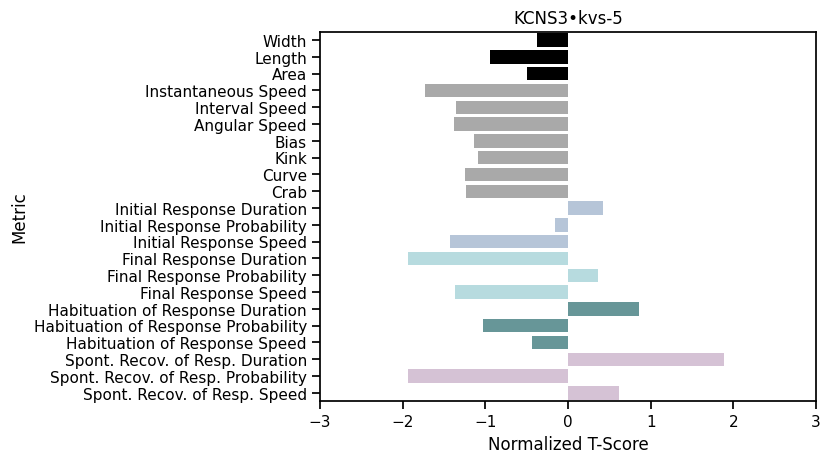

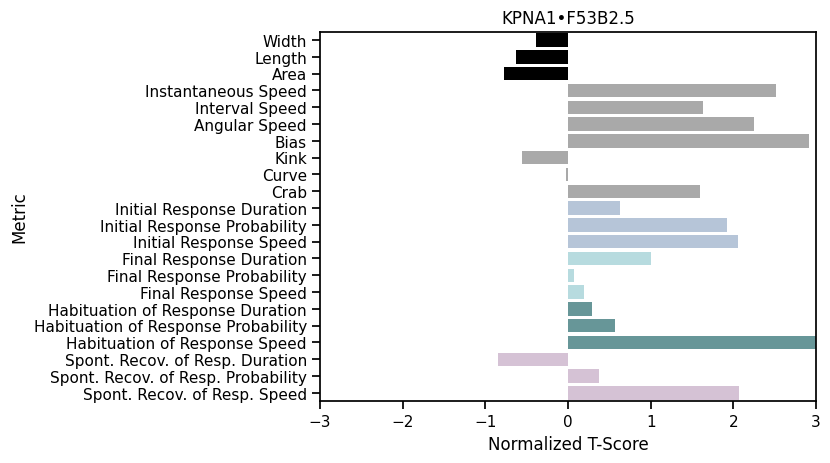

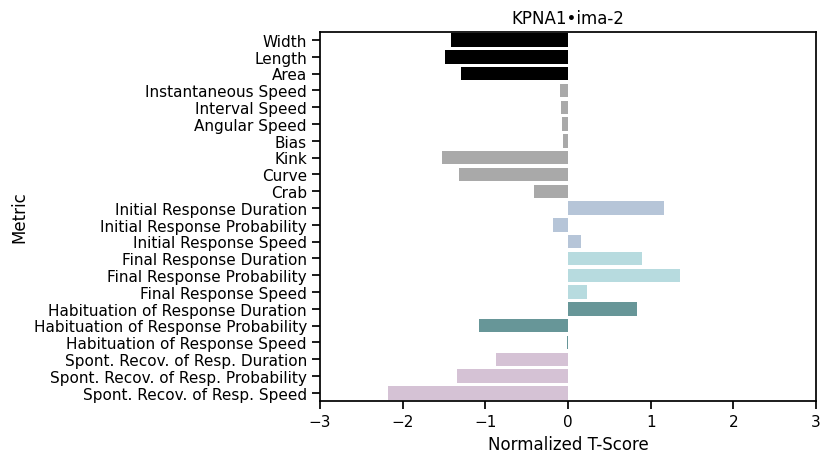

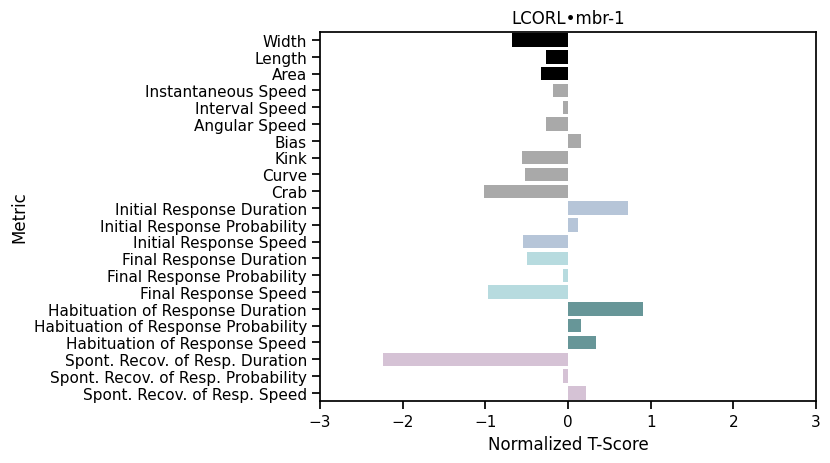

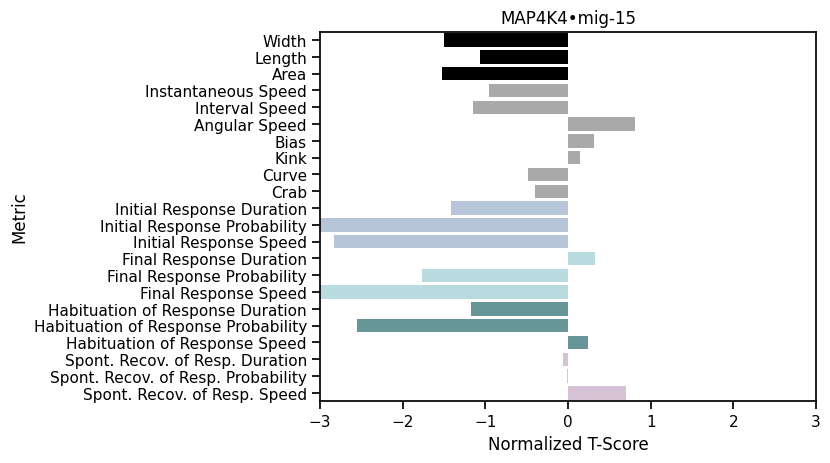

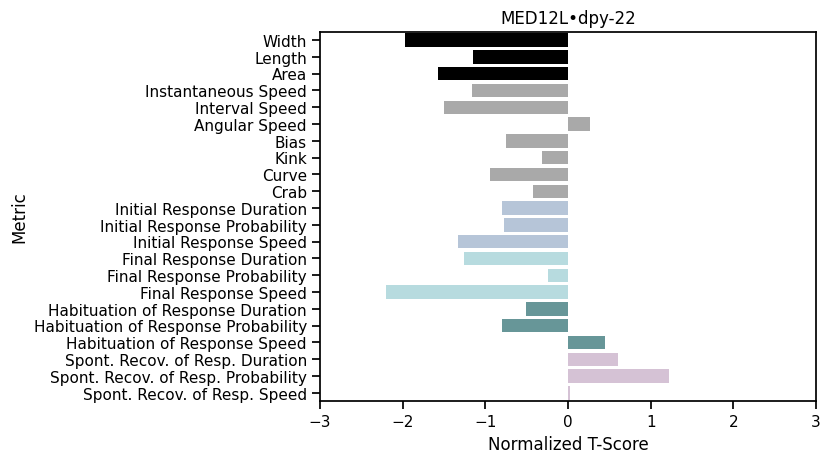

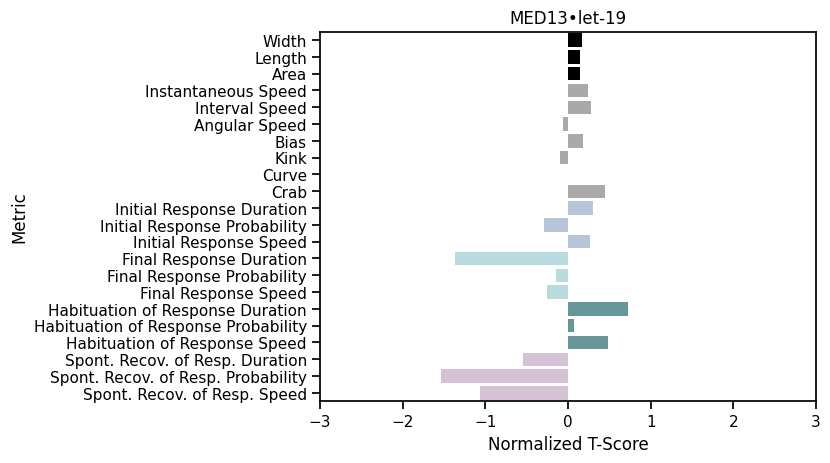

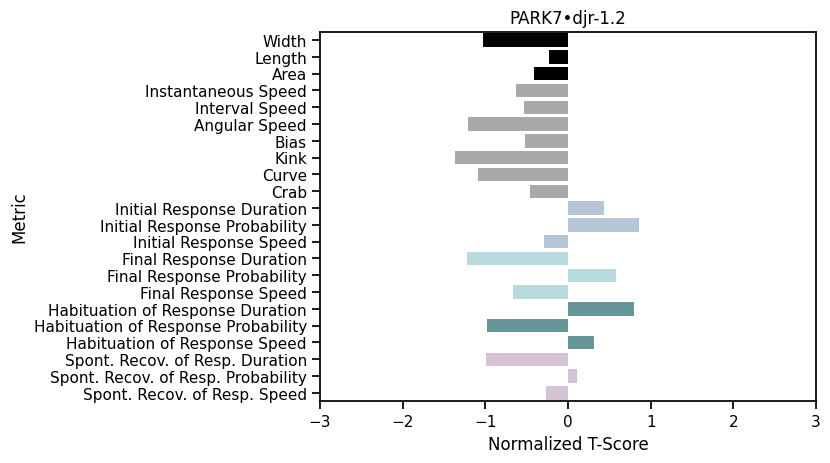

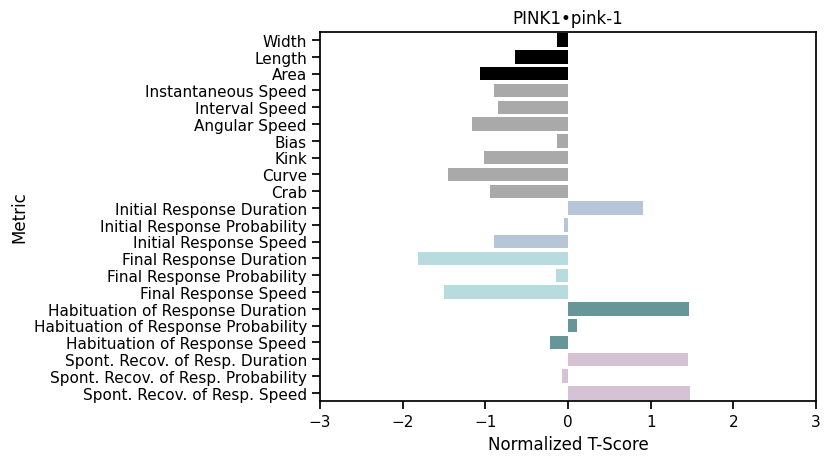

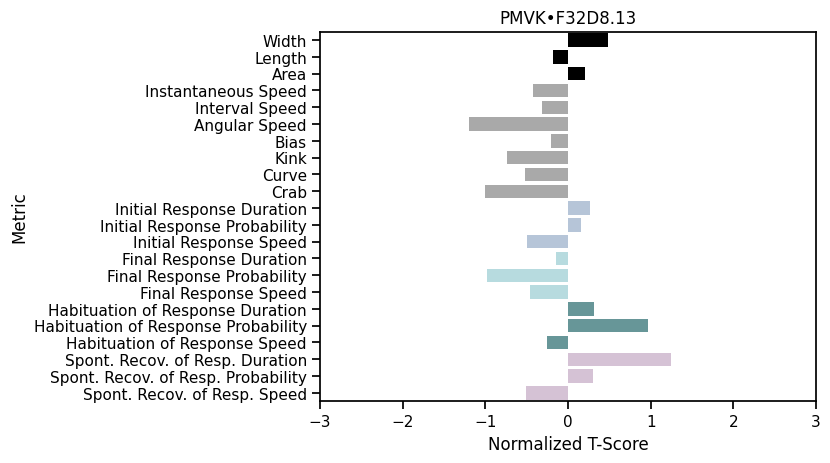

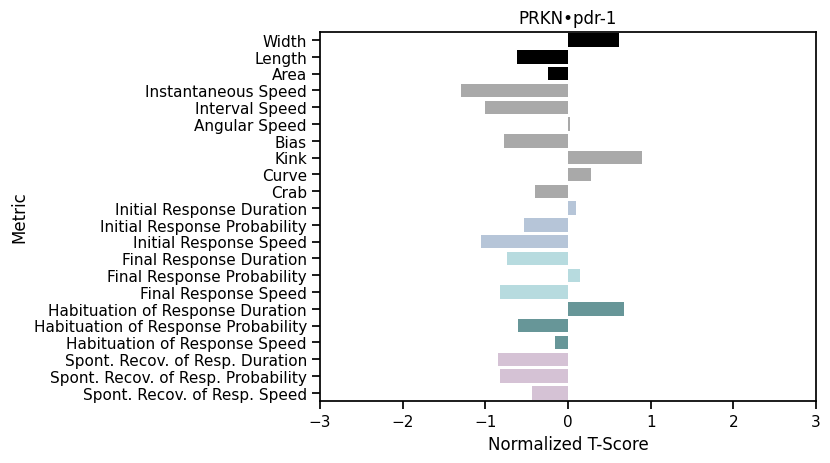

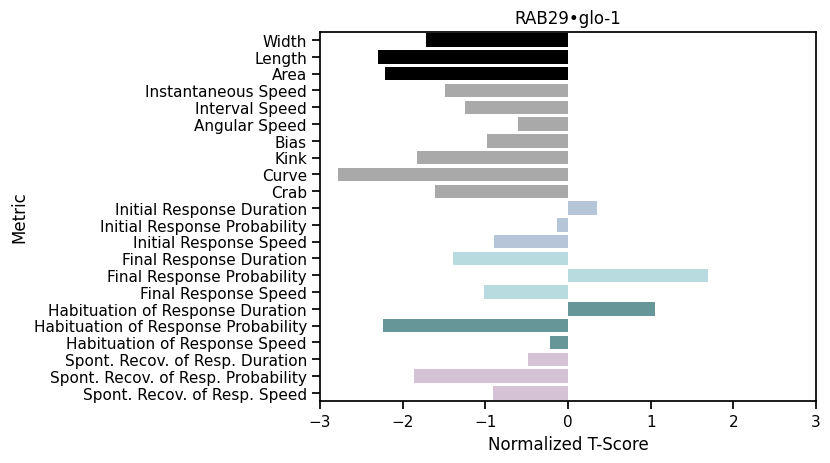

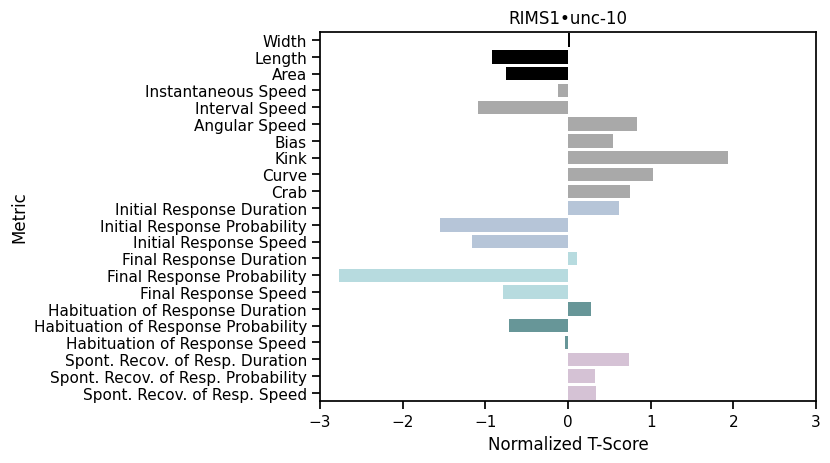

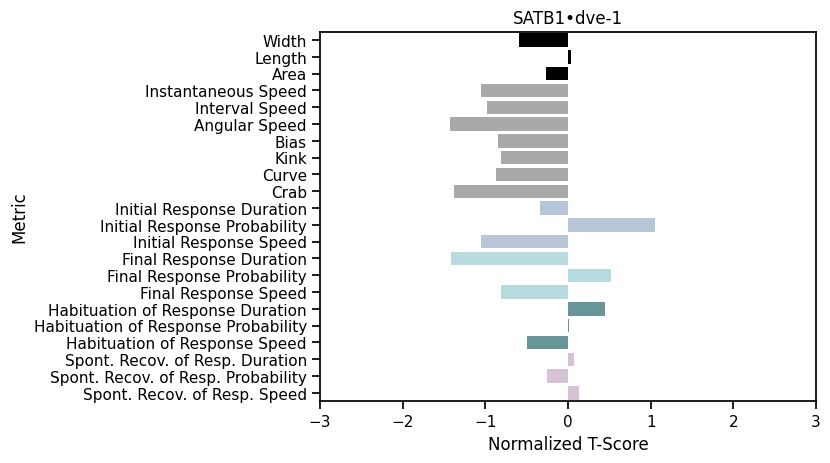

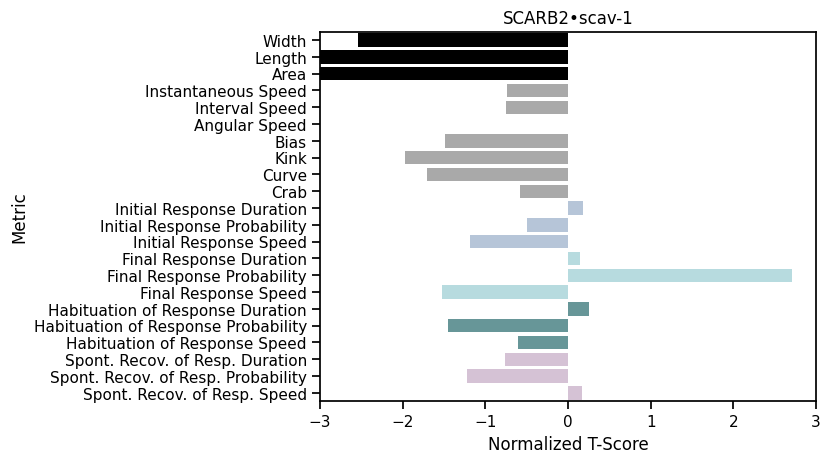

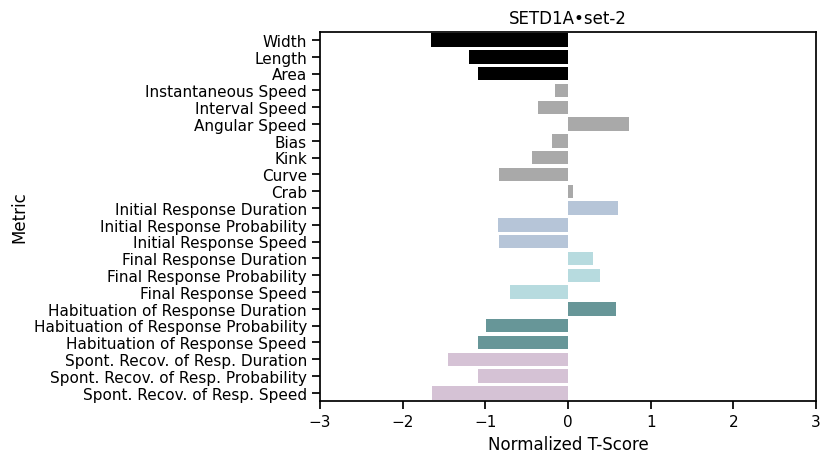

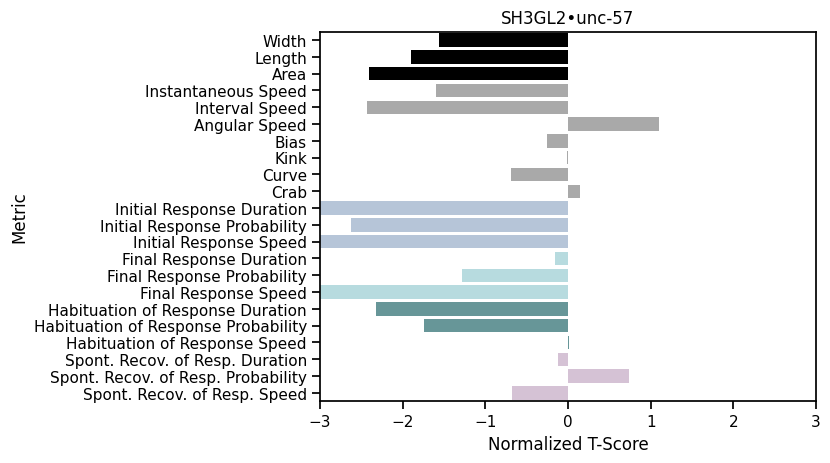

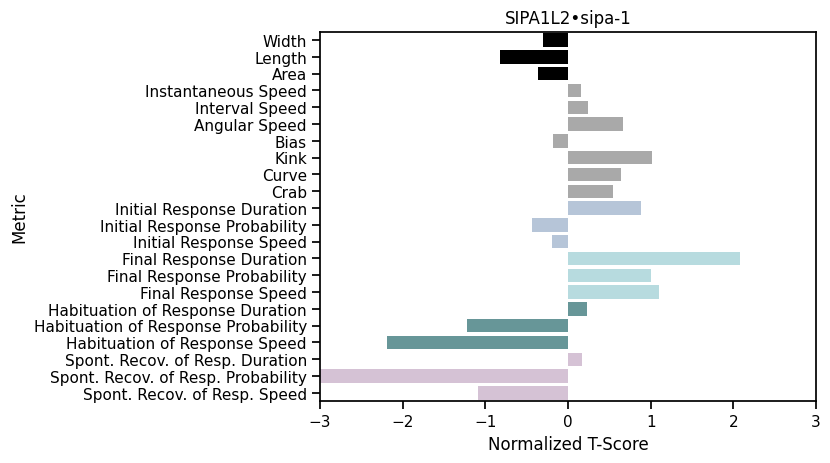

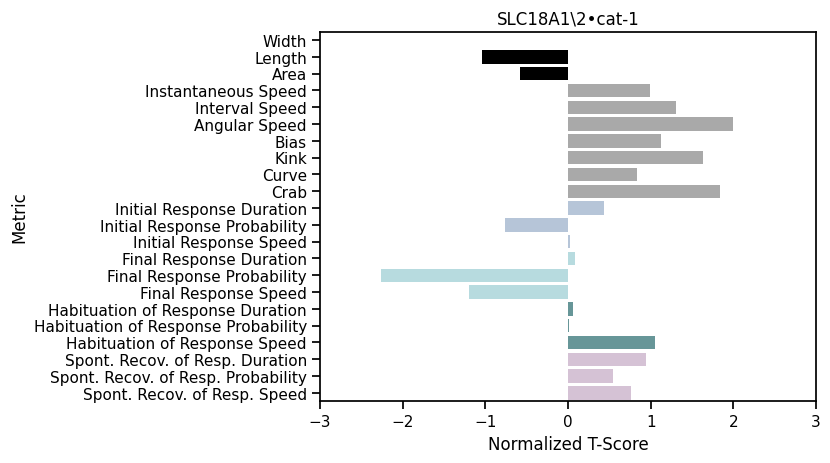

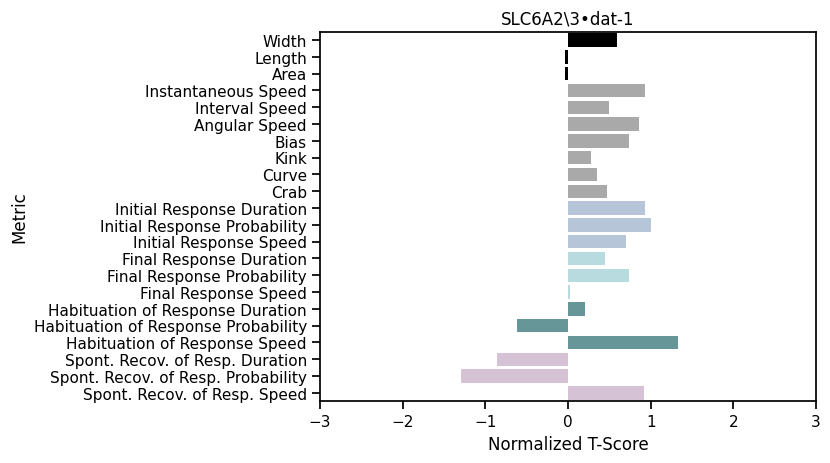

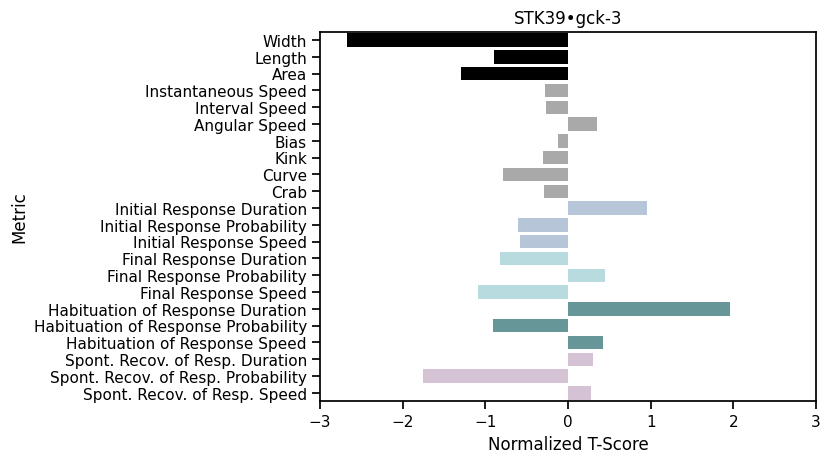

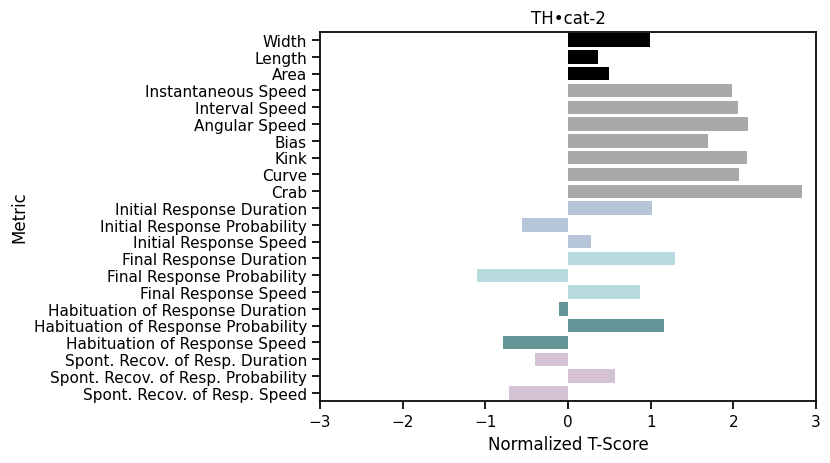

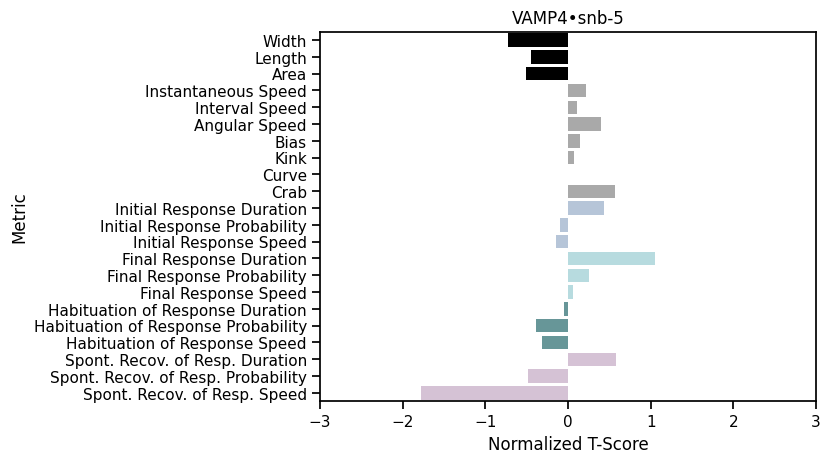

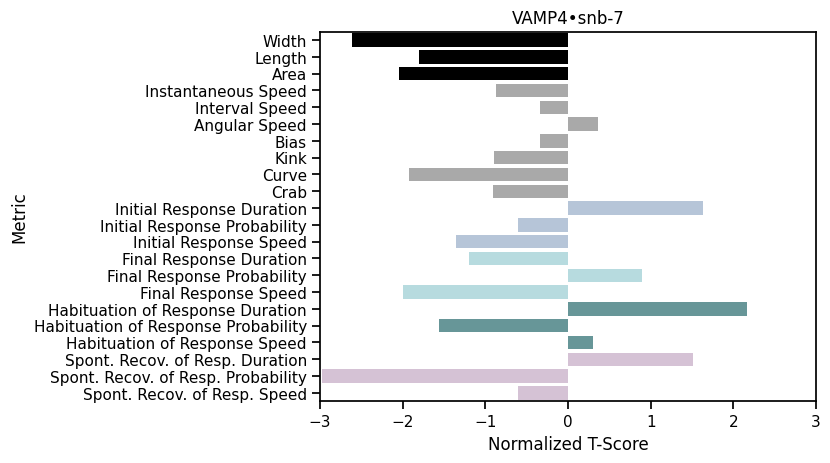

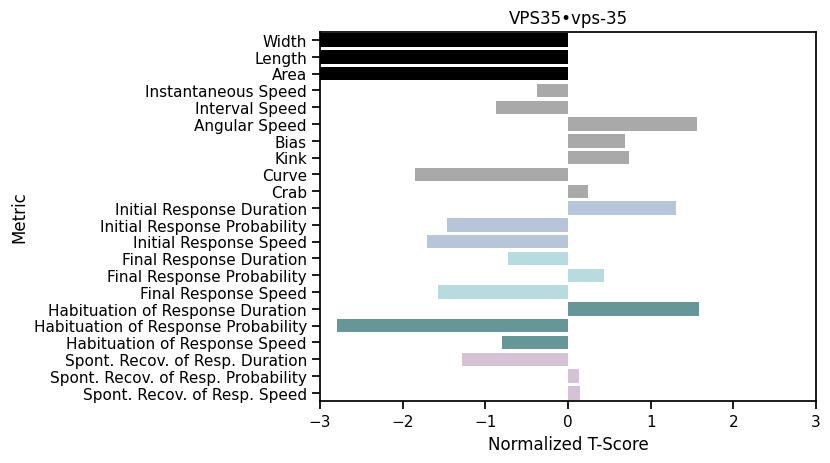

done


In [66]:
# sns.barplot(data=PD_gene_Tstats_melted_gene[PD_gene_Tstats_melted_gene.dataset=="F53B2.5"], x="Metric", y="T_score")
# plt.xticks(rotation=90)

sns.set_context('notebook')
# # plt.figure(figsize=(14,14))
# ax = sns.barplot(data = PD_gene_Tstats_melted_gene[PD_gene_Tstats_melted_gene.dataset=="F53B2.5"], 
#                 x="Metric",
#                 y="T_score",
#                 palette=metric_palette)
# plt.xticks(rotation=90)
# # plt.savefig('/Users/Joseph/Desktop/PD_Screen_TapHab/Tstat_GENE.png', format='png', dpi=450, bbox_inches = "tight")
# # '/Users/Joseph/Desktop/PD_Screen_TapHab/Baseline100Data.csv'
# plt.show()

for x in PD_gene_Tstats_combined_normalize_orthology_melted.Gene.unique():
    plt.figure()
    ax = sns.barplot(data = PD_gene_Tstats_combined_normalize_orthology_melted[PD_gene_Tstats_combined_normalize_orthology_melted.Gene==f"{x}"], 
                x="Normalized T_score",
                y="Metric", orient='h',
                palette=metric_palette).set_title(f"{x}")
    plt.xlim(-3,3)
    plt.xlabel('Normalized T-Score')
#     plt.xticks(rotation=90)
    plt.savefig(f'/Users/Joseph/Desktop/GRC_Data/Gene_Metrics_h/{x}_Metrics.png', format='png', dpi=450, bbox_inches = "tight")
    plt.show()
print("done")

In [67]:
# print(PD_gene_Tstats_combined)
PD_gene_Tstats_combined_melted=PD_gene_Tstats_combined.reset_index()
PD_gene_Tstats_combined_melted=pd.melt(PD_gene_Tstats_combined_melted, id_vars=['Gene'],
                                   var_name='Metric',
                                   value_name='T_score')
PD_gene_Tstats_combined_melted_sorted=PD_gene_Tstats_combined_melted.sort_values(by=['T_score'])
# print(PD_gene_Tstats_melted_gene)
print(PD_gene_Tstats_combined_melted_sorted)

               Gene                                        Metric   T_score
209   SCARB2•scav-1                                        Length -5.062383
263    VPS35•vps-35                                          Area -4.694254
815   MAP4K4•mig-15                          Final Response Speed -4.530770
607   SH3GL2•unc-57                     Initial Response Duration -4.420905
520  SIPA1L2•sipa-1  Spontaneous Recovery of Response Probability -3.860402
..              ...                                           ...       ...
108   KPNA1•F53B2.5                                          Bias  2.911485
47        DDC•bas-1                                Interval Speed  2.983182
849    INPP5F•sac-2              Habituation of Response Duration  3.076071
399       DDC•bas-1                                          Crab  3.110727
944   KPNA1•F53B2.5                 Habituation of Response Speed  3.847699

[968 rows x 3 columns]


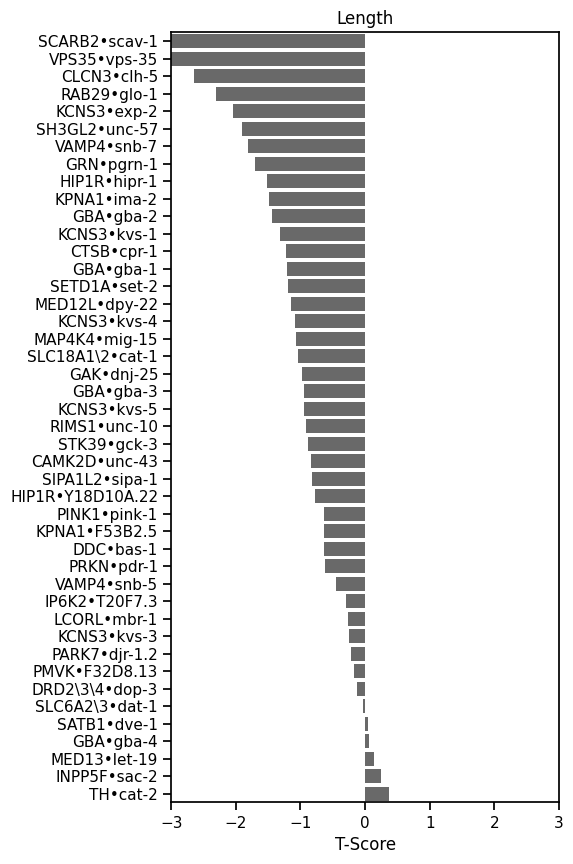

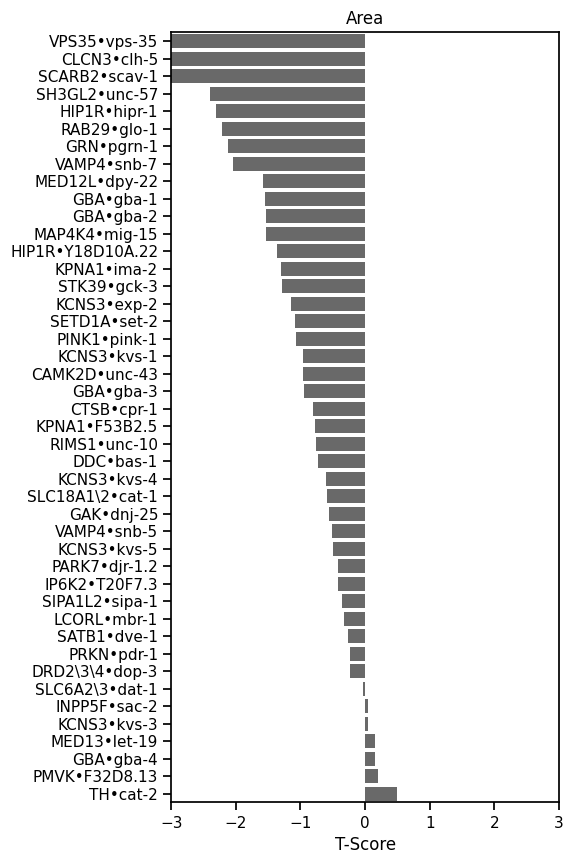

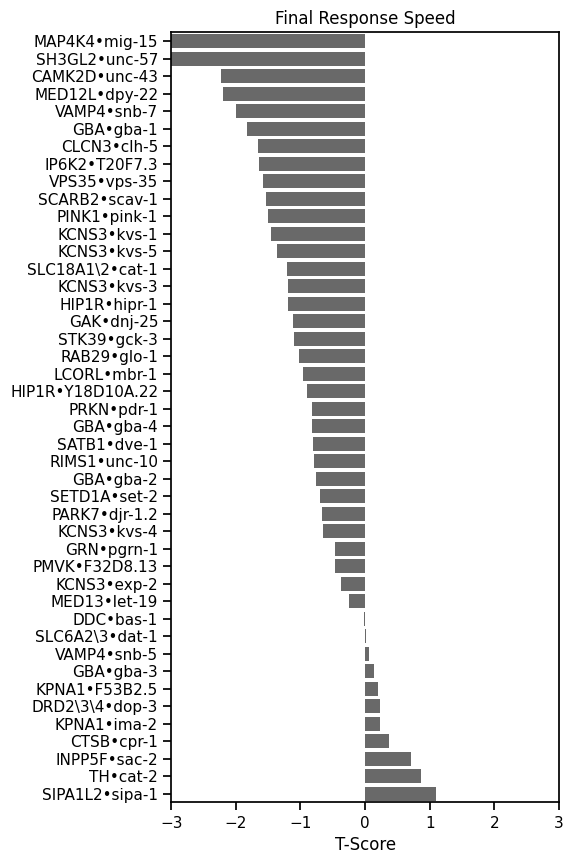

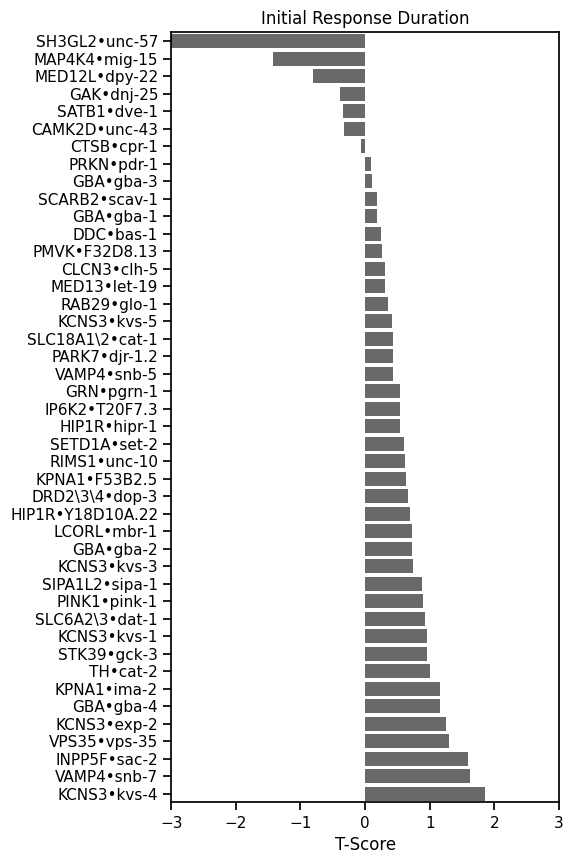

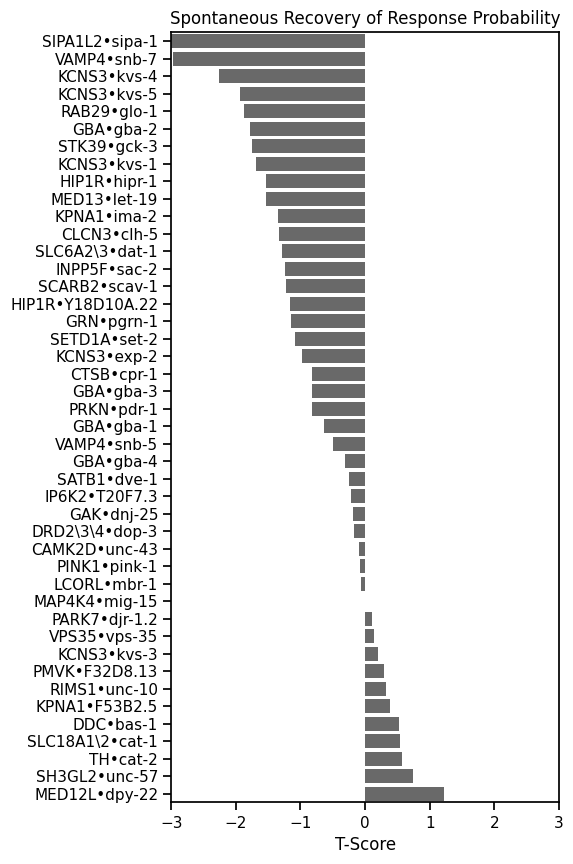

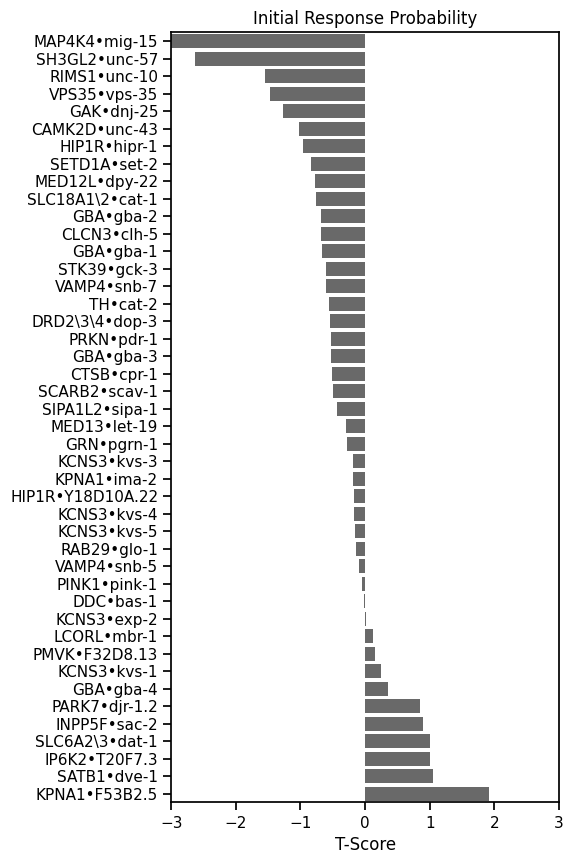

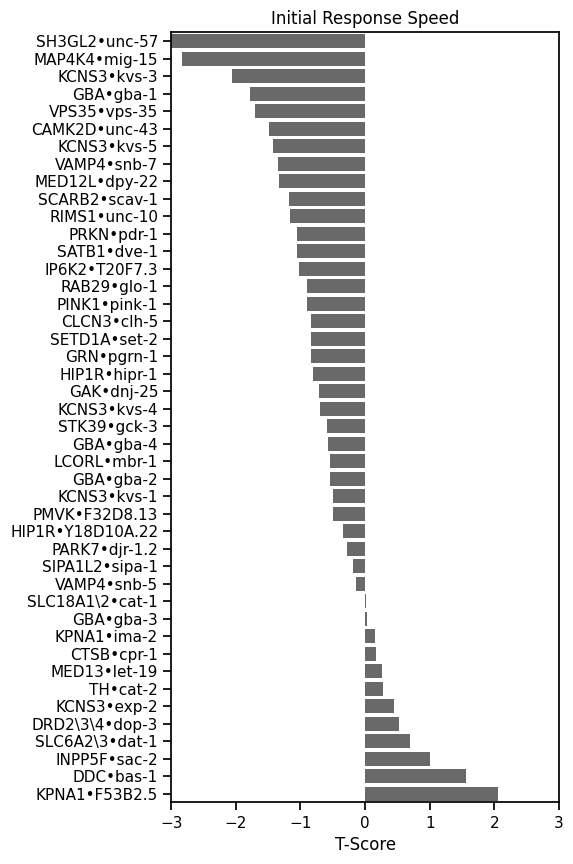

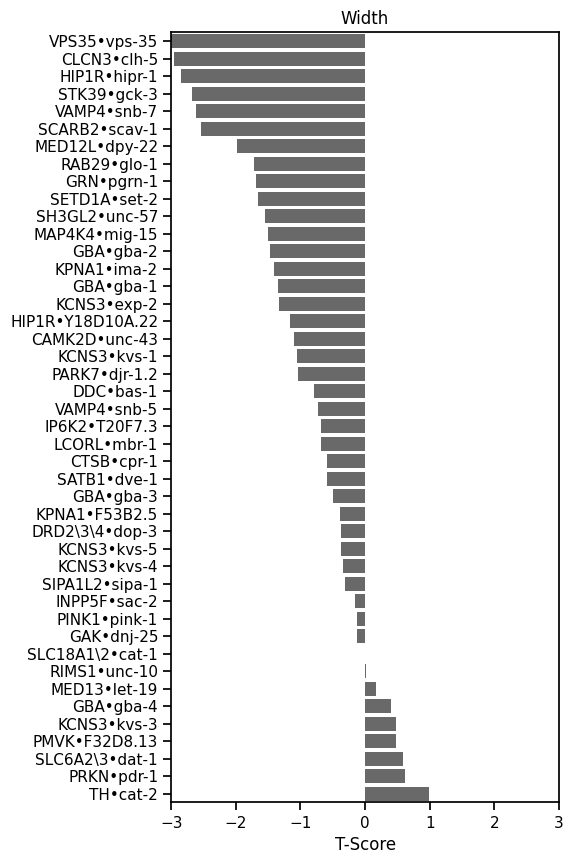

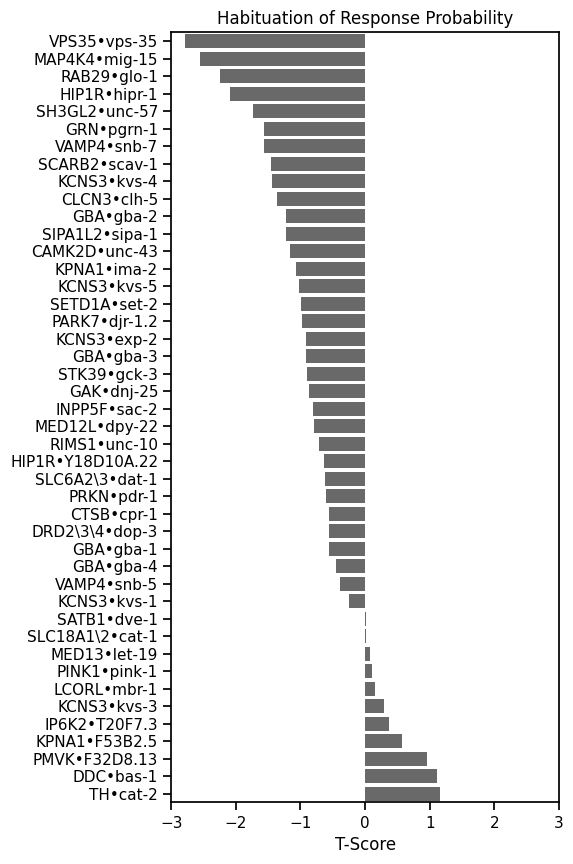

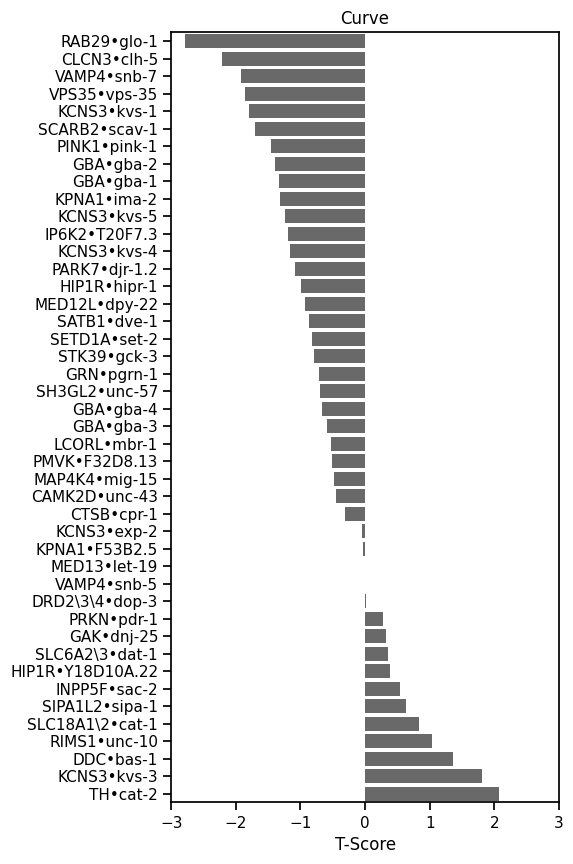

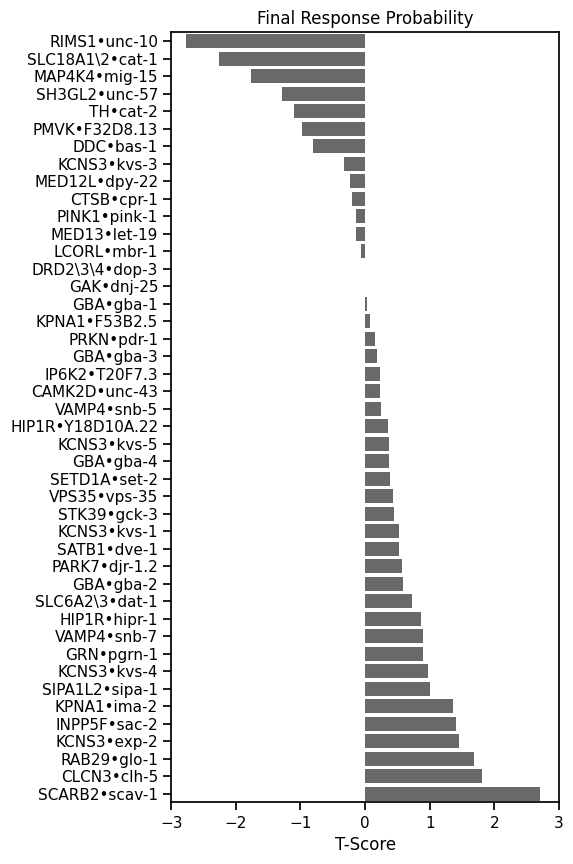

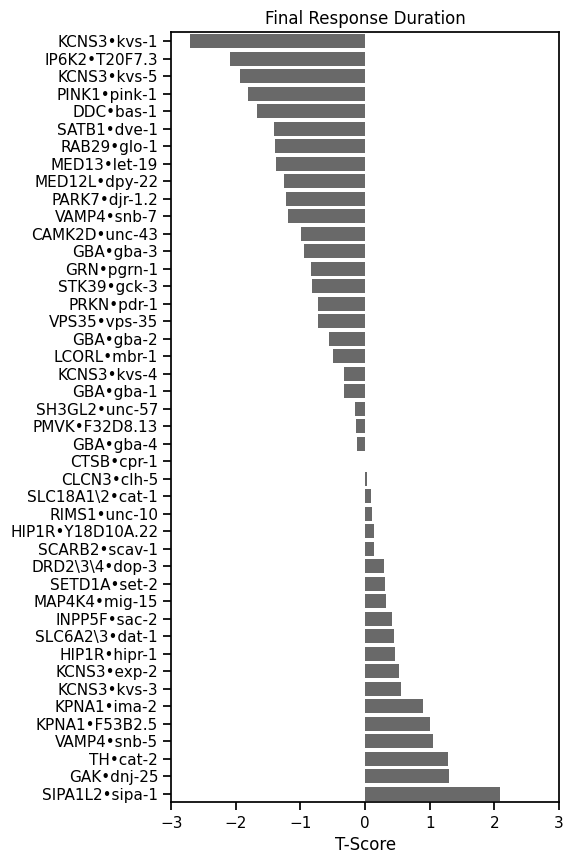

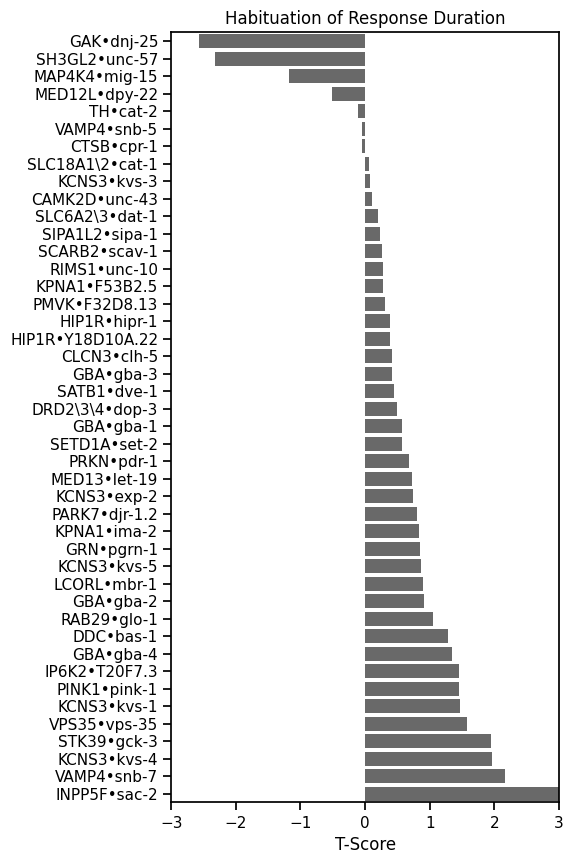

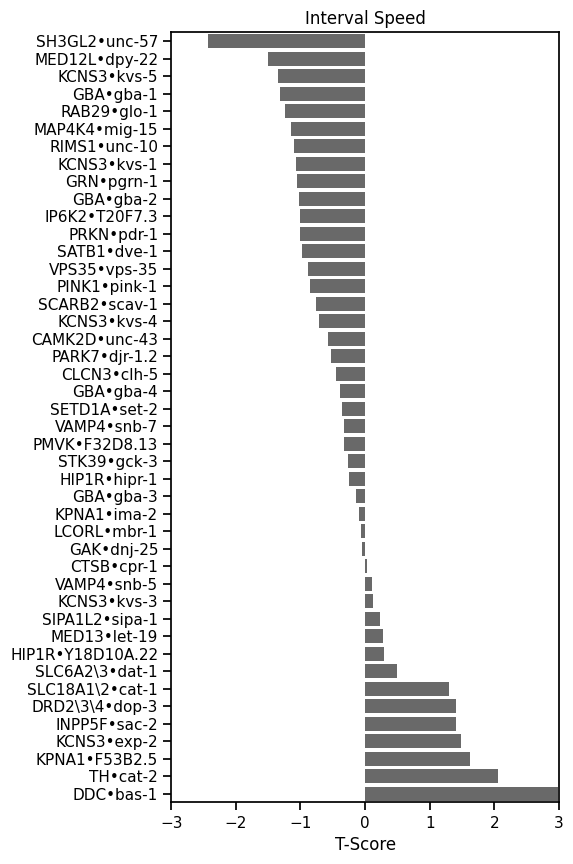

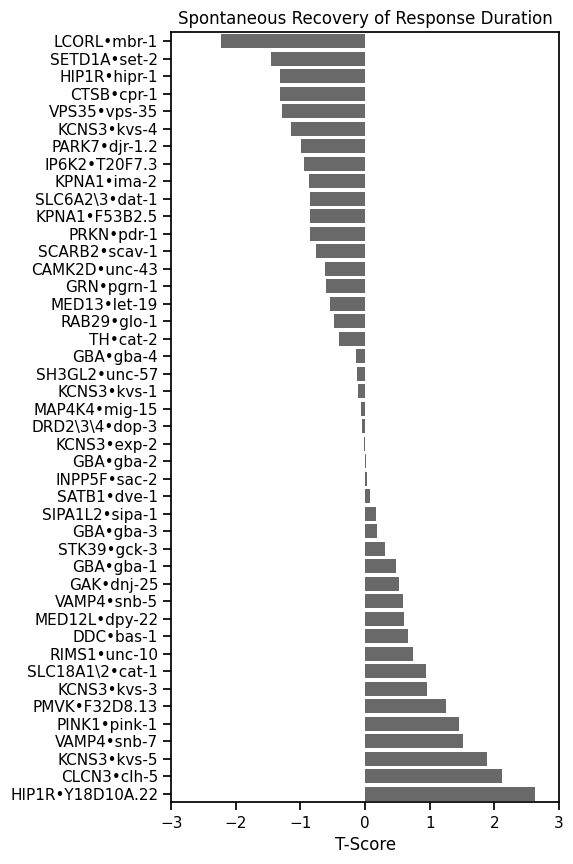

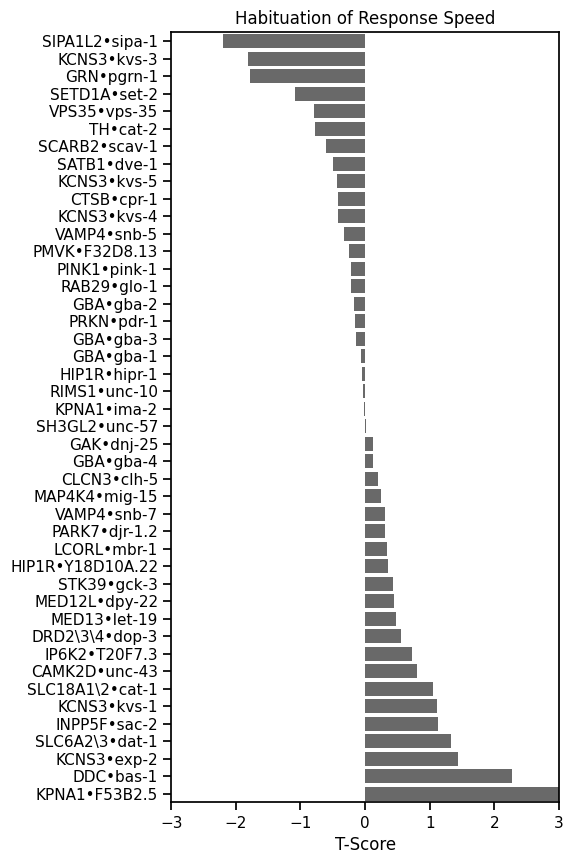

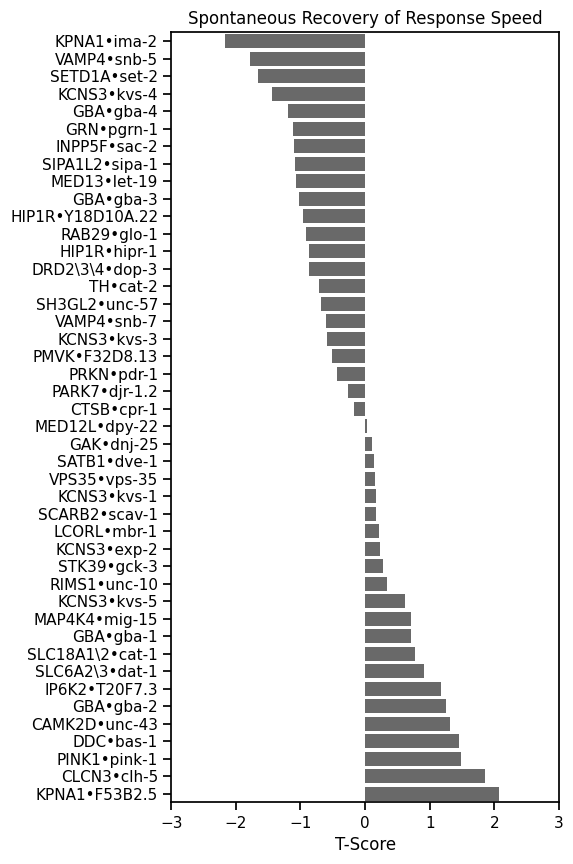

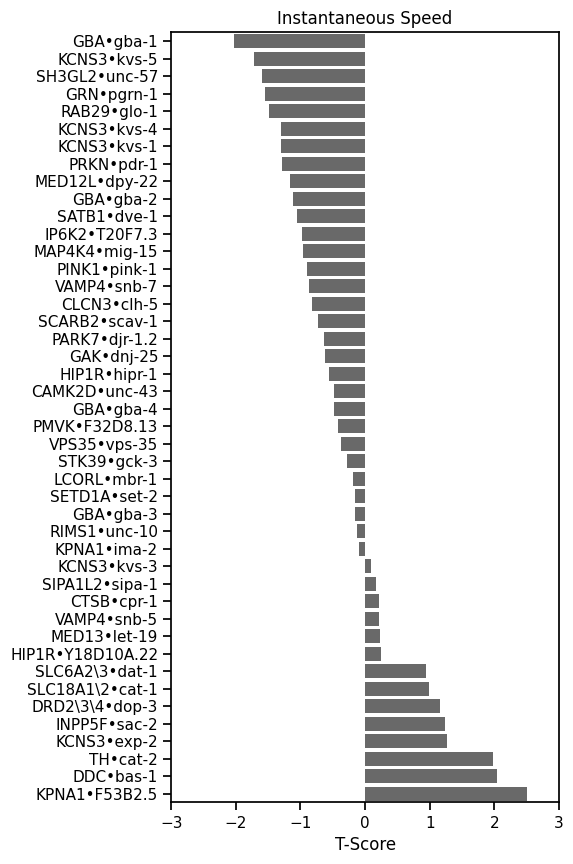

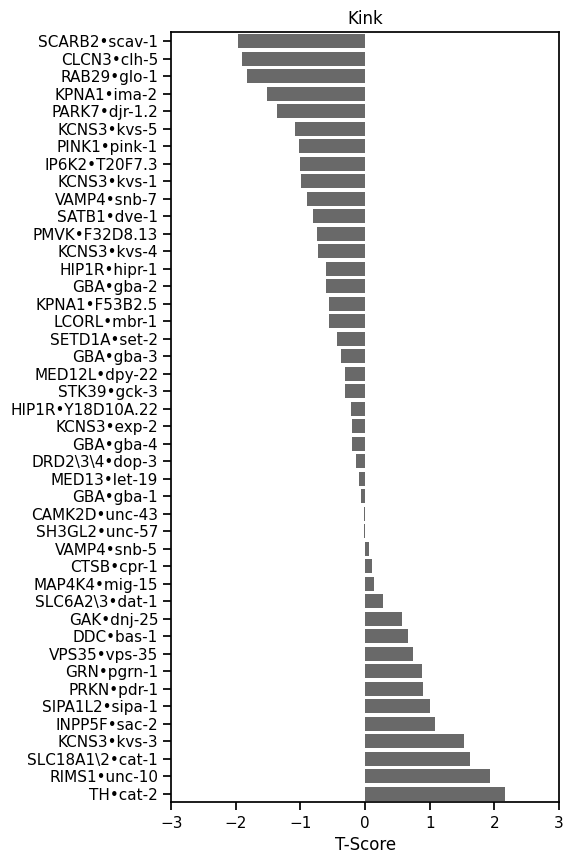

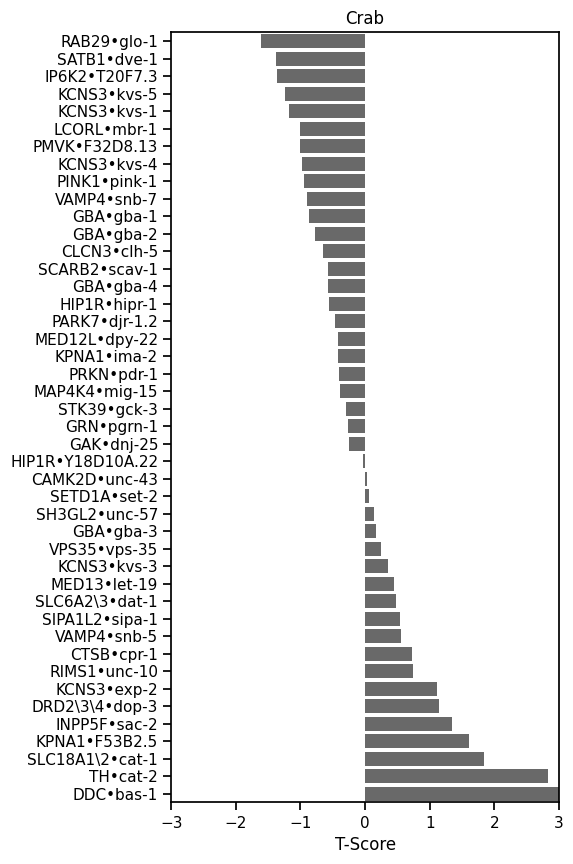

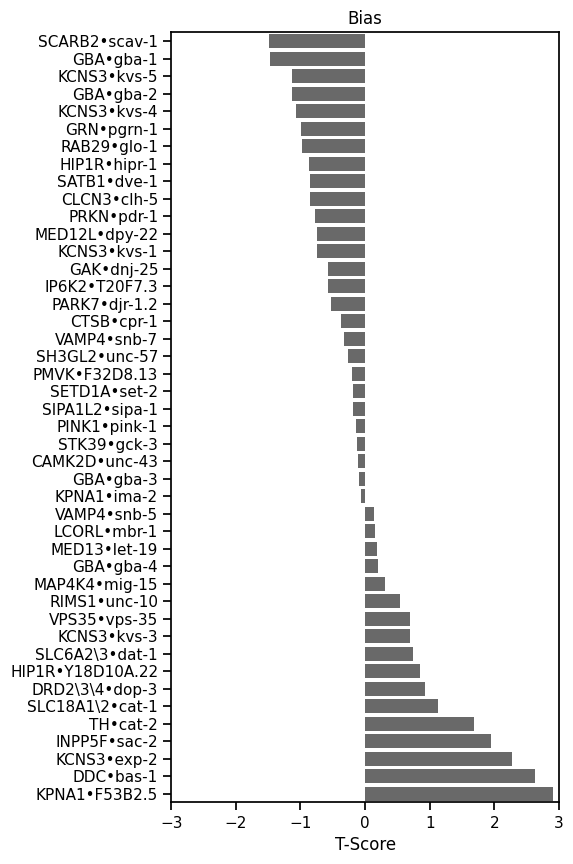

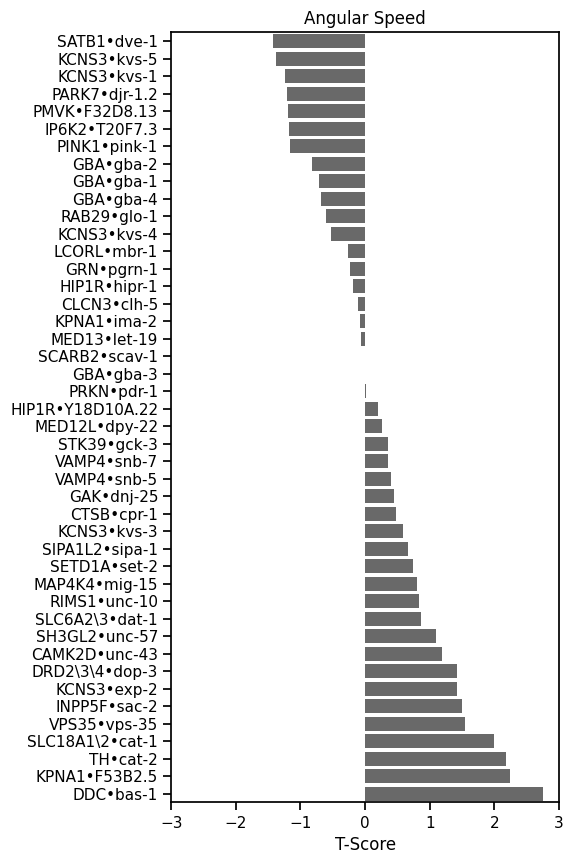

done


In [72]:
# sns.barplot(data=PD_gene_Tstats_melted_gene_sorted[PD_gene_Tstats_melted_gene_sorted.Metric=="Instantaneous Speed"],
#             x="dataset", y="T_score")
# plt.xticks(rotation=90)

for x in PD_gene_Tstats_combined_melted_sorted.Metric.unique():
    plt.figure(figsize=(5,10))
    ax = sns.barplot(data = PD_gene_Tstats_combined_melted_sorted[PD_gene_Tstats_combined_melted_sorted.Metric==f"{x}"], 
                x="T_score",
                y="Gene",orient='h',
                palette=["dimgray"]).set_title(f"{x}")
#     plt.xticks(rotation=90)
    plt.xlabel('T-Score')
    plt.ylabel('')
    plt.xlim(-3,3)
    plt.savefig(f'/Users/Joseph/Desktop/GRC_Data/Gene_byMetric_h/{x}_Metrics.png', format='png', dpi=450, bbox_inches = "tight")
    plt.show()
print("done")

In [ ]:
# print(PD_recov_taps)
# print(PD_habit_levels)
# print(PD_baseline_last100)

# Rest of the analysis starts here

In [ ]:
PD_df=pd.read_csv('/Volumes/JOSEPH/PD_Screen/output.csv')
PD_df = PD_df.iloc[: , 1:]
print(PD_df)

In [ ]:
Neuron_df = pd.read_csv('/Users/Joseph/Desktop/ScreenData/AndrewMasterAdded.csv')
ASD_df = pd.read_csv('/Users/Joseph/Desktop/ScreenData/ASDMaster.csv')

print(Neuron_df)
print(ASD_df)

Neuron_df = Neuron_df.iloc[: , 1:]
print(Neuron_df)

ASD_df = ASD_df.iloc[: , 1:]
print(ASD_df)


# Master_DF = pd.concat([Neuron_df, ASD_df])
Master_DF = pd.read_csv('/Users/Joseph/Desktop/ScreenData/MasterData.csv')
print(Master_DF)

In [ ]:
####### Save Master Data to CSV #######

Master_DF.to_csv('/Users/Joseph/Desktop/ScreenData/MasterData.csv', sep=",")

In [ ]:
Initial_PD = PD_df[PD_df.taps == 1]

print(Initial_PD)

Last3Taps = [28,29,30]
FinalTaps_PD = PD_df[PD_df.taps.isin(Last3Taps)]
print(FinalTaps_PD)




In [ ]:
Initial_Neuron = Neuron_df[Neuron_df.Taps == 1]
Initial_ASD = ASD_df[ASD_df.Taps == 1]

Last3Taps = [28,29,30]
FinalTaps_Neuron = Neuron_df[Neuron_df.Taps.isin(Last3Taps)]
FinalTaps_ASD = ASD_df[ASD_df.Taps.isin(Last3Taps)]

print(Initial_Neuron)
print(Initial_ASD)
print(FinalTaps_Neuron)
print(FinalTaps_ASD)


In [ ]:
PD_strains = dict(zip(Initial_PD.Allele, Initial_PD.Gene))
print(PD_strains)

In [ ]:
Neuron_strains = dict(zip(Initial_Neuron.Allele, Initial_Neuron.Gene))

ASD_strains = dict(zip(Initial_ASD.Allele, Initial_ASD.Gene))

print(Neuron_strains)
print(ASD_strains)

In [ ]:
PD_Alleles = PD_df["Allele"].unique()
PD_Genes = PD_df["Gene"].unique()
print(PD_Alleles)


In [ ]:
Neuron_Alleles = Neuron_df["Allele"].unique()
Neuron_Genes = Neuron_df["Gene"].unique()

ASD_Alleles = ASD_df["Allele"].unique()
ASD_Genes = ASD_df["Gene"].unique()

# print(Neuron_Alleles)
# print(Neuron_Genes)
print(ASD_Alleles)
print(ASD_Genes)

In [ ]:
PD_Init_dura_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"])
PD_Init_dist_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dist_T"])
PD_Init_prob_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","prob_T"])
PD_Init_speed_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","speed_T"])

In [ ]:
Neuron_Init_dura_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"])
Neuron_Init_dist_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dist_T"])
Neuron_Init_prob_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","prob_T"])
Neuron_Init_speed_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","speed_T"])
# Neuron_Init_dura_Tstat_trial = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"]) 

ASD_Init_dura_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"])
ASD_Init_dist_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dist_T"])
ASD_Init_prob_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","prob_T"])
ASD_Init_speed_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","speed_T"])

# print(Initial_Neuron_Dura)

In [ ]:
def TTEST(List, Type, Screen, StrainsDict, DF_ref, DF_out):
    for a in List:
        TSTAT=ttest_ind(DF_ref[DF_ref.Allele == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
        row = [Screen, StrainsDict.get(a), a, TSTAT]
        DF_out.loc[len(DF_out)]=row
    print(DF_out)


In [ ]:
TTEST(PD_Alleles, "dura", "PD", PD_strains, Initial_PD, PD_Init_dura_Tstat)
TTEST(PD_Alleles, "dist", "PD", PD_strains, Initial_PD, PD_Init_dist_Tstat)
TTEST(PD_Alleles, "prob", "PD", PD_strains, Initial_PD, PD_Init_prob_Tstat)
TTEST(PD_Alleles, "speed", "PD", PD_strains, Initial_PD, PD_Init_speed_Tstat)

In [ ]:
# ASD_Init_dura_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"])
# ASD_Init_dist_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dist_T"])
# ASD_Init_prob_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","prob_T"])
# ASD_Init_speed_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","speed_T"])



In [ ]:
TTEST(Neuron_Alleles, "dura", "Neuronal", Neuron_strains, Initial_Neuron, Neuron_Init_dura_Tstat)
TTEST(Neuron_Alleles, "dist", "Neuronal", Neuron_strains, Initial_Neuron, Neuron_Init_dist_Tstat)
TTEST(Neuron_Alleles, "prob", "Neuronal", Neuron_strains, Initial_Neuron, Neuron_Init_prob_Tstat)
TTEST(Neuron_Alleles, "speed", "Neuronal", Neuron_strains, Initial_Neuron, Neuron_Init_speed_Tstat)

In [ ]:
TTEST(ASD_Alleles, "dura", "ASD", ASD_strains, Initial_ASD, ASD_Init_dura_Tstat)
TTEST(ASD_Alleles, "dist", "ASD", ASD_strains, Initial_ASD, ASD_Init_dist_Tstat)
TTEST(ASD_Alleles, "prob", "ASD", ASD_strains, Initial_ASD, ASD_Init_prob_Tstat)
TTEST(ASD_Alleles, "speed", "ASD", ASD_strains, Initial_ASD, ASD_Init_speed_Tstat)

In [ ]:
PD_Init_TSTAT = pd.DataFrame()
PD_Init_TSTAT = PD_Init_dura_Tstat
PD_Init_TSTAT["dist_T"] = PD_Init_dist_Tstat["dist_T"]
PD_Init_TSTAT["prob_T"] = PD_Init_prob_Tstat["prob_T"]
PD_Init_TSTAT["speed_T"] = PD_Init_speed_Tstat["speed_T"]
PD_Init_TSTAT['Genotype']=PD_Init_TSTAT['Gene']+" - "+PD_Init_TSTAT['Allele']
print(PD_Init_TSTAT)

In [ ]:
Pheno = 'Speed'
PD_Init_TSTAT=PD_Init_TSTAT.sort_values(by=["speed_T"])
Title = f"Phenotype Score - {Pheno}" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = 'speed_T', 
             data = PD_Init_TSTAT, #<--------------- Input Here -------------
             color = 'darkorange',
             edgecolor="darkorange",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation=90)
plt.ylabel(f"T Score of {Pheno}")
# plt.ylim(top = 0.1)
# plt.ylim(bottom = -0.1)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
Neuron_Init_TSTAT = pd.DataFrame()
Neuron_Init_TSTAT = Neuron_Init_dura_Tstat
Neuron_Init_TSTAT["dist_T"] = Neuron_Init_dist_Tstat["dist_T"]
Neuron_Init_TSTAT["prob_T"] = Neuron_Init_prob_Tstat["prob_T"]
Neuron_Init_TSTAT["speed_T"] = Neuron_Init_speed_Tstat["speed_T"]

print(Neuron_Init_TSTAT)

In [ ]:
ASD_Init_TSTAT = pd.DataFrame()
ASD_Init_TSTAT = ASD_Init_dura_Tstat
ASD_Init_TSTAT["dist_T"] = ASD_Init_dist_Tstat["dist_T"]
ASD_Init_TSTAT["prob_T"] = ASD_Init_prob_Tstat["prob_T"]
ASD_Init_TSTAT["speed_T"] = ASD_Init_speed_Tstat["speed_T"]
print(ASD_Init_TSTAT)

In [ ]:
#### T-Test ######

Neuron_Init_dura_Tstat = pd.DataFrame(columns = ["Gene","Allele","T", "Screen"])
Neuron_Init_dist_Tstat = pd.DataFrame(columns = ["Gene","Allele","T", "Screen"])
Neuron_Init_prob_Tstat = pd.DataFrame(columns = ["Gene","Allele","T", "Screen"])
Neuron_Init_speed_Tstat = pd.DataFrame(columns = ["Gene","Allele","T", "Screen"])
# print(Neuron_Dura_Tstat)

for a in Neuron_Alleles:
    TSTAT=ttest_ind(Initial_Neuron_Dura[Initial_Neuron_Dura.Allele == a].dura, Initial_Neuron_Dura[Initial_Neuron_Dura.Allele == "N2"].dura,equal_var=False)[0]
    row = [Neuron_strains.get(a),a, TSTAT, "Neuronal"]
#     print(a,TSTAT)
    Neuron_Init_Dura_Tstat.loc[len(Neuron_Dura_Tstat)]=row

print(Neuron_Dura_Tstat)
    
    
    
# ttest(Initial_Neuron_Dura[Initial_Neuron_Dura.Allele == "AH102"].dura, Initial_Neuron_Dura[Initial_Neuron_Dura.Allele == "N2"].dura)["T"]

In [ ]:
Init_Ttest_Master = pd.concat([Neuron_Init_TSTAT, ASD_Init_TSTAT])
print(Init_Ttest_Master)
Init_Ttest_Master.to_csv('/Users/Joseph/Desktop/ScreenData/Init_Ttest_Master.csv', sep=",")

In [ ]:
FinalTaps_ASD.to_csv('/Users/Joseph/Desktop/ScreenData/ASD_FinalTaps.csv', sep=",")

In [ ]:
Initial_DF1 = Master_DF[Master_DF.Taps == 1]

Initial_DF = Initial_DF1.rename({"dura": "init_dura", 
                                 "dist": "init_dist", 
                                 "prob": "init_prob", 
                                 "speed": "init_speed"}, axis=1)
print(Initial_DF)
# Initial_DF.to_csv('/Users/Joseph/Desktop/ScreenData/FirstTaps.csv', sep=",")

In [ ]:
Last3Taps = [28,29,30]

FinalTaps_DF = Master_DF[Master_DF.Taps.isin(Last3Taps)]
print(FinalTaps_DF)

In [ ]:
### Calculate Mean of Final Habituated Level From 3 Taps

FinalLevels1 = FinalTaps_DF.groupby(["Gene", "Allele", "Screen", "plate"]).mean().reset_index()

FinalLevels = FinalLevels1.rename({"dura": "final_dura", 
                                   "dist": "final_dist", 
                                   "prob": "final_prob", 
                                   "speed": "final_speed"}, axis=1)

print(FinalLevels)
# FinalLevels.to_csv('/Users/Joseph/Desktop/ScreenData/FinalLevels.csv', sep=",")

In [ ]:
InitialAndFinal = pd.merge(Initial_DF,
                          FinalLevels,
                          on = ["Gene", "Allele", "plate","Screen"],
                          how = "inner")
print(InitialAndFinal)

In [ ]:
InitialAndFinal["hab_dura"]=InitialAndFinal["init_dura"]-InitialAndFinal["final_dura"]
InitialAndFinal["hab_dist"]=InitialAndFinal["init_dist"]-InitialAndFinal["final_dist"]
InitialAndFinal["hab_prob"]=InitialAndFinal["init_prob"]-InitialAndFinal["final_prob"]
InitialAndFinal["hab_speed"]=InitialAndFinal["init_speed"]-InitialAndFinal["final_speed"]
# InitialAndFinal.drop(['taps_x','taps_y','time_x', 'time_y'], axis=1, inplace=True)
print(InitialAndFinal)
# InitialAndFinal.to_csv('/Users/Joseph/Desktop/ScreenData/HabituatedLevels.csv', sep=",")


InitialAndFinal_ASD=InitialAndFinal[InitialAndFinal.Screen=='ASD']
print(InitialAndFinal_ASD)
InitialAndFinal_Neuron=InitialAndFinal[InitialAndFinal.Screen=='Neuronal']
print(InitialAndFinal_Neuron)

In [ ]:
# Testing Manually Updated Dataframe (removed blank N2 row in speed)

InitialAndFinal = pd.read_csv('/Users/Joseph/Desktop/ScreenData/HabituatedLevels_new.csv')

InitialAndFinal_ASD=InitialAndFinal[InitialAndFinal.Screen=='ASD']
print(InitialAndFinal_ASD)
InitialAndFinal_Neuron=InitialAndFinal[InitialAndFinal.Screen=='Neuronal']
print(InitialAndFinal_Neuron)

In [ ]:
def TTEST_new_equalvar(List, Screen, StrainsDict, DF_ref, DF_out):
    for a in List:
        T_init_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["init_dura"], DF_ref[DF_ref.Allele == "N2"]["init_dura"],equal_var=True)[0]
        T_init_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["init_dist"], DF_ref[DF_ref.Allele == "N2"]["init_dist"],equal_var=True)[0]
        T_init_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["init_prob"], DF_ref[DF_ref.Allele == "N2"]["init_prob"],equal_var=True)[0]
        T_init_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["init_speed"], DF_ref[DF_ref.Allele == "N2"]["init_speed"],equal_var=True)[0]
        
        T_final_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["final_dura"], DF_ref[DF_ref.Allele == "N2"]["final_dura"],equal_var=True)[0]
        T_final_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["final_dist"], DF_ref[DF_ref.Allele == "N2"]["final_dist"],equal_var=True)[0]
        T_final_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["final_prob"], DF_ref[DF_ref.Allele == "N2"]["final_prob"],equal_var=True)[0]
        T_final_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["final_speed"], DF_ref[DF_ref.Allele == "N2"]["final_speed"],equal_var=False)[0]
        
        T_hab_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_dura"], DF_ref[DF_ref.Allele == "N2"]["hab_dura"],equal_var=True)[0]
        T_hab_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_dist"], DF_ref[DF_ref.Allele == "N2"]["hab_dist"],equal_var=True)[0]
        T_hab_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_prob"], DF_ref[DF_ref.Allele == "N2"]["hab_prob"],equal_var=True)[0]
        T_hab_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_speed"], DF_ref[DF_ref.Allele == "N2"]["hab_speed"],equal_var=True)[0]
        row = [Screen,
               StrainsDict.get(a),
               a,
               T_init_dura,
               T_init_dist,
               T_init_prob,
               T_init_speed,
               T_final_dura,
               T_final_dist,
               T_final_prob,
               T_final_speed,
               T_hab_dura,
               T_hab_dist,
               T_hab_prob,
               T_hab_speed]
        DF_out.loc[len(DF_out)]=row
    print(DF_out)
    
def TTEST_new_noequalvar(List, Screen, StrainsDict, DF_ref, DF_out):
    for a in List:
        T_init_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["init_dura"], DF_ref[DF_ref.Allele == "N2"]["init_dura"],equal_var=False)[0]
        T_init_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["init_dist"], DF_ref[DF_ref.Allele == "N2"]["init_dist"],equal_var=False)[0]
        T_init_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["init_prob"], DF_ref[DF_ref.Allele == "N2"]["init_prob"],equal_var=False)[0]
        T_init_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["init_speed"], DF_ref[DF_ref.Allele == "N2"]["init_speed"],equal_var=False)[0]
        
        T_final_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["final_dura"], DF_ref[DF_ref.Allele == "N2"]["final_dura"],equal_var=False)[0]
        T_final_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["final_dist"], DF_ref[DF_ref.Allele == "N2"]["final_dist"],equal_var=False)[0]
        T_final_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["final_prob"], DF_ref[DF_ref.Allele == "N2"]["final_prob"],equal_var=False)[0]
        T_final_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["final_speed"], DF_ref[DF_ref.Allele == "N2"]["final_speed"],equal_var=False)[0]
        
        T_hab_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_dura"], DF_ref[DF_ref.Allele == "N2"]["hab_dura"],equal_var=False)[0]
        T_hab_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_dist"], DF_ref[DF_ref.Allele == "N2"]["hab_dist"],equal_var=False)[0]
        T_hab_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_prob"], DF_ref[DF_ref.Allele == "N2"]["hab_prob"],equal_var=False)[0]
        T_hab_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_speed"], DF_ref[DF_ref.Allele == "N2"]["hab_speed"],equal_var=False)[0]
        row = [Screen,
               StrainsDict.get(a),
               a,
               T_init_dura,
               T_init_dist,
               T_init_prob,
               T_init_speed,
               T_final_dura,
               T_final_dist,
               T_final_prob,
               T_final_speed,
               T_hab_dura,
               T_hab_dist,
               T_hab_prob,
               T_hab_speed]
        DF_out.loc[len(DF_out)]=row
    print(DF_out)

In [ ]:
Tstat_Master_ASD = pd.DataFrame(columns = ["Screen",
                                           "Gene",
                                           "Allele",
                                           "T_init_dura",
                                           "T_init_dist",
                                           "T_init_prob",
                                           "T_init_speed",
                                           "T_final_dura",
                                           "T_final_dist",
                                           "T_final_prob",
                                           "T_final_speed",
                                           "T_hab_dura",
                                           "T_hab_dist",
                                           "T_hab_prob",
                                           "T_hab_speed"])
Tstat_Master_Neuron = pd.DataFrame(columns = ["Screen",
                                           "Gene",
                                           "Allele",
                                           "T_init_dura",
                                           "T_init_dist",
                                           "T_init_prob",
                                           "T_init_speed",
                                           "T_final_dura",
                                           "T_final_dist",
                                           "T_final_prob",
                                           "T_final_speed",
                                           "T_hab_dura",
                                           "T_hab_dist",
                                           "T_hab_prob",
                                           "T_hab_speed"])

In [ ]:
TTEST_new_noequalvar(ASD_Alleles, "ASD", ASD_strains, InitialAndFinal_ASD, Tstat_Master_ASD)
TTEST_new_noequalvar(Neuron_Alleles, "Neuronal", Neuron_strains, InitialAndFinal_Neuron, Tstat_Master_Neuron)

In [ ]:
Tstat_Master = pd.concat([Tstat_Master_ASD,Tstat_Master_Neuron])
print(Tstat_Master)
# Tstat_Master.to_csv('/Users/Joseph/Desktop/ScreenData/Tstat_Master.csv', sep=",")

In [ ]:
Tstat_Master = pd.read_csv('/Users/Joseph/Desktop/ScreenData/Tstat_Master.csv')
Tstat_Master_copy = pd.read_csv('/Users/Joseph/Desktop/ScreenData/Tstat_Master_copy.csv')
Tstat_Master_copy = Tstat_Master_copy.iloc[: , 1:]
print(Tstat_Master_copy)

In [ ]:
import chart_studio.plotly as py
import chart_studio

## Connect with chartstudio
username = 'JosephLiangUBC' # Add your username
api_key = 'ZASGSzLhSTdvXdzCZplK' # Add your api key 

chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

In [ ]:
AxisNames = {
    "T_init_dura": "Initial Response Duration",
    "T_init_dist": "Initial Response Distance",
    "T_init_prob": "Initial Response Probability",
    "T_init_speed": "Initial Response Speed",
    "T_final_dura": "Final Response Duration",
    "T_final_dist": "Final Response Distance",
    "T_final_prob": "Final Response Probability",
    "T_final_speed": "Final Response Speed",
    "T_hab_dura": "Degree of Habituation of Response Duration",
    "T_hab_dist": "Degree of Habituation of Response Distance",
    "T_hab_prob": "Degree of Habituation of Response Probability",
    "T_hab_speed": "Degree of Habituation of Response Speed",
}


In [ ]:
import plotly.express as px
df = Tstat_Master # iris is a pandas DataFrame
fig = px.scatter(df, 
                 x="T_hab_prob", 
                 y="T_init_prob", 
                 color="Screen", 
                 labels=AxisNames,
                 opacity=0.65,
                 color_discrete_sequence=["black", "red"],
                 hover_name="Gene", 
                 trendline = "ols",
                 marginal_x = "histogram",
                 marginal_y = "histogram",
                 hover_data=['Allele'])
fig.show()

In [ ]:
py.plot(fig, filename = 'Initial_vs_Habituated_Probability', auto_open=True)

In [ ]:
Corr_ASD = Tstat_Master_ASD.corr()
Corr_Neuron = Tstat_Master_Neuron.corr()
Corr_Master = Tstat_Master.corr()
print(Corr_ASD)
print(Corr_Neuron)

In [ ]:
import seaborn as sns
sns.set_context("poster")
f,(ax1,ax2,axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]}, figsize = (15,7))
ax1.get_shared_y_axes().join(ax2)
f.suptitle('Correlations between T-scores of Different Response Habituation Components')
g1 = sns.heatmap(Corr_Neuron,cmap="crest",cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel("Andrew's Screen")
g2 = sns.heatmap(Corr_ASD,cmap="crest",cbar_ax=axcb,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('ASD Screen')
g2.set_yticks([])


for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
    
plt.savefig('/Users/Joseph/Desktop/ScreenData/CorrelationPlots_Welch.png', format='png', dpi=450, bbox_inches = 'tight')

In [ ]:
fig = px.imshow(Corr_Master)
fig.show()

In [ ]:
fig = px.imshow(Corr_ASD, labels=AxisNames)
fig.show()

In [ ]:
fig = px.imshow(Corr_Neuron)
fig.show()

In [ ]:
fig = px.imshow(Corr_Master)
fig.show()

In [ ]:
from bokeh.io import show
from bokeh.models import CustomJS, Select


In [ ]:

select = Select(title="Option:", value="foo", options=["foo", "bar", "baz", "quux"])
select.js_on_change("value", CustomJS(code="""
    console.log('select: value=' + this.value, this.toString())
"""))

show(select)